**Materia: Seminario de Proyectos III**

**Alumno: Mauricio Mejía Álvarez**

** 1. Preprocesamiento**

**A continuación se detectará el conjunto de caracteres del archivo fuente de base de datos y se convertirá al conjunto de caracteres UTF-8 default de python, para que no aparezcan caracteres extraños; como se mostrará enseguida, el encoding original encontrado es 'UTF-8-SIG', creado por Windows**

In [ ]:
# modulos usados
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

#se detecta el encodig de caracteres
#with open("D:/Users/MEAM699M/Documents/mcdi_infotec/cursos/4semestre/seminario3/entrega3/conjunto_de_datos_iter_00CSV20 - copia.csv", 'rb') as rawdata:
#with open("D:/maestria/infotec/mcdi/semestre_4/seminario_3/tareas/entrega3/conjunto_de_datos_iter_00CSV20 - copia.csv", 'rb') as rawdata:
with open("conjunto_de_datos_iter_00CSV20.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(100000))

print(result)

{'encoding': 'UTF-8-SIG', 'language': 'Hungarian', 'confidence': 0.903}


**Se lee el archivo original, se imprimen sus dimensiones y los 5 primeros registros**

In [ ]:
iter_00csv20_utf8sig = pd.read_csv("conjunto_de_datos_iter_00CSV20.csv",encoding='UTF-8-SIG')
print(iter_00csv20_utf8sig .shape)
iter_00csv20_utf8sig .head()

<ipython-input-2-3c0397c25bba>:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  iter_00csv20_utf8sig = pd.read_csv("conjunto_de_datos_iter_00CSV20.csv",encoding='UTF-8-SIG')


(195662, 286)


ENTIDAD         NOM_ENT  MUN                             NOM_MUN   LOC  \
0        0  Total nacional    0                      Total nacional     0   
1        0  Total nacional    0                      Total nacional  9998   
2        0  Total nacional    0                      Total nacional  9999   
3        1  Aguascalientes    0  Total de la entidad Aguascalientes     0   
4        1  Aguascalientes    0  Total de la entidad Aguascalientes  9998   

                        NOM_LOC LONGITUD LATITUD ALTITUD     POBTOT  ...  \
0                Total nacional      NaN     NaN     NaN  126014024  ...   
1   Localidades de una vivienda      NaN     NaN     NaN     250354  ...   
2  Localidades de dos viviendas      NaN     NaN     NaN     147125  ...   
3           Total de la Entidad      NaN     NaN     NaN    1425607  ...   
4   Localidades de una vivienda      NaN     NaN     NaN       3697  ...   

    VPH_CEL VPH_INTER  VPH_STVP VPH_SPMVPI  VPH_CVJ VPH_SINRTV VPH_SINLTC  \
0  30775898  18307193  15211306    6616141  4047100    1788552    3170894   
1     47005      8385     18981       1732     1113      12775      14143   
2     25581      5027     11306        971      708       8247      10065   
3    359895    236003    174089      98724    70126       6021      15323   
4       732       205       212         48       41         39         62   

  VPH_SINCINT VPH_SINTIC TAMLOC  
0    15108204     852871      *  
1       51293       7154      *  
2       29741       5283      *  
3      128996       1711      *  
4         530         20      *  

[5 rows x 286 columns]

**Se respalda el archivo fuente en el encoding original (UTF-8-SIG), y se guardará en el formato UTF-8.**

In [ ]:
#respaldar el archivo original
iter_00csv20AntesFormat = iter_00csv20_utf8sig.copy()

iter_00csv20_utf8sig.to_csv('conjunto_de_datos_iter_00CSV20 - copia.csv')

**Se lee el archivo en formato UTF-8 y se muestran los 5 primeros renglones, y sus dimensiones; las dimensiones son iguales a las del archivo original (195662 renglones y 286 columnas)**

In [ ]:
#parametro low_memory servira para leer el archivo aunque tenga errores
# debido a que hay columnas con diferente tipo de datos
#parametro index_col servira para no mostrar el numero de renglon
iter_00csv20 = pd.read_csv("conjunto_de_datos_iter_00CSV20 - copia.csv", low_memory=False, index_col=0)
print(iter_00csv20.shape)
iter_00csv20.head()

(195662, 286)


ENTIDAD         NOM_ENT  MUN                             NOM_MUN   LOC  \
0        0  Total nacional    0                      Total nacional     0   
1        0  Total nacional    0                      Total nacional  9998   
2        0  Total nacional    0                      Total nacional  9999   
3        1  Aguascalientes    0  Total de la entidad Aguascalientes     0   
4        1  Aguascalientes    0  Total de la entidad Aguascalientes  9998   

                        NOM_LOC LONGITUD LATITUD ALTITUD     POBTOT  ...  \
0                Total nacional      NaN     NaN     NaN  126014024  ...   
1   Localidades de una vivienda      NaN     NaN     NaN     250354  ...   
2  Localidades de dos viviendas      NaN     NaN     NaN     147125  ...   
3           Total de la Entidad      NaN     NaN     NaN    1425607  ...   
4   Localidades de una vivienda      NaN     NaN     NaN       3697  ...   

    VPH_CEL VPH_INTER  VPH_STVP VPH_SPMVPI  VPH_CVJ VPH_SINRTV VPH_SINLTC  \
0  30775898  18307193  15211306    6616141  4047100    1788552    3170894   
1     47005      8385     18981       1732     1113      12775      14143   
2     25581      5027     11306        971      708       8247      10065   
3    359895    236003    174089      98724    70126       6021      15323   
4       732       205       212         48       41         39         62   

  VPH_SINCINT VPH_SINTIC TAMLOC  
0    15108204     852871      *  
1       51293       7154      *  
2       29741       5283      *  
3      128996       1711      *  
4         530         20      *  

[5 rows x 286 columns]

**Hay registros en la información cuyas columnas tienen caractéres especiales, o información faltante, o nulos, los cuales habrá que limpiar, por ejemplo:**
* Correspondendientes a registros con totales
* Valores nulos
* Valores *, corresponde a información faltante
* Valores N/D corresponde a informacion faltante
* Datos en formato de coordenadas geográficas
* Celdas con datos nulos

**Se verifican y limpian los registros con totales (LOC es el indice de la localidad)**

In [ ]:
iter_00csv20.LOC.value_counts()

LOC
0       2502
1       2467
9998    1990
9999    1738
2       1631
        ... 
4841       1
4835       1
4834       1
4828       1
4132       1
Name: count, Length: 5201, dtype: int64

**Se limpian los registros con totales los cuales suman 6230 registros, antes de limpiar eran  195662 y despues 189432; lac condiciones de filtrados son: valores LOC (0,9998,9999)**

In [ ]:
condicionesTot = [0,9998,9999]
filtroTot = iter_00csv20[iter_00csv20['LOC'].isin(condicionesTot)]
print(filtroTot)

#respaldar antes de eliminar totales
iter_00csv20_antesTot = iter_00csv20.copy()
print("Dimensiones antes de eliminar totales ", iter_00csv20_antesTot.shape)
#obtener indices de columnas filtradas
indices_filtroTot = filtroTot.index
#eliminar filas de los indices filtrados
iter_00csv20 = iter_00csv20.drop(indices_filtroTot)

#imprime dimensiones
print("Dimensiones despues de eliminar totales ", iter_00csv20.shape)

        ENTIDAD         NOM_ENT  MUN                             NOM_MUN  \
0             0  Total nacional    0                      Total nacional   
1             0  Total nacional    0                      Total nacional   
2             0  Total nacional    0                      Total nacional   
3             1  Aguascalientes    0  Total de la entidad Aguascalientes   
4             1  Aguascalientes    0  Total de la entidad Aguascalientes   
...         ...             ...  ...                                 ...   
195616       32       Zacatecas   57                            Trancoso   
195639       32       Zacatecas   57                            Trancoso   
195640       32       Zacatecas   57                            Trancoso   
195641       32       Zacatecas   58               Santa María de la Paz   
195661       32       Zacatecas   58               Santa María de la Paz   

         LOC                       NOM_LOC LONGITUD LATITUD ALTITUD  \
0          0    

**A continuación se eliminarán los registros con asteriscos (confidenciales), correspondientes a 81105 registros, en alguna de sus columnas (agregando la columna 'asterik' para contar las ocurrencias de dicho caracter por registro y luego eliminando los que tengan algun asterisco)**

In [ ]:
#se crea columna asterisk, se cuentan asteriscos por renglon
iter_00csv20['asterisk'] = iter_00csv20.apply(lambda x: x.tolist().count('*'), axis=1)

print("Dimensiones de registros con asteriscos")
print(iter_00csv20[iter_00csv20.asterisk > 0].shape)
print(iter_00csv20[iter_00csv20.asterisk > 0].head())

Dimensiones de registros con asteriscos
(81105, 287)
    ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC  \
8         1  Aguascalientes    1  Aguascalientes   94   
10        1  Aguascalientes    1  Aguascalientes  102   
11        1  Aguascalientes    1  Aguascalientes  104   
30        1  Aguascalientes    1  Aguascalientes  172   
31        1  Aguascalientes    1  Aguascalientes  176   

                             NOM_LOC          LONGITUD          LATITUD  \
8                     Granja Adelita  102°22'24.710" W  21°52'18.749" N   
10            Los Arbolitos [Rancho]  102°21'26.261" W  21°46'48.650" N   
11  Ardillas de Abajo (Las Ardillas)  102°11'30.914" W  21°56'42.243" N   
30                 San José [Granja]  102°22'57.860" W  21°51'55.072" N   
31                        La Chiripa  102°09'59.710" W  21°45'58.848" N   

   ALTITUD  POBTOT  ... VPH_INTER VPH_STVP VPH_SPMVPI VPH_CVJ VPH_SINRTV  \
8   1902.0       5  ...         *        *          *       *          *   
1

**Se eliminan los registros con asteriscos, quedando 108327 registros, puesto que no traen informacion que pueda procesarse**

In [ ]:
#crea filtro de registros con asteriscos
filtradoAst = iter_00csv20[iter_00csv20.asterisk > 0]
print(filtradoAst.head)
#se crea indice de los registros filtrados que tienen asterisco
index_filtradoAst = filtradoAst.index

#se respaldan los datos
iter_00csv20AntesAsterisk = iter_00csv20.copy()
print("Dimensiones antes de quitar asteriskos ", iter_00csv20AntesAsterisk.shape)

iter_00csv20 = iter_00csv20.drop(index_filtradoAst)
print("Dimensiones despues de quitar asteriskos ", iter_00csv20.shape)

<bound method NDFrame.head of         ENTIDAD         NOM_ENT  MUN                NOM_MUN  LOC  \
8             1  Aguascalientes    1         Aguascalientes   94   
10            1  Aguascalientes    1         Aguascalientes  102   
11            1  Aguascalientes    1         Aguascalientes  104   
30            1  Aguascalientes    1         Aguascalientes  172   
31            1  Aguascalientes    1         Aguascalientes  176   
...         ...             ...  ...                    ...  ...   
195651       32       Zacatecas   58  Santa María de la Paz   28   
195653       32       Zacatecas   58  Santa María de la Paz   31   
195654       32       Zacatecas   58  Santa María de la Paz   32   
195658       32       Zacatecas   58  Santa María de la Paz   39   
195660       32       Zacatecas   58  Santa María de la Paz   42   

                                 NOM_LOC          LONGITUD          LATITUD  \
8                         Granja Adelita  102°22'24.710" W  21°52'18.749" 

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

            LONGITUD          LATITUD ALTITUD  POBTOT  ... VPH_INTER VPH_STVP  \
7   102°17'45.768" W  21°52'47.362" N  1878.0  863893  ...    169675   123670   
9   102°21'25.639" W  21°53'01.522" N  1861.0      41  ...         4        5   
12  102°16'26.238" W  21°48'06.384" N  1892.0    1169  ...       139      114   
13  102°07'29.341" W  21°44'50.978" N  1971.0      41  ...         0        2   
14  102°17'35.503" W  21°43'08.930" N  1871.0    1054  ...        74       69   

   VPH_SPMVPI VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT VPH_SINTIC TAMLOC  \
7       77719   53589       2995       5984       63661        595     13   
9           2       1          0          1           6          0      1   
12         23      17          5         14         136          2      4   
13          0       0          0          1           9          0      1   
14         14      25          5         13         166          2      4   

   asterisk  
7         0  
9         0  
12        0  
13        0  
14        0  

[5 rows x 287 columns]

**A continuación se eliminarán los registros con N/D en alguna de sus columnas, puesto que no hay informacion que pueda procesarse (agregando la columna 'n_d' para contar las ocurrencias de 'N/D')**

In [ ]:
iter_00csv20['n_d'] = iter_00csv20.apply(lambda x: x.tolist().count('N/D'), axis=1)

print("Dimensiones de registros con N/D")
print(iter_00csv20[iter_00csv20.n_d > 0].shape)
print(iter_00csv20[iter_00csv20.n_d > 0].head())

Dimensiones de registros con N/D
(152, 288)
       ENTIDAD              NOM_ENT  MUN      NOM_MUN   LOC  \
4034         2      Baja California    2     Mexicali  1408   
5263         2      Baja California    2     Mexicali  4966   
5838         2      Baja California    3       Tecate   727   
7369         2      Baja California    6  San Quintín   433   
10185        3  Baja California Sur    9       Loreto   389   

                                          NOM_LOC          LONGITUD  \
4034       Santa Clara (Colonia San Pedro Mártir)  115°17'13.863" W   
5263   Los Tres Rhinos (Colonia San Pedro Mártir)  115°16'23.967" W   
5838                               Agua Hechicera  116°14'04.622" W   
7369                              Isla San Martín  116°06'14.278" W   
10185                                   Tecoragui  111°20'26.785" W   

               LATITUD ALTITUD  POBTOT  ... VPH_STVP VPH_SPMVPI VPH_CVJ  \
4034   31°04'45.078" N    0409      10  ...      N/D        N/D     N/D   


**Se eliminarán 152 registros con N/D**

In [ ]:
#crea filtro de registros con N/D
filtradoND = iter_00csv20[iter_00csv20.n_d > 0]
print(filtradoND.head())
#se crea indice de los registros filtrados que tienen N/D
index_filtradoND = filtradoND.index

#se respaldan los datos
iter_00csv20AntesND = iter_00csv20.copy()
print("Dimensiones antes de quitar N/D ", iter_00csv20AntesND.shape)

iter_00csv20 = iter_00csv20.drop(index_filtradoND)
print("Dimensiones despues de quitar asteriskos ", iter_00csv20.shape)

       ENTIDAD              NOM_ENT  MUN      NOM_MUN   LOC  \
4034         2      Baja California    2     Mexicali  1408   
5263         2      Baja California    2     Mexicali  4966   
5838         2      Baja California    3       Tecate   727   
7369         2      Baja California    6  San Quintín   433   
10185        3  Baja California Sur    9       Loreto   389   

                                          NOM_LOC          LONGITUD  \
4034       Santa Clara (Colonia San Pedro Mártir)  115°17'13.863" W   
5263   Los Tres Rhinos (Colonia San Pedro Mártir)  115°16'23.967" W   
5838                               Agua Hechicera  116°14'04.622" W   
7369                              Isla San Martín  116°06'14.278" W   
10185                                   Tecoragui  111°20'26.785" W   

               LATITUD ALTITUD  POBTOT  ... VPH_STVP VPH_SPMVPI VPH_CVJ  \
4034   31°04'45.078" N    0409      10  ...      N/D        N/D     N/D   
5263   31°04'20.516" N    0399      12  ... 

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

            LONGITUD          LATITUD ALTITUD  POBTOT  ... VPH_STVP  \
7   102°17'45.768" W  21°52'47.362" N  1878.0  863893  ...   123670   
9   102°21'25.639" W  21°53'01.522" N  1861.0      41  ...        5   
12  102°16'26.238" W  21°48'06.384" N  1892.0    1169  ...      114   
13  102°07'29.341" W  21°44'50.978" N  1971.0      41  ...        2   
14  102°17'35.503" W  21°43'08.930" N  1871.0    1054  ...       69   

   VPH_SPMVPI VPH_CVJ VPH_SINRTV VPH_SINLTC VPH_SINCINT VPH_SINTIC TAMLOC  \
7       77719   53589       2995       5984       63661        595     13   
9           2       1          0          1           6          0      1   
12         23      17          5         14         136          2      4   
13          0       0          0          1           9          0      1   
14         14      25          5         13         166          2      4   

   asterisk n_d  
7         0   0  
9         0   0  
12        0   0  
13        0   0  
14        0   0  

[5 rows x 288 columns]

**A continuación se convertiran las columnas a numerico, vease el siguiente problema la columna, PCATOLICA es tratada como texto en lugar de numérica**

In [ ]:
iter_00csv20.PCATOLICA.sum()

'752938411069419661724864991133242317109592711453100850287449417113341443725954914272753336516982912427486141533874073251232165028171156121730751572525415162925275011281204184633977982176602305821850512122285715366171812368916358122851052220620272461601802842120388294144011910181223206181969172114291727191633121061020282623321321216202971021615622259516336315777788611291334314511692935124123261011162210215172389153691355422443342718152240131061215221246221457122256310865265391634201811541451810337201561137381311319814712512013250645103077802882152241912183536924219301698935342231820658334334448614212312668273843839133537271731812319314489222915345000386110010527791171347834772993364857020881526210042922373437455442912605114189911174110411416841521417402140658897232121065310279493413841351071106557565258537639611161712186521811646486328296667568163461712393232528191423122564152119680429421092433724902327130588648011311719291571513445681209870932655361291431482317456422249145188066919814

In [ ]:
#funcion para convertir columnas a tipo numerico, si no se puede salta la columna
def convertir_a_numerico(df):
    for columna in df.columns:
        try:
            df[columna] = pd.to_numeric(df[columna])
        except ValueError:
            pass  # Si no se puede convertir, continua

In [ ]:
#respaldar
iter_00csv20_antesNumerico = iter_00csv20.copy()

# Convertir todas las columnas del DataFrame a tipo numérico
convertir_a_numerico(iter_00csv20)

# Verificar que sume los valores de población catolica
iter_00csv20.PCATOLICA.sum()

97564377

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

            LONGITUD          LATITUD ALTITUD  POBTOT  ...  VPH_STVP  \
7   102°17'45.768" W  21°52'47.362" N  1878.0  863893  ...    123670   
9   102°21'25.639" W  21°53'01.522" N  1861.0      41  ...         5   
12  102°16'26.238" W  21°48'06.384" N  1892.0    1169  ...       114   
13  102°07'29.341" W  21°44'50.978" N  1971.0      41  ...         2   
14  102°17'35.503" W  21°43'08.930" N  1871.0    1054  ...        69   

    VPH_SPMVPI  VPH_CVJ  VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  \
7        77719    53589        2995        5984        63661         595   
9            2        1           0           1            6           0   
12          23       17           5          14          136           2   
13           0        0           0           1            9           0   
14          14       25           5          13          166           2   

    TAMLOC  asterisk  n_d  
7       13         0    0  
9        1         0    0  
12       4         0    0  
13       1         0    0  
14       4         0    0  

[5 rows x 288 columns]

**Enseguida se convertiran los datos geográficos (longitud, latitud, altitud), a numerico para que puedan ser procesados**

In [ ]:
iter_00csv20_antesCoor = iter_00csv20.copy()

print(iter_00csv20.LONGITUD.dtype)
print(iter_00csv20.LATITUD.dtype)
print(iter_00csv20.ALTITUD.dtype)

object
object
object


**Convertir a numerico el campo altitud, primero quitar los que tengan el formato "0-**

In [ ]:
#mostrar los datos que empiezan con 0-
filtro = iter_00csv20['ALTITUD'] .str.startswith('0') & iter_00csv20['ALTITUD'] .str.contains('-')
print(iter_00csv20[filtro])

        ENTIDAD                          NOM_ENT  MUN             NOM_MUN  \
5440          2                  Baja California    2            Mexicali   
11838         4                         Campeche    7            Palizada   
68114        12                         Guerrero    1  Acapulco de Juárez   
108290       18                          Nayarit   15  Santiago Ixcuintla   
121343       20                           Oaxaca  334  Villa de Tututepec   
178669       30  Veracruz de Ignacio de la Llave  122             Pajapan   

         LOC                                    NOM_LOC          LONGITUD  \
5440    5209                          Canal Reforma Dos  115°31'39.438" W   
11838    934                                El Cabresto   92°05'01.399" W   
68114    753  Paraíso Lomas de Chapultepec (El Plantón)   99°37'14.949" W   
108290   419                                  El Pasito  105°16'39.634" W   
121343   203                        Playa la Encomienda   97°24'38.618" W  

In [ ]:
#limpia la columna altitud, si empieza con 0
def replace_2ceros(value):
    if pd.isna(value) or value == '':
        return '0'
    else:
        return value.replace("00", "")

In [ ]:
#quitar los ceros antes de guiones
iter_00csv20['ALTITUD'] = iter_00csv20['ALTITUD'].apply(replace_2ceros)

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

            LONGITUD          LATITUD ALTITUD  POBTOT  ...  VPH_STVP  \
7   102°17'45.768" W  21°52'47.362" N  1878.0  863893  ...    123670   
9   102°21'25.639" W  21°53'01.522" N  1861.0      41  ...         5   
12  102°16'26.238" W  21°48'06.384" N  1892.0    1169  ...       114   
13  102°07'29.341" W  21°44'50.978" N  1971.0      41  ...         2   
14  102°17'35.503" W  21°43'08.930" N  1871.0    1054  ...        69   

    VPH_SPMVPI  VPH_CVJ  VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  \
7        77719    53589        2995        5984        63661         595   
9            2        1           0           1            6           0   
12          23       17           5          14          136           2   
13           0        0           0           1            9           0   
14          14       25           5          13          166           2   

    TAMLOC  asterisk  n_d  
7       13         0    0  
9        1         0    0  
12       4         0    0  
13       1         0    0  
14       4         0    0  

[5 rows x 288 columns]

In [ ]:
#convertir la columna altitud a numerica

# Identificar valores no numéricos en la columna 'ALTITUD'
non_numeric_values = iter_00csv20[~iter_00csv20['ALTITUD'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]['ALTITUD'].unique()
print("Valores no numéricos encontrados:", non_numeric_values)

#imprime valores vacios (84 registros)
print(iter_00csv20[iter_00csv20['ALTITUD'] == ''])

Valores no numéricos encontrados: ['' '-6' '-5' '-012' '-7' '-8' '-9' '-3' '-010' '-2' '-1' '-8.0' '-2.0'
 '-5.0' '-4' '-013' '-3.0' '-18.0' '-1.0' '-4.0' '-7.0' '-6.0' '-9.0'
 '-15.0' '-11.0' '-10.0']
        ENTIDAD                          NOM_ENT  MUN   NOM_MUN   LOC  \
2081          2                  Baja California    1  Ensenada   124   
2279          2                  Baja California    1  Ensenada  1115   
2477          2                  Baja California    1  Ensenada  2157   
2786          2                  Baja California    1  Ensenada  3639   
3079          2                  Baja California    1  Ensenada  4444   
...         ...                              ...  ...       ...   ...   
178718       30  Veracruz de Ignacio de la Llave  123    Pánuco    71   
178752       30  Veracruz de Ignacio de la Llave  123    Pánuco   128   
178812       30  Veracruz de Ignacio de la Llave  123    Pánuco   281   
178830       30  Veracruz de Ignacio de la Llave  123    Pánuco   35

**Poner a cero las celdas vacias de la columna Altitud, y convertirla a tipo flotante**

In [ ]:
#los que vengan vacios se pone a cero
filtro = iter_00csv20['ALTITUD'] == ''

iter_00csv20.loc[filtro, 'ALTITUD'] = 0

#convertir a flotante
iter_00csv20['ALTITUD'] =  iter_00csv20['ALTITUD'].astype(float)

print(iter_00csv20.ALTITUD.dtype)

print(iter_00csv20.head)

float64
<bound method NDFrame.head of         ENTIDAD         NOM_ENT  MUN                NOM_MUN  LOC  \
7             1  Aguascalientes    1         Aguascalientes    1   
9             1  Aguascalientes    1         Aguascalientes   96   
12            1  Aguascalientes    1         Aguascalientes  106   
13            1  Aguascalientes    1         Aguascalientes  112   
14            1  Aguascalientes    1         Aguascalientes  120   
...         ...             ...  ...                    ...  ...   
195652       32       Zacatecas   58  Santa María de la Paz   30   
195655       32       Zacatecas   58  Santa María de la Paz   33   
195656       32       Zacatecas   58  Santa María de la Paz   35   
195657       32       Zacatecas   58  Santa María de la Paz   37   
195659       32       Zacatecas   58  Santa María de la Paz   41   

                                NOM_LOC          LONGITUD          LATITUD  \
7                        Aguascalientes  102°17'45.768" W  21°52'47

**Verificar las altitudes negativas (por debajo del nivel del mar)**

In [ ]:
#regresa registros con altitud negativa
iter_00csv20[iter_00csv20['ALTITUD']<0]

ENTIDAD                          NOM_ENT  MUN           NOM_MUN   LOC  \
2195          2                  Baja California    1          Ensenada   678   
2499          2                  Baja California    1          Ensenada  2221   
2677          2                  Baja California    1          Ensenada  3283   
3818          2                  Baja California    2          Mexicali   221   
3891          2                  Baja California    2          Mexicali   411   
...         ...                              ...  ...               ...   ...   
186722       30  Veracruz de Ignacio de la Llave  192  Vega de Alatorre   171   
186764       30  Veracruz de Ignacio de la Llave  192  Vega de Alatorre   247   
188453       31                          Yucatán    9         Cansahcab     4   
189319       31                          Yucatán   52             Motul     2   
189334       31                          Yucatán   52             Motul    23   

                                         NOM_LOC          LONGITUD  \
2195                                   El Aguaje  116°38'13.860" W   
2499                        Playa Dorada [Campo]  116°39'17.252" W   
2677                  Baja Beach and Tennis Club  116°38'12.691" W   
3818              Río el Mayor Solano (La Carpa)  115°16'50.025" W   
3891    Campo Mozqueda (Colonia Terrenos Indios)  115°16'32.219" W   
...                                          ...               ...   
186722                                  La Palma   96°33'16.461" W   
186764                    Los Mangos (El Puente)   96°37'41.030" W   
188453                               Santa María   89°04'18.966" W   
189319                                       Ucí   89°16'12.226" W   
189334                                      Kiní   89°18'57.342" W   

                LATITUD  ALTITUD  POBTOT  ...  VPH_STVP  VPH_SPMVPI  VPH_CVJ  \
2195    31°42'07.426" N     -6.0      15  ...         4           2        2   
2499    31°43'20.259" N     -6.0      74  ...        21          12        0   
2677    31°44'32.190" N     -5.0      17  ...         6           7        1   
3818    32°07'53.453" N    -12.0      58  ...        14           1        1   
3891    32°09'23.951" N     -7.0      19  ...         3           0        0   
...                 ...      ...     ...  ...       ...         ...      ...   
186722  19°57'03.151" N    -10.0      12  ...         3           0        0   
186764  20°02'40.724" N     -4.0      20  ...         1           0        0   
188453  21°09'01.494" N     -1.0     170  ...         8           0        0   
189319  21°07'31.712" N     -4.0    1212  ...        71           2        1   
189334  21°08'07.053" N     -1.0    1737  ...        71          10        8   

        VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  
2195             0           0            1           0       1         0    0  
2499             1           0            6           0       1         0    0  
2677             1           0            1           0       1         0    0  
3818             0           0            6           0       1         0    0  
3891             0           2            5           0       1         0    0  
...            ...         ...          ...         ...     ...       ...  ...  
186722           0           0            4           0       1         0    0  
186764           0           0            4           0       1         0    0  
188453           1          14           47           0       1         0    0  
189319          20          74          293          15       4         0    0  
189334          30         105          364          23       4         0    0  

[350 rows x 288 columns]

**Verificar las altitudes en cero**

In [ ]:
#regresa registros sin altitud
iter_00csv20[iter_00csv20['ALTITUD']==0]

ENTIDAD                          NOM_ENT  MUN           NOM_MUN   LOC  \
2081          2                  Baja California    1          Ensenada   124   
2279          2                  Baja California    1          Ensenada  1115   
2477          2                  Baja California    1          Ensenada  2157   
2786          2                  Baja California    1          Ensenada  3639   
3079          2                  Baja California    1          Ensenada  4444   
...         ...                              ...  ...               ...   ...   
186715       30  Veracruz de Ignacio de la Llave  192  Vega de Alatorre   149   
188143       30  Veracruz de Ignacio de la Llave  211        San Rafael    23   
188152       30  Veracruz de Ignacio de la Llave  211        San Rafael    39   
188771       31                          Yucatán   27        Dzidzantún     4   
188797       31                          Yucatán   28   Dzilam de Bravo   139   

                                           NOM_LOC          LONGITUD  \
2081                                Isla de Cedros  115°11'34.000" W   
2279                                  Aguacaliente  116°39'38.502" W   
2477                                 Puerto Salina  116°52'42.193" W   
2786                     Malibú Beach (Parcela 31)  116°21'27.045" W   
3079                                      El Morro  115°11'13.000" W   
...                                            ...               ...   
186715  Playa Lechuguillas (Barra Boca de Chancla)   96°34'45.385" W   
188143                                    El Cocal   96°48'28.649" W   
188152                                  El Tablazo   96°50'59.894" W   
188771                                 Santa Clara   89°00'49.515" W   
188797       Dzilam de Bravo [Unidad Habitacional]   88°53'45.487" W   

                LATITUD  ALTITUD  POBTOT  ...  VPH_STVP  VPH_SPMVPI  VPH_CVJ  \
2081    28°05'44.000" N      0.0    1233  ...       338          29       94   
2279    31°43'04.610" N      0.0      24  ...        11           8        1   
2477    32°03'36.327" N      0.0      47  ...        12          10        1   
2786    31°14'18.030" N      0.0      19  ...         8           3        1   
3079    28°02'33.000" N      0.0     605  ...       172          30       49   
...                 ...      ...     ...  ...       ...         ...      ...   
186715  20°00'29.178" N      0.0       5  ...         1           0        0   
188143  20°14'38.881" N      0.0       6  ...         2           0        0   
188152  20°16'01.432" N      0.0      30  ...         0           0        0   
188771  21°22'25.753" N      0.0      38  ...        11           2        1   
188797  21°22'31.487" N      0.0     200  ...        44           7        0   

        VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  
2081             8           5          146           2       4         0    0  
2279             0           0            1           0       1         0    0  
2477             0           0            3           0       1         0    0  
2786             1           0            1           0       1         0    0  
3079             0           0           23           0       3         0    0  
...            ...         ...          ...         ...     ...       ...  ...  
186715           0           0            2           0       1         0    0  
188143           0           0            1           0       1         0    0  
188152           0           1            9           0       1         0    0  
188771           0           2            7           0       1         0    0  
188797           4           1           16           0       1         0    0  

[386 rows x 288 columns]

**Verificar altitudes nulas**

In [ ]:
#verifica altitudes con valor vacio o nulo
iter_00csv20[iter_00csv20['ALTITUD'].isnull()]

Empty DataFrame
Columns: [ENTIDAD, NOM_ENT, MUN, NOM_MUN, LOC, NOM_LOC, LONGITUD, LATITUD, ALTITUD, POBTOT, POBFEM, POBMAS, P_0A2, P_0A2_F, P_0A2_M, P_3YMAS, P_3YMAS_F, P_3YMAS_M, P_5YMAS, P_5YMAS_F, P_5YMAS_M, P_12YMAS, P_12YMAS_F, P_12YMAS_M, P_15YMAS, P_15YMAS_F, P_15YMAS_M, P_18YMAS, P_18YMAS_F, P_18YMAS_M, P_3A5, P_3A5_F, P_3A5_M, P_6A11, P_6A11_F, P_6A11_M, P_8A14, P_8A14_F, P_8A14_M, P_12A14, P_12A14_F, P_12A14_M, P_15A17, P_15A17_F, P_15A17_M, P_18A24, P_18A24_F, P_18A24_M, P_15A49_F, P_60YMAS, P_60YMAS_F, P_60YMAS_M, REL_H_M, POB0_14, POB15_64, POB65_MAS, P_0A4, P_0A4_F, P_0A4_M, P_5A9, P_5A9_F, P_5A9_M, P_10A14, P_10A14_F, P_10A14_M, P_15A19, P_15A19_F, P_15A19_M, P_20A24, P_20A24_F, P_20A24_M, P_25A29, P_25A29_F, P_25A29_M, P_30A34, P_30A34_F, P_30A34_M, P_35A39, P_35A39_F, P_35A39_M, P_40A44, P_40A44_F, P_40A44_M, P_45A49, P_45A49_F, P_45A49_M, P_50A54, P_50A54_F, P_50A54_M, P_55A59, P_55A59_F, P_55A59_M, P_60A64, P_60A64_F, P_60A64_M, P_65A69, P_65A69_F, P_65A69_M, P_70A74, P_70A74_F, ...]
Index: []

[0 rows x 288 columns]

**Convertir a numerico los campos longitud y latitud, se convierten los grados, minutos y segundos a numerico y se suman, tomando en cuenta la orientacion (todo se convierte a grados antes de sumarse)**

In [ ]:
#funcion para convertir una coordenada a numerica, tomando sus grados, minutos y segundos
import re

def convertir_coordenada(texto_coordenada):
    if pd.isna(texto_coordenada) or texto_coordenada == '':
        return 0

    texto_coordenada = texto_coordenada.strip()

    # Utilizamos una expresión regular para extraer grados, minutos, segundos y dirección
    #texto_coordenada = texto_coordenada.replace('"', '\\"')
    match = re.match(r"(\s*)(\d+)°(\d+)'([\d\.]+)\" ([NSWE])(\s*)", texto_coordenada)
    if match:
        espacioIni, grados, minutos, segundos, direccion, espacioFin = match.groups()

        # Convertir grados, minutos y segundos a números decimales
        grados_decimal = float(grados)  # Conversión a float de grados
        minutos_decimal = float(minutos)  # Conversión a float de minutos
        segundos_decimal = float(segundos)  # Conversión a float de segundos

        # Calcular valor decimal de la coordenada correctamente
        valor_decimal = grados_decimal + float(minutos_decimal / 60) + float(segundos_decimal / 3600)

        # Aplicar signo positivo o negativo según la dirección
        if direccion in 'SW':
            valor_decimal = -valor_decimal

        return valor_decimal

    return texto_coordenada

In [ ]:
#prueba de conversion de coordenadas
v = convertir_coordenada(" 102°21'25.639\" W")
print(v)

-102.35712194444444


**Se modificará longitud y latitud a numerico**

In [ ]:
#respaldar antes de modificar latitud y longitud
iter_00csv20AntesLL = iter_00csv20.copy()

In [ ]:
#convertir a numerico la longitud
iter_00csv20['LONGITUD'] = iter_00csv20['LONGITUD'].apply(convertir_coordenada)

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

      LONGITUD          LATITUD  ALTITUD  POBTOT  ...  VPH_STVP  VPH_SPMVPI  \
7  -102.296047  21°52'47.362" N   1878.0  863893  ...    123670       77719   
9  -102.357122  21°53'01.522" N   1861.0      41  ...         5           2   
12 -102.273955  21°48'06.384" N   1892.0    1169  ...       114          23   
13 -102.124817  21°44'50.978" N   1971.0      41  ...         2           0   
14 -102.293195  21°43'08.930" N   1871.0    1054  ...        69          14   

    VPH_CVJ  VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  \
7     53589        2995        5984        63661         595      13   
9         1           0           1            6           0       1   
12       17           5          14          136           2       4   
13        0           0           1            9           0       1   
14       25           5          13          166           2       4   

    asterisk  n_d  
7          0    0  
9          0    0  
12         0    0  
13         0    0  
14         0    0  

[5 rows x 288 columns]

**Verificar que se puedan convertir todas las longitudes a campos numericos**

In [ ]:
iter_00csv20['LONGITUD_numeric'] = pd.to_numeric(iter_00csv20['LONGITUD'], errors='coerce')

# Filtrar registros donde 'LONGITUD_numeric' es NaN
registros_no_numericos = iter_00csv20[pd.isna(iter_00csv20['LONGITUD_numeric'])]

# Mostrar los registros no numéricos
print(registros_no_numericos)

Empty DataFrame
Columns: [ENTIDAD, NOM_ENT, MUN, NOM_MUN, LOC, NOM_LOC, LONGITUD, LATITUD, ALTITUD, POBTOT, POBFEM, POBMAS, P_0A2, P_0A2_F, P_0A2_M, P_3YMAS, P_3YMAS_F, P_3YMAS_M, P_5YMAS, P_5YMAS_F, P_5YMAS_M, P_12YMAS, P_12YMAS_F, P_12YMAS_M, P_15YMAS, P_15YMAS_F, P_15YMAS_M, P_18YMAS, P_18YMAS_F, P_18YMAS_M, P_3A5, P_3A5_F, P_3A5_M, P_6A11, P_6A11_F, P_6A11_M, P_8A14, P_8A14_F, P_8A14_M, P_12A14, P_12A14_F, P_12A14_M, P_15A17, P_15A17_F, P_15A17_M, P_18A24, P_18A24_F, P_18A24_M, P_15A49_F, P_60YMAS, P_60YMAS_F, P_60YMAS_M, REL_H_M, POB0_14, POB15_64, POB65_MAS, P_0A4, P_0A4_F, P_0A4_M, P_5A9, P_5A9_F, P_5A9_M, P_10A14, P_10A14_F, P_10A14_M, P_15A19, P_15A19_F, P_15A19_M, P_20A24, P_20A24_F, P_20A24_M, P_25A29, P_25A29_F, P_25A29_M, P_30A34, P_30A34_F, P_30A34_M, P_35A39, P_35A39_F, P_35A39_M, P_40A44, P_40A44_F, P_40A44_M, P_45A49, P_45A49_F, P_45A49_M, P_50A54, P_50A54_F, P_50A54_M, P_55A59, P_55A59_F, P_55A59_M, P_60A64, P_60A64_F, P_60A64_M, P_65A69, P_65A69_F, P_65A69_M, P_70A74

<ipython-input-32-89ce87a449d1>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  iter_00csv20['LONGITUD_numeric'] = pd.to_numeric(iter_00csv20['LONGITUD'], errors='coerce')


**Convertir a flotante la columna Longitud**

In [ ]:
#convertir a flotante la longitud
iter_00csv20['LONGITUD'] == iter_00csv20['LONGITUD'].astype(float)

print(iter_00csv20['LONGITUD'].dtype)

float64


In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

      LONGITUD          LATITUD  ALTITUD  POBTOT  ...  VPH_SPMVPI  VPH_CVJ  \
7  -102.296047  21°52'47.362" N   1878.0  863893  ...       77719    53589   
9  -102.357122  21°53'01.522" N   1861.0      41  ...           2        1   
12 -102.273955  21°48'06.384" N   1892.0    1169  ...          23       17   
13 -102.124817  21°44'50.978" N   1971.0      41  ...           0        0   
14 -102.293195  21°43'08.930" N   1871.0    1054  ...          14       25   

    VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  \
7         2995        5984        63661         595      13         0    0   
9            0           1            6           0       1         0    0   
12           5          14          136           2       4         0    0   
13           0           1            9           0       1         0    0   
14           5          13          166           2       4         0    0   

    LONGITUD_numeric  
7        -102.296047  
9        -102.357122  
12       -102.273955  
13       -102.124817  
14       -102.293195  

[5 rows x 289 columns]

**Convertir a numerico la columna Latitud**

In [ ]:
#convertir a numerico la latitud
iter_00csv20['LATITUD'] = iter_00csv20['LATITUD'].apply(convertir_coordenada)

**Verificar que se puedan convertir a numerico todas las latitudes**

In [ ]:
iter_00csv20['LATITUD_numeric'] = pd.to_numeric(iter_00csv20['LATITUD'], errors='coerce')

# Filtrar registros donde 'LATITUD_numeric' es NaN
registros_no_numericos = iter_00csv20[pd.isna(iter_00csv20['LATITUD_numeric'])]

# Mostrar los registros no numéricos
print(registros_no_numericos)

Empty DataFrame
Columns: [ENTIDAD, NOM_ENT, MUN, NOM_MUN, LOC, NOM_LOC, LONGITUD, LATITUD, ALTITUD, POBTOT, POBFEM, POBMAS, P_0A2, P_0A2_F, P_0A2_M, P_3YMAS, P_3YMAS_F, P_3YMAS_M, P_5YMAS, P_5YMAS_F, P_5YMAS_M, P_12YMAS, P_12YMAS_F, P_12YMAS_M, P_15YMAS, P_15YMAS_F, P_15YMAS_M, P_18YMAS, P_18YMAS_F, P_18YMAS_M, P_3A5, P_3A5_F, P_3A5_M, P_6A11, P_6A11_F, P_6A11_M, P_8A14, P_8A14_F, P_8A14_M, P_12A14, P_12A14_F, P_12A14_M, P_15A17, P_15A17_F, P_15A17_M, P_18A24, P_18A24_F, P_18A24_M, P_15A49_F, P_60YMAS, P_60YMAS_F, P_60YMAS_M, REL_H_M, POB0_14, POB15_64, POB65_MAS, P_0A4, P_0A4_F, P_0A4_M, P_5A9, P_5A9_F, P_5A9_M, P_10A14, P_10A14_F, P_10A14_M, P_15A19, P_15A19_F, P_15A19_M, P_20A24, P_20A24_F, P_20A24_M, P_25A29, P_25A29_F, P_25A29_M, P_30A34, P_30A34_F, P_30A34_M, P_35A39, P_35A39_F, P_35A39_M, P_40A44, P_40A44_F, P_40A44_M, P_45A49, P_45A49_F, P_45A49_M, P_50A54, P_50A54_F, P_50A54_M, P_55A59, P_55A59_F, P_55A59_M, P_60A64, P_60A64_F, P_60A64_M, P_65A69, P_65A69_F, P_65A69_M, P_70A74

<ipython-input-36-17d89311758c>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  iter_00csv20['LATITUD_numeric'] = pd.to_numeric(iter_00csv20['LATITUD'], errors='coerce')


**Convertir a flotante la columna Latitud**

In [ ]:
#convertir a flotante la longitud
iter_00csv20['LATITUD'] == iter_00csv20['LATITUD'].astype(float)

print(iter_00csv20['LATITUD'].dtype)

float64


In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

      LONGITUD    LATITUD  ALTITUD  POBTOT  ...  VPH_CVJ  VPH_SINRTV  \
7  -102.296047  21.879823   1878.0  863893  ...    53589        2995   
9  -102.357122  21.883756   1861.0      41  ...        1           0   
12 -102.273955  21.801773   1892.0    1169  ...       17           5   
13 -102.124817  21.747494   1971.0      41  ...        0           0   
14 -102.293195  21.719147   1871.0    1054  ...       25           5   

    VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  \
7         5984        63661         595      13         0    0   
9            1            6           0       1         0    0   
12          14          136           2       4         0    0   
13           1            9           0       1         0    0   
14          13          166           2       4         0    0   

    LONGITUD_numeric  LATITUD_numeric  
7        -102.296047        21.879823  
9        -102.357122        21.883756  
12       -102.273955        21.801773  
13       -102.124817        21.747494  
14       -102.293195        21.719147  

[5 rows x 290 columns]

**Verificar si hay columnas con celdas en nulo**

In [ ]:
iter_00csv20_antesDropNul = iter_00csv20.copy()

columnas_con_nulos = iter_00csv20.columns[iter_00csv20.isnull().any()].tolist()

if len(columnas_con_nulos) > 0:
    print("Las siguientes columnas contienen valores nulos:")
    for columna in columnas_con_nulos:
        print(columna)
else:
    print("No hay columnas con valores nulos.")

Las siguientes columnas contienen valores nulos:
REL_H_M
PROM_HNV


**Se eliminan las columnas con valores nulos (REL_H_M, PROM_HNV)**

In [ ]:
iter_00csv20 = iter_00csv20.drop(['REL_H_M','PROM_HNV'], axis=1)

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

      LONGITUD    LATITUD  ALTITUD  POBTOT  ...  VPH_CVJ  VPH_SINRTV  \
7  -102.296047  21.879823   1878.0  863893  ...    53589        2995   
9  -102.357122  21.883756   1861.0      41  ...        1           0   
12 -102.273955  21.801773   1892.0    1169  ...       17           5   
13 -102.124817  21.747494   1971.0      41  ...        0           0   
14 -102.293195  21.719147   1871.0    1054  ...       25           5   

    VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  \
7         5984        63661         595      13         0    0   
9            1            6           0       1         0    0   
12          14          136           2       4         0    0   
13           1            9           0       1         0    0   
14          13          166           2       4         0    0   

    LONGITUD_numeric  LATITUD_numeric  
7        -102.296047        21.879823  
9        -102.357122        21.883756  
12       -102.273955        21.801773  
13       -102.124817        21.747494  
14       -102.293195        21.719147  

[5 rows x 288 columns]

**Se crea campo de indice de analfabetismo (variable target) a partir del campo poblacion mayor de 15 años analfabeta, y el campo poblacion mayor de 15 años**

In [ ]:
# Calcula la nueva columna 'ind_analfabeta' con reemplazo de NaN por cero
iter_00csv20['ind_analfabeta'] = (iter_00csv20['P15YM_AN'] / iter_00csv20['P_15YMAS'])*100
iter_00csv20['ind_analfabeta'].fillna(0, inplace=True)

<ipython-input-42-826867660ca3>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  iter_00csv20['ind_analfabeta'] = (iter_00csv20['P15YM_AN'] / iter_00csv20['P_15YMAS'])*100
<ipython-input-42-826867660ca3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iter_00csv20['ind_analfabeta'].fillna(0, inpla

In [ ]:
iter_00csv20.head()

ENTIDAD         NOM_ENT  MUN         NOM_MUN  LOC                 NOM_LOC  \
7         1  Aguascalientes    1  Aguascalientes    1          Aguascalientes   
9         1  Aguascalientes    1  Aguascalientes   96               Agua Azul   
12        1  Aguascalientes    1  Aguascalientes  106                Arellano   
13        1  Aguascalientes    1  Aguascalientes  112       Bajío los Vázquez   
14        1  Aguascalientes    1  Aguascalientes  120  Buenavista de Peñuelas   

      LONGITUD    LATITUD  ALTITUD  POBTOT  ...  VPH_SINRTV  VPH_SINLTC  \
7  -102.296047  21.879823   1878.0  863893  ...        2995        5984   
9  -102.357122  21.883756   1861.0      41  ...           0           1   
12 -102.273955  21.801773   1892.0    1169  ...           5          14   
13 -102.124817  21.747494   1971.0      41  ...           0           1   
14 -102.293195  21.719147   1871.0    1054  ...           5          13   

    VPH_SINCINT  VPH_SINTIC  TAMLOC  asterisk  n_d  LONGITUD_numeric  \
7         63661         595      13         0    0       -102.296047   
9             6           0       1         0    0       -102.357122   
12          136           2       4         0    0       -102.273955   
13            9           0       1         0    0       -102.124817   
14          166           2       4         0    0       -102.293195   

    LATITUD_numeric  ind_analfabeta  
7         21.879823        1.427718  
9         21.883756        6.451613  
12        21.801773        7.076566  
13        21.747494       10.344828  
14        21.719147        6.420765  

[5 rows x 289 columns]

**Se eliminan columnas creadas de forma temporal para procesar otras columnas; las columnas empleadas para calcular el indice de analfabetismo no se eliminan, por que se espera que tengan un alto peso en las predicciones**

In [ ]:
iter_00csv20 = iter_00csv20.drop(['asterisk',  'n_d', 'LONGITUD_numeric', 'LATITUD_numeric'], axis=1)

In [ ]:
#guardar los datos finales que se procesaran
#respaldar el archivo original
iter_00csv20AntesProc = iter_00csv20.copy()

iter_00csv20.to_csv('conjunto_de_datos_iter_00CSV20 - proc.csv')

**Se imprimen datos estadisticos de los datos**

In [ ]:
#datos estadisticos
iter_00csv20.describe()

ENTIDAD        NOM_ENT            MUN        NOM_MUN  \
count  108175.000000  108175.000000  108175.000000  108175.000000   
mean       16.156977      15.894005      66.338812    1070.249115   
std         8.330283       8.686278      88.737650     689.047260   
min         0.000000       0.000000       0.000000       0.000000   
25%        10.000000      10.000000      14.000000     499.000000   
50%        15.000000      15.000000      37.000000     948.000000   
75%        23.000000      23.000000      82.000000    1744.000000   
max        31.000000      31.000000     569.000000    2325.000000   

                 LOC        NOM_LOC      LONGITUD       LATITUD       ALTITUD  \
count  108175.000000  108175.000000  1.081750e+05  1.081750e+05  1.081750e+05   
mean      248.285094   32046.437125  2.417192e-16  2.753497e-16 -7.987243e-17   
std       459.640537   17781.856793  1.000005e+00  1.000005e+00  1.000005e+00   
min         0.000000       0.000000 -3.718309e+00 -1.711337e+00 -1.312354e+00   
25%        24.000000   17856.500000 -5.034483e-01 -7.032707e-01 -1.086326e+00   
50%        80.000000   31305.000000  8.318467e-02 -1.856472e-01  3.018830e-02   
75%       242.000000   47252.500000  5.485442e-01  3.632161e-01  8.831912e-01   
max      3447.000000   64950.000000  2.565687e+00  3.442566e+00  2.681199e+00   

             POBTOT  ...     VPH_INTER      VPH_STVP    VPH_SPMVPI  \
count  1.081750e+05  ...  1.081750e+05  1.081750e+05  1.081750e+05   
mean   4.098717e-17  ...  5.110259e-17  4.440276e-17  5.839357e-17   
std    1.000005e+00  ...  1.000005e+00  1.000005e+00  1.000005e+00   
min   -5.578486e-02  ... -4.018396e-02 -5.001751e-02 -3.331486e-02   
25%   -5.453459e-02  ... -4.018396e-02 -4.966110e-02 -3.331486e-02   
50%   -5.097613e-02  ... -3.970873e-02 -4.823547e-02 -3.331486e-02   
75%   -3.938709e-02  ... -3.780780e-02 -4.146370e-02 -3.276994e-02   
max    8.820771e+01  ...  9.640660e+01  1.059765e+02  1.081449e+02   

            VPH_CVJ    VPH_SINRTV    VPH_SINLTC   VPH_SINCINT    VPH_SINTIC  \
count  1.081750e+05  1.081750e+05  1.081750e+05  1.081750e+05  1.081750e+05   
mean   5.228491e-17  4.019895e-17  3.849115e-17  3.573240e-17  2.101906e-18   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -3.400642e-02 -1.155576e-01 -1.356092e-01 -8.628445e-02 -2.108615e-01   
25%   -3.400642e-02 -1.084854e-01 -1.262854e-01 -8.255767e-02 -2.108615e-01   
50%   -3.400642e-02 -9.434083e-02 -1.076378e-01 -7.261960e-02 -1.565801e-01   
75%   -3.309706e-02 -4.483495e-02 -3.304747e-02 -4.156312e-02 -4.801747e-02   
max    1.005702e+02  1.097097e+02  9.166645e+01  8.638614e+01  9.540572e+01   

             TAMLOC  ind_analfabeta  
count  1.081750e+05    1.081750e+05  
mean   4.203812e-18   -1.050953e-17  
std    1.000005e+00    1.000005e+00  
min   -5.234269e-01   -1.032051e+00  
25%   -5.234269e-01   -6.714641e-01  
50%   -5.234269e-01   -2.511356e-01  
75%    2.450336e-01    3.799084e-01  
max    9.466559e+00    6.299872e+00  

[8 rows x 285 columns]

**Se imprime un grafico con la poblacion total, poblacion mayor de 15 años, y poblacion mayor de 15 años analfabeta**

In [ ]:
pobtot = iter_00csv20.groupby(['NOM_ENT']).POBTOT.sum()
pob15mas = iter_00csv20.groupby(['NOM_ENT']).P_15YMAS.sum()
pob15masan = iter_00csv20.groupby(['NOM_ENT']).P15YM_AN.sum()

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**El siguiente grafico muestra por entidad, a la poblacion total, la poblacion mayor de 15 años, y la poblacion mayor de 15 años analfabeta**

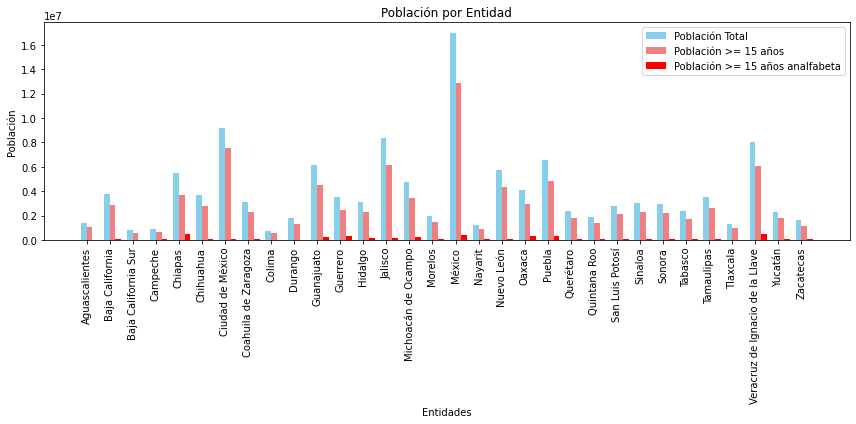

In [ ]:
# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))  # Tamaño del gráfico
bar_width = 0.25

# Obtener los nombres de las entidades
nombres_entidades = pobtot.index

# Obtener las sumas de población de ambas series
sumas_poblacion1 = pobtot.values
sumas_poblacion2 = pob15mas.values
sumas_poblacion3 = pob15masan.values

# Calcular la posición de las barras para la primera serie
x_positions1 = range(len(nombres_entidades))

# Calcular la posición de las barras para la segunda serie
x_positions2 = [x + bar_width for x in x_positions1]

# Calcular la posición de las barras para la tercera serie
x_positions3 = [x + 2*bar_width  for x in x_positions1]

# Crear barras para ambas series
bar1 = ax.bar(x_positions1, sumas_poblacion1, width=bar_width, label='Población Total', color='skyblue')
bar2 = ax.bar(x_positions2, sumas_poblacion2, width=bar_width, label='Población >= 15 años', color='lightcoral')
bar3 = ax.bar(x_positions3, sumas_poblacion3, width=bar_width, label='Población >= 15 años analfabeta', color='red')

plt.xlabel('Entidades')
plt.ylabel('Población')
plt.title('Población por Entidad')
plt.xticks([x + bar_width / 2 for x in x_positions1], nombres_entidades, rotation=90)
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Codificar las variables. Convertir variables (caracteres, y id) a categoricas. Codificar significa convertir variables de tipo caracter a numerico que no participan mayormente en las predicciones pero se necesita este paso por que los modelos esperan valores numericos; se utilizara el metodo LabelEncoder, ya que importa el orden de los valores de dichas variables.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Lista de nombres de columnas a convertir en categóricas usando Label Encoding
columns_to_encode = ['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC']

# Iterar sobre cada columna y aplicar Label Encoding si la columna está en la lista 'columns_to_encode'
label_encoders = {}  # Diccionario para almacenar los objetos LabelEncoder por columna

for col in columns_to_encode:
    if col in iter_00csv20.columns:
        label_encoder = LabelEncoder()
        iter_00csv20[col] = label_encoder.fit_transform(iter_00csv20[col])
        label_encoders[col] = label_encoder  # Guardar el encoder utilizado

# df_encoded ahora contiene las columnas especificadas convertidas usando Label Encoding
# label_encoders contiene los objetos LabelEncoder utilizados para cada columna

In [ ]:
label_encoders

{'ENTIDAD': LabelEncoder(),
 'NOM_ENT': LabelEncoder(),
 'MUN': LabelEncoder(),
 'NOM_MUN': LabelEncoder(),
 'LOC': LabelEncoder(),
 'NOM_LOC': LabelEncoder()}

In [ ]:
iter_00csv20.head()

ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC    LONGITUD    LATITUD  \
7         0        0    0       35    0     1010 -102.296047  21.879823   
9         0        0    0       35   95      596 -102.357122  21.883756   
12        0        0    0       35  105     2441 -102.273955  21.801773   
13        0        0    0       35  111     3689 -102.124817  21.747494   
14        0        0    0       35  119     5554 -102.293195  21.719147   

    ALTITUD  POBTOT  ...  VPH_INTER  VPH_STVP  VPH_SPMVPI  VPH_CVJ  \
7    1878.0  863893  ...     169675    123670       77719    53589   
9    1861.0      41  ...          4         5           2        1   
12   1892.0    1169  ...        139       114          23       17   
13   1971.0      41  ...          0         2           0        0   
14   1871.0    1054  ...         74        69          14       25   

    VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC  TAMLOC  ind_analfabeta  
7         2995        5984        63661         595      13        1.427718  
9            0           1            6           0       1        6.451613  
12           5          14          136           2       4        7.076566  
13           0           1            9           0       1       10.344828  
14           5          13          166           2       4        6.420765  

[5 rows x 285 columns]

**Se hace una normalizacion de datos usando Z-score (solo de las variables numericas), donde la media es cero, y la desviacion estandard es 1**

In [ ]:
#respaldar primero
iter_00csv20_antesNorm = iter_00csv20.copy()

**Se normalizan las variables que participan en las predicciones, para que tengan una misma escala de rango de valores; las variables categóricas ya no se normalizan**

In [ ]:
col_normalizadas = iter_00csv20.columns

In [ ]:
col_normalizadas

Index(['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'LONGITUD',
       'LATITUD', 'ALTITUD', 'POBTOT',
       ...
       'VPH_INTER', 'VPH_STVP', 'VPH_SPMVPI', 'VPH_CVJ', 'VPH_SINRTV',
       'VPH_SINLTC', 'VPH_SINCINT', 'VPH_SINTIC', 'TAMLOC', 'ind_analfabeta'],
      dtype='object', length=285)

**Se normalizara a partir del campo Longitud, las anteriores se consideran variables categoricas, las cuales no se normalizan, solo se codificaron**

In [ ]:
col_normalizadas = col_normalizadas[6:]

In [ ]:
col_normalizadas = col_normalizadas.tolist()

In [ ]:
col_normalizadas

['LONGITUD',
 'LATITUD',
 'ALTITUD',
 'POBTOT',
 'POBFEM',
 'POBMAS',
 'P_0A2',
 'P_0A2_F',
 'P_0A2_M',
 'P_3YMAS',
 'P_3YMAS_F',
 'P_3YMAS_M',
 'P_5YMAS',
 'P_5YMAS_F',
 'P_5YMAS_M',
 'P_12YMAS',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'P_15YMAS',
 'P_15YMAS_F',
 'P_15YMAS_M',
 'P_18YMAS',
 'P_18YMAS_F',
 'P_18YMAS_M',
 'P_3A5',
 'P_3A5_F',
 'P_3A5_M',
 'P_6A11',
 'P_6A11_F',
 'P_6A11_M',
 'P_8A14',
 'P_8A14_F',
 'P_8A14_M',
 'P_12A14',
 'P_12A14_F',
 'P_12A14_M',
 'P_15A17',
 'P_15A17_F',
 'P_15A17_M',
 'P_18A24',
 'P_18A24_F',
 'P_18A24_M',
 'P_15A49_F',
 'P_60YMAS',
 'P_60YMAS_F',
 'P_60YMAS_M',
 'POB0_14',
 'POB15_64',
 'POB65_MAS',
 'P_0A4',
 'P_0A4_F',
 'P_0A4_M',
 'P_5A9',
 'P_5A9_F',
 'P_5A9_M',
 'P_10A14',
 'P_10A14_F',
 'P_10A14_M',
 'P_15A19',
 'P_15A19_F',
 'P_15A19_M',
 'P_20A24',
 'P_20A24_F',
 'P_20A24_M',
 'P_25A29',
 'P_25A29_F',
 'P_25A29_M',
 'P_30A34',
 'P_30A34_F',
 'P_30A34_M',
 'P_35A39',
 'P_35A39_F',
 'P_35A39_M',
 'P_40A44',
 'P_40A44_F',
 'P_40A44_M',
 'P_45A49',
 'P

**Se normalizan los valores (los datos tienen una media de cero y una desviacion estandard de 1)**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Estandarizamos algunas columnas del DataFrame
iter_00csv20[col_normalizadas]= scaler.fit_transform(iter_00csv20[col_normalizadas])

In [ ]:
iter_00csv20.head()

ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC  LONGITUD   LATITUD  \
7         0        0    0       35    0     1010 -0.530884  0.370654   
9         0        0    0       35   95      596 -0.543046  0.371769   
12        0        0    0       35  105     2441 -0.526484  0.348529   
13        0        0    0       35  111     3689 -0.496786  0.333141   
14        0        0    0       35  119     5554 -0.530316  0.325106   

     ALTITUD     POBTOT  ...  VPH_INTER   VPH_STVP  VPH_SPMVPI    VPH_CVJ  \
7   0.841166  41.486438  ...  40.277358  44.027019   42.317799  48.698083   
9   0.821857  -0.053861  ...  -0.039233  -0.048235   -0.032225  -0.033097   
12  0.857067   0.000381  ...  -0.007155  -0.009387   -0.020782  -0.018547   
13  0.946797  -0.053861  ...  -0.040184  -0.049305   -0.033315  -0.034006   
14  0.833215  -0.005149  ...  -0.022600  -0.025425   -0.025686  -0.011272   

    VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  ind_analfabeta  
7    21.065888   27.761179    39.455449   15.937837  8.698098       -0.927371  
9    -0.115558   -0.130947    -0.082558   -0.210861 -0.523427       -0.559023  
12   -0.080196   -0.070343    -0.001811   -0.156580  1.781954       -0.513202  
13   -0.115558   -0.130947    -0.080694   -0.210861 -0.523427       -0.273576  
14   -0.080196   -0.075005     0.016823   -0.156580  1.781954       -0.561285  

[5 rows x 285 columns]

*2. Análisis de datos*

**Realizar analisis mutual information**

In [ ]:
#mutual information
#los datos ya estan normalizados y codificados

iter_00csv20NyC = iter_00csv20.copy()
iter_00csv20.to_csv('conjunto_de_datos_iter_00CSV20 - nyc.csv')

In [ ]:
#se recuperan los datos codificados y normalizados para continuar las pruebas
#ejecutar una sola vez estas lineas
import pandas as pd
import numpy as np

iter_00csv20 = pd.read_csv("conjunto_de_datos_iter_00CSV20 - nyc.csv", low_memory=False, index_col=0)
print(iter_00csv20.shape)
iter_00csv20.head()

(108175, 285)


ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC  LONGITUD   LATITUD  \
7         0        0    0       35    0     1010 -0.530884  0.370654   
9         0        0    0       35   95      596 -0.543046  0.371769   
12        0        0    0       35  105     2441 -0.526484  0.348529   
13        0        0    0       35  111     3689 -0.496786  0.333141   
14        0        0    0       35  119     5554 -0.530316  0.325106   

     ALTITUD     POBTOT  ...  VPH_INTER   VPH_STVP  VPH_SPMVPI    VPH_CVJ  \
7   0.841166  41.486438  ...  40.277358  44.027019   42.317799  48.698083   
9   0.821857  -0.053861  ...  -0.039233  -0.048235   -0.032225  -0.033097   
12  0.857067   0.000381  ...  -0.007155  -0.009387   -0.020782  -0.018547   
13  0.946797  -0.053861  ...  -0.040184  -0.049305   -0.033315  -0.034006   
14  0.833215  -0.005149  ...  -0.022600  -0.025425   -0.025686  -0.011272   

    VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  ind_analfabeta  
7    21.065888   27.761179    39.455449   15.937837  8.698098       -0.927371  
9    -0.115558   -0.130947    -0.082558   -0.210861 -0.523427       -0.559023  
12   -0.080196   -0.070343    -0.001811   -0.156580  1.781954       -0.513202  
13   -0.115558   -0.130947    -0.080694   -0.210861 -0.523427       -0.273576  
14   -0.080196   -0.075005     0.016823   -0.156580  1.781954       -0.561285  

[5 rows x 285 columns]

In [ ]:
X = iter_00csv20.copy()
y = X.pop("ind_analfabeta")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    print(f"columna {colname}")
    X[colname], _ = X[colname].factorize()

In [ ]:
#el dataframe tiene la variable target
iter_00csv20.head()

ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC  LONGITUD   LATITUD  \
7         0        0    0       35    0     1010 -0.530884  0.370654   
9         0        0    0       35   95      596 -0.543046  0.371769   
12        0        0    0       35  105     2441 -0.526484  0.348529   
13        0        0    0       35  111     3689 -0.496786  0.333141   
14        0        0    0       35  119     5554 -0.530316  0.325106   

     ALTITUD     POBTOT  ...  VPH_INTER   VPH_STVP  VPH_SPMVPI    VPH_CVJ  \
7   0.841166  41.486438  ...  40.277358  44.027019   42.317799  48.698083   
9   0.821857  -0.053861  ...  -0.039233  -0.048235   -0.032225  -0.033097   
12  0.857067   0.000381  ...  -0.007155  -0.009387   -0.020782  -0.018547   
13  0.946797  -0.053861  ...  -0.040184  -0.049305   -0.033315  -0.034006   
14  0.833215  -0.005149  ...  -0.022600  -0.025425   -0.025686  -0.011272   

    VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  ind_analfabeta  
7    21.065888   27.761179    39.455449   15.937837  8.698098       -0.927371  
9    -0.115558   -0.130947    -0.082558   -0.210861 -0.523427       -0.559023  
12   -0.080196   -0.070343    -0.001811   -0.156580  1.781954       -0.513202  
13   -0.115558   -0.130947    -0.080694   -0.210861 -0.523427       -0.273576  
14   -0.080196   -0.075005     0.016823   -0.156580  1.781954       -0.561285  

[5 rows x 285 columns]

In [ ]:
#la variable target, es decir, el indice de analfabetismo
y.head()

7    -0.927371
9    -0.559023
12   -0.513202
13   -0.273576
14   -0.561285
Name: ind_analfabeta, dtype: float64

In [ ]:
#rutina para calcular la informacion mutua, a partir del target y las variables predictoras
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    #discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
mi_scores = make_mi_scores(X, y)

In [ ]:
#guardar mi_scores
import pickle

# Guardar en un archivo pickle
with open("mi_scores.pkl", "wb") as file:
    pickle.dump(mi_scores, file)

In [ ]:
#recuperar mi_scores
# Recuperar desde el archivo pickle
with open("mi_scores.pkl", "rb") as file:
    mi_scores_loaded = pickle.load(file)

In [ ]:
mi_scores

P_15YMAS      2.496007
P15YM_AN      1.505161
P_12YMAS      1.367909
P_18YMAS      1.332774
POB15_64      0.982195
                ...   
LOC           0.070254
NOM_LOC       0.066985
ALTITUD       0.045560
VPH_NDEAED    0.041675
POTRAS_REL    0.038651
Name: MI Scores, Length: 284, dtype: float64

In [ ]:
mi_scores_loaded

P_15YMAS      2.496007
P15YM_AN      1.505161
P_12YMAS      1.367909
P_18YMAS      1.332774
POB15_64      0.982195
                ...   
LOC           0.070254
NOM_LOC       0.066985
ALTITUD       0.045560
VPH_NDEAED    0.041675
POTRAS_REL    0.038651
Name: MI Scores, Length: 284, dtype: float64

In [ ]:
list(mi_scores.index)

['P_15YMAS',
 'P15YM_AN',
 'P_12YMAS',
 'P_18YMAS',
 'POB15_64',
 'P_5YMAS',
 'P_3YMAS',
 'P_15YMAS_F',
 'PRES2015',
 'P_15YMAS_M',
 'P_18YMAS_F',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'POBTOT',
 'POBHOG',
 'OCUPVIVPAR',
 'P_18YMAS_M',
 'P_5YMAS_M',
 'P_3YMAS_M',
 'P_5YMAS_F',
 'GRAPROES',
 'PRES2015_M',
 'P12YM_CASA',
 'P_3YMAS_F',
 'POBMAS',
 'PRES2015_F',
 'TVIVPARHAB',
 'TOTHOG',
 'TVIVHAB',
 'VIVPARH_CV',
 'POBFEM',
 'VIVPAR_HAB',
 'VPH_C_ELEC',
 'PNACENT',
 'PEA_M',
 'GRAPROES_F',
 'PNACENT_M',
 'PSIND_LIM',
 'P_15A49_F',
 'POCUPADA_M',
 'PNACENT_F',
 'VPH_PISODT',
 'HOGJEF_M',
 'PHOGJEF_M',
 'VPH_TV',
 'P15YM_AN_F',
 'P12YM_SOLT',
 'PEA',
 'VPH_2YMASD',
 'POCUPADA',
 'VPH_3YMASC',
 'VPH_SINCINT',
 'VIVTOT',
 'VPH_CEL',
 'P15YM_SE',
 'PDER_SS',
 'TVIVPAR',
 'P15SEC_CO',
 'PCATOLICA',
 'P15YM_AN_M',
 'VPH_AGUADV',
 'VPH_REFRI',
 'VPH_DRENAJ',
 'GRAPROES_M',
 'P15SEC_COF',
 'VPH_EXCSA',
 'P15SEC_COM',
 'POB0_14',
 'P15YM_SE_F',
 'VPH_RADIO',
 'P_18A24',
 'VPH_NDACMM',
 'VPH_DSADMA',
 'P_1

In [ ]:
len(list(mi_scores.index))

284

In [ ]:
mi_scores.values

array([2.49600706, 1.50516059, 1.367909  , 1.33277359, 0.9821952 ,
       0.96820994, 0.92008472, 0.91945697, 0.91065218, 0.90592128,
       0.88468124, 0.8807142 , 0.88032217, 0.87025859, 0.86754542,
       0.86495153, 0.85533995, 0.80728264, 0.79140243, 0.78828133,
       0.78332706, 0.77710954, 0.77330704, 0.76974549, 0.76955638,
       0.7647667 , 0.7571597 , 0.75667901, 0.75632396, 0.7549115 ,
       0.74816204, 0.73465431, 0.71291728, 0.71095686, 0.67583522,
       0.67241528, 0.66592218, 0.66005656, 0.65734936, 0.65371993,
       0.64594188, 0.6429507 , 0.62728237, 0.62232786, 0.61983853,
       0.61515671, 0.61085245, 0.60058471, 0.58759644, 0.58699269,
       0.57841405, 0.57799671, 0.57756207, 0.57402986, 0.57012248,
       0.56460132, 0.5624257 , 0.5587589 , 0.55859439, 0.55530063,
       0.55004498, 0.54682983, 0.53817765, 0.52698568, 0.51666251,
       0.50650397, 0.50035817, 0.49933918, 0.49474603, 0.49402878,
       0.49309085, 0.48832381, 0.48451126, 0.47906436, 0.47866

**Se obtendrán los nombres de las variables de mi score, utilizando el diccionario de datos del censo 2020**

In [ ]:
# modulos usados
import pandas as pd
import numpy as np

# helpful character encoding module
import charset_normalizer

# set seed for reproducibility
np.random.seed(0)

#se detecta el encodig de caracteres
#with open("D:/Users/MEAM699M/Documents/mcdi_infotec/cursos/4semestre/seminario3/entrega3/conjunto_de_datos_iter_00CSV20 - copia.csv", 'rb') as rawdata:
#with open("D:/maestria/infotec/mcdi/semestre_4/seminario_3/tareas/entrega3/diccionario_datos_iter_00CSV20 - copia.csv", 'rb') as rawdata:
with open("diccionario_datos_iter_00CSV20 - copia.csv", 'rb') as rawdata:
    result = charset_normalizer.detect(rawdata.read(100000))

print(result)

{'encoding': 'UTF-8-SIG', 'language': 'Portuguese', 'confidence': 1.0}


In [ ]:
dd_00csv20_utf8sig = pd.read_csv("diccionario_datos_iter_00CSV20 - copia.csv",encoding='UTF-8-SIG')
print(dd_00csv20_utf8sig .shape)
dd_00csv20_utf8sig .head()

(286, 6)


Núm.                                     Indicador  \
0     1                   Clave de entidad federativa   
1     2                            Entidad federativa   
2     3  Clave de municipio o demarcación territorial   
3     4           Municipio o demarcación territorial   
4     5                            Clave de localidad   

                                         Descripción   Mnemónico  \
0  Código que identifica a la entidad federativa....     ENTIDAD   
1           Nombre oficial de la entidad federativa.    NOM_ENT    
2  Código que identifica al municipio o demarcaci...         MUN   
3  Nombre oficial del municipio o demarcación ter...  NOM_MUN      
4  Código que identifica a la localidad al interi...         LOC   

         Rangos  Longitud  
0         00…32         2  
1  Alfanumérico        50  
2       000…570         3  
3  Alfanumérico        50  
4     0000…9999         4

In [ ]:
#respaldar el archivo original
dd_00csv20AntesFormat = dd_00csv20_utf8sig.copy()

#cambiar el format a utf8
dd_00csv20_utf8sig.to_csv('diccionario_datos_iter_00CSV20 - copia (2).csv')

**Se lee el diccionario de datos con las descripciones de todas las variables**

In [ ]:
#parametro low_memory servira para leer el archivo aunque tenga errores
# debido a que hay columnas con diferente tipo de datos
#parametro index_col servira para no mostrar el numero de renglon
dd_00csv20_utf8sig = pd.read_csv("diccionario_datos_iter_00CSV20 - copia (2).csv", low_memory=False, index_col=0)
print(dd_00csv20_utf8sig.shape)
dd_00csv20_utf8sig.head()

(286, 6)


Núm.                                     Indicador  \
0     1                   Clave de entidad federativa   
1     2                            Entidad federativa   
2     3  Clave de municipio o demarcación territorial   
3     4           Municipio o demarcación territorial   
4     5                            Clave de localidad   

                                         Descripción   Mnemónico  \
0  Código que identifica a la entidad federativa....     ENTIDAD   
1           Nombre oficial de la entidad federativa.    NOM_ENT    
2  Código que identifica al municipio o demarcaci...         MUN   
3  Nombre oficial del municipio o demarcación ter...  NOM_MUN      
4  Código que identifica a la localidad al interi...         LOC   

         Rangos  Longitud  
0         00…32         2  
1  Alfanumérico        50  
2       000…570         3  
3  Alfanumérico        50  
4     0000…9999         4

**Se hace un join con los datos de mi_score y el diccionario de datos para obtener las descripciones**

In [ ]:
#respaldar
my_scores_copy = mi_scores.copy()

#convertir a dataframe, la secuencia tiene una columna, se partira en dos
my_scores_df = pd.DataFrame(my_scores_copy)

In [ ]:
mi_scores

P_15YMAS      2.496007
P15YM_AN      1.505161
P_12YMAS      1.367909
P_18YMAS      1.332774
POB15_64      0.982195
                ...   
LOC           0.070254
NOM_LOC       0.066985
ALTITUD       0.045560
VPH_NDEAED    0.041675
POTRAS_REL    0.038651
Name: MI Scores, Length: 284, dtype: float64

In [ ]:
#obtener numero de columnas
my_scores_df.shape[1]

1

In [ ]:
#convierte el indice en columna
my_scores_df.reset_index(inplace=True)

#renombra columna del indice
my_scores_df.rename(columns={'index': 'variable'}, inplace=True)

In [ ]:
my_scores_df.head()

variable  MI Scores
0  P_15YMAS   2.496007
1  P15YM_AN   1.505161
2  P_12YMAS   1.367909
3  P_18YMAS   1.332774
4  POB15_64   0.982195

In [ ]:
#renombra la columna llamada mnemonico a variable
dd_00csv20_utf8sig.rename(columns={'Mnemónico': 'variable'}, inplace=True)

In [ ]:
dd_00csv20_utf8sig.head()

Núm.                                     Indicador  \
0     1                   Clave de entidad federativa   
1     2                            Entidad federativa   
2     3  Clave de municipio o demarcación territorial   
3     4           Municipio o demarcación territorial   
4     5                            Clave de localidad   

                                         Descripción    variable  \
0  Código que identifica a la entidad federativa....     ENTIDAD   
1           Nombre oficial de la entidad federativa.    NOM_ENT    
2  Código que identifica al municipio o demarcaci...         MUN   
3  Nombre oficial del municipio o demarcación ter...  NOM_MUN      
4  Código que identifica a la localidad al interi...         LOC   

         Rangos  Longitud  
0         00…32         2  
1  Alfanumérico        50  
2       000…570         3  
3  Alfanumérico        50  
4     0000…9999         4

In [ ]:
# se hace un left join para traer las descripciones de los scores
left = my_scores_df.set_index(['variable'])

right = dd_00csv20_utf8sig.set_index(['variable'])

my_scores_desc = left.join(right)

In [ ]:
my_scores_desc.head()

MI Scores   Núm.                              Indicador  \
variable                                                            
P_15YMAS   2.496007   16.0             Población de 15 años y más   
P15YM_AN   1.505161  165.0  Población de 15 años y más analfabeta   
P_12YMAS   1.367909   13.0             Población de 12 años y más   
P_18YMAS   1.332774   19.0             Población de 18 años y más   
POB15_64   0.982195   46.0              Población de 15 a 64 años   

                                                Descripción         Rangos  \
variable                                                                     
P_15YMAS                 Personas de 15 a 130 años de edad.  0...999999999   
P15YM_AN  Personas de 15 a 130 años de edad que no saben...  0...999999999   
P_12YMAS                 Personas de 12 a 130 años de edad.  0...999999999   
P_18YMAS                 Personas de 18 a 130 años de edad.  0...999999999   
POB15_64                  Personas de 15 a 64 años de edad.  0...999999999   

          Longitud  
variable            
P_15YMAS       9.0  
P15YM_AN       9.0  
P_12YMAS       9.0  
P_18YMAS       9.0  
POB15_64       9.0

In [ ]:
#se guardan los scores con las descripciones
my_scores_desc.to_csv('my_scores_desc.csv')

**Se grafican los scores de informacion mutua**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_mi_scores(scores, filename):
    # Ordenar los scores de menor a mayor
    scores = scores.sort_values(ascending=True)

    # Preparar datos para el gráfico
    width = np.arange(len(scores))
    ticks = list(scores.index)

    # Crear figura con tamaño ajustable
    plt.figure(dpi=100, figsize=(12, len(scores) * 0.3))  # Ajusta el tamaño de la figura según el número de columnas

    # Graficar barras horizontales
    plt.barh(width, scores, height=0.5)  # Ajusta el espacio entre las barras (altura)

    # Añadir etiquetas y título
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

    # Guardar la gráfica como una imagen
    plt.savefig(filename, bbox_inches="tight")  # bbox_inches="tight" ajusta el tamaño de la imagen para que no se corte nada

    # Mostrar el gráfico
    plt.show()

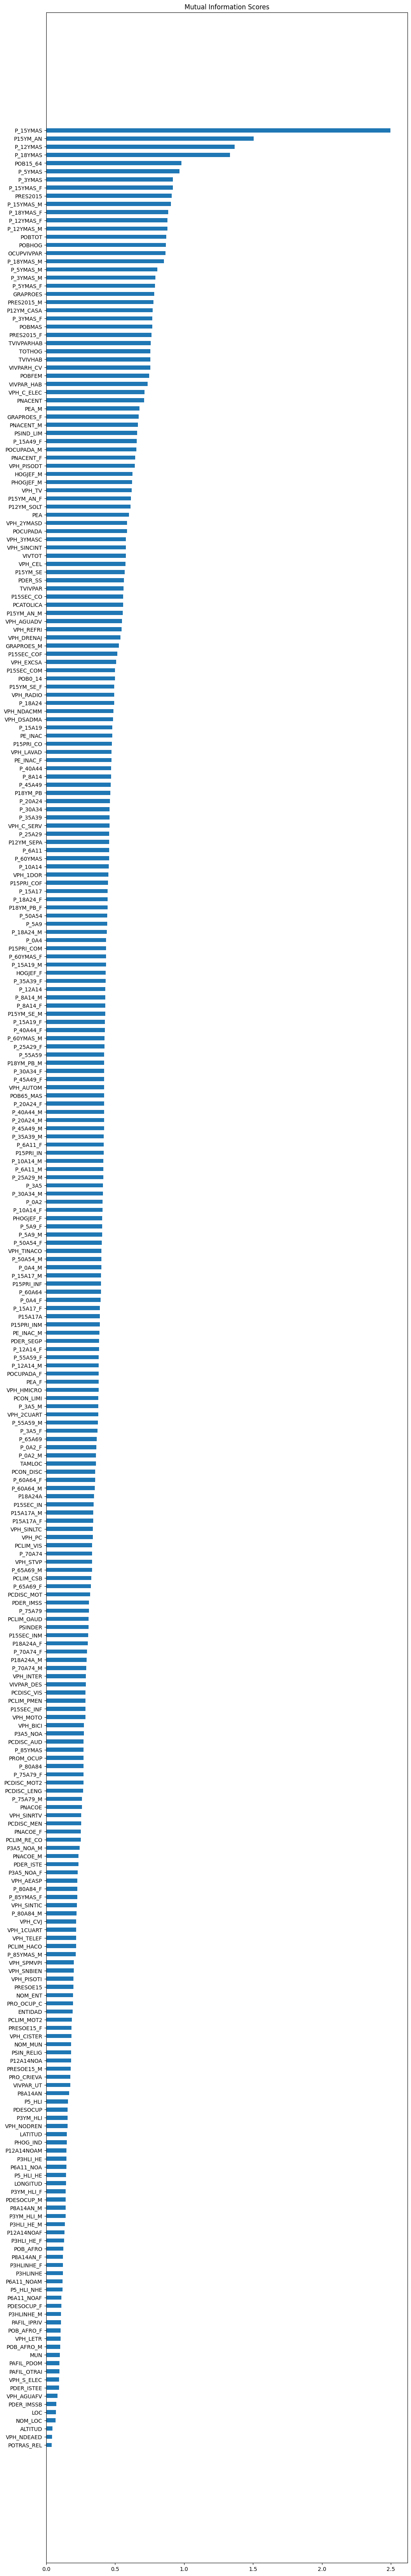

In [ ]:
    # Llama a la función plot_mi_scores para graficar
plot_mi_scores(mi_scores, "mi_scores_mutualinf.png")

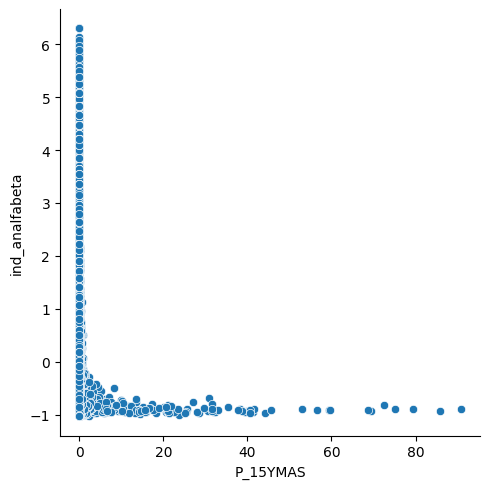

In [ ]:
sns.relplot(x="P_15YMAS", y="ind_analfabeta", data=iter_00csv20);

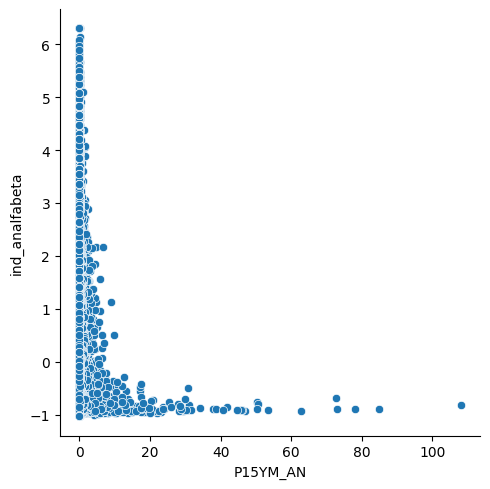

In [ ]:
sns.relplot(x="P15YM_AN", y="ind_analfabeta", data=iter_00csv20);

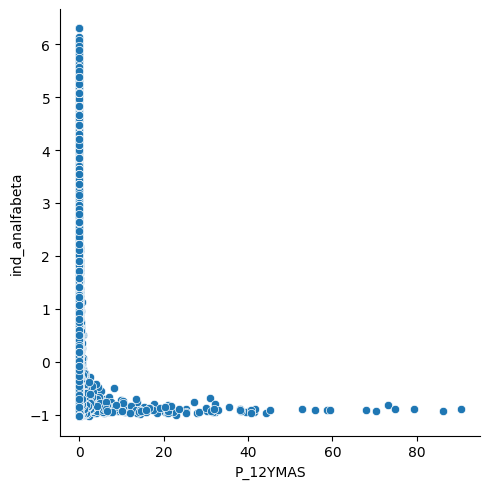

In [ ]:
sns.relplot(x="P_12YMAS", y="ind_analfabeta", data=iter_00csv20);

**Analisis PCA**

In [ ]:
iter_00csv20_antesPCA = iter_00csv20.copy()

#Analisis PCA
features = iter_00csv20.columns

X_scaled = iter_00csv20.loc[:, features]
X_scaled_sin_target = X_scaled.drop(columns=['ind_analfabeta'])

In [ ]:
X_scaled_sin_target.head()

ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC  LONGITUD   LATITUD  \
7         0        0    0       35    0     1010 -0.530884  0.370654   
9         0        0    0       35   95      596 -0.543046  0.371769   
12        0        0    0       35  105     2441 -0.526484  0.348529   
13        0        0    0       35  111     3689 -0.496786  0.333141   
14        0        0    0       35  119     5554 -0.530316  0.325106   

     ALTITUD     POBTOT  ...    VPH_CEL  VPH_INTER   VPH_STVP  VPH_SPMVPI  \
7   0.841166  41.486438  ...  41.633952  40.277358  44.027019   42.317799   
9   0.821857  -0.053861  ...  -0.048854  -0.039233  -0.048235   -0.032225   
12  0.857067   0.000381  ...  -0.004446  -0.007155  -0.009387   -0.020782   
13  0.946797  -0.053861  ...  -0.049391  -0.040184  -0.049305   -0.033315   
14  0.833215  -0.005149  ...  -0.008206  -0.022600  -0.025425   -0.025686   

      VPH_CVJ  VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  
7   48.698083   21.065888   27.761179    39.455449   15.937837  8.698098  
9   -0.033097   -0.115558   -0.130947    -0.082558   -0.210861 -0.523427  
12  -0.018547   -0.080196   -0.070343    -0.001811   -0.156580  1.781954  
13  -0.034006   -0.115558   -0.130947    -0.080694   -0.210861 -0.523427  
14  -0.011272   -0.080196   -0.075005     0.016823   -0.156580  1.781954  

[5 rows x 284 columns]

In [ ]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled_sin_target)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

PC1         PC2         PC3       PC4         PC5        PC6  \
0 -31038.024088 -956.722492 -351.974103 -9.053110  618.099055 -14.816403   
1 -31452.037752 -965.865702 -256.930164 -4.617265   -0.554525 -23.148774   
2 -29607.041050 -969.842160 -247.112304 -4.620476    0.321097 -23.073387   
3 -28359.043241 -972.453443 -241.228027 -4.633937   -0.579322 -23.071007   
4 -26494.046377 -976.255687 -233.400675 -4.696366    0.275328 -22.948696   

         PC7        PC8        PC9      PC10  ...         PC275         PC276  \
0 -67.081220  17.029159 -19.723070  2.930357  ...  1.399069e-09  2.464753e-11   
1  -0.762092   0.066453   1.976149  0.748991  ... -4.601190e-12 -5.202317e-12   
2  -0.542120   0.341533   1.763796  1.099612  ...  4.798150e-11 -5.771930e-12   
3  -0.668867  -0.058900   0.295746 -0.499412  ...  1.085848e-11  3.827960e-12   
4  -0.494211   0.411171   1.786031  1.129753  ... -4.562524e-11 -1.165751e-11   

          PC277         PC278         PC279         PC280         PC281  \
0  1.915623e-09 -2.561010e-09 -1.959724e-10  1.374166e-09  7.286577e-10   
1 -5.791321e-12 -7.082174e-12  4.447171e-14  1.214369e-11 -3.286037e-12   
2  3.308118e-11  1.620569e-10 -4.803091e-12 -9.577146e-11 -1.103459e-11   
3  4.281086e-12 -1.709833e-11  9.221779e-12  7.750549e-12  3.623961e-12   
4 -1.414467e-14 -1.660840e-10 -1.445956e-11  1.044903e-10  1.827563e-11   

          PC282         PC283         PC284  
0 -1.635912e-09  1.819861e-09 -1.319501e-09  
1 -6.246024e-12 -6.298088e-12  1.264970e-11  
2  1.303064e-10 -2.484099e-11 -7.253092e-11  
3 -3.508827e-12  1.536953e-11 -1.830636e-11  
4 -1.255973e-10  3.186893e-11  7.062994e-11  

[5 rows x 284 columns]

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

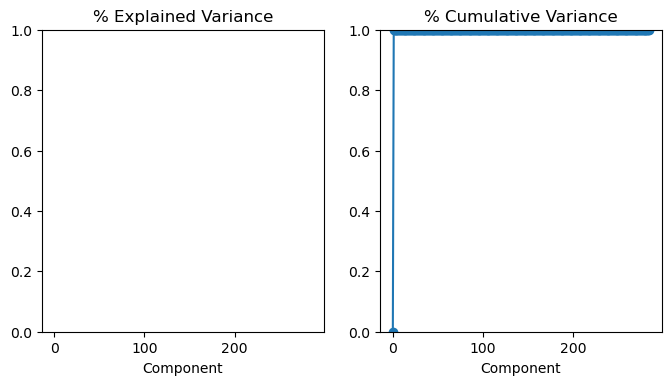

In [ ]:
# Look at explained variance
plot_variance(pca);

3.Pruebas usando modelos de aprendizaje automático

**A continuación se ejecutaran las predicciones usando modelos de aprendizaje automatico supervisado**

**Se ejecutara el modelo de prediccion usando arboles de decision simple**

In [ ]:
#columnas de mis scores de informacion mutua que se usaran para las predicciones
cols = mi_scores.sort_values(ascending=False).index

In [ ]:
cols

Index(['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS',
       'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M',
       ...
       'PAFIL_OTRAI', 'VPH_S_ELEC', 'PDER_ISTEE', 'VPH_AGUAFV', 'PDER_IMSSB',
       'LOC', 'NOM_LOC', 'ALTITUD', 'VPH_NDEAED', 'POTRAS_REL'],
      dtype='object', length=284)

In [ ]:
cols = cols.tolist()

In [ ]:
cols

['P_15YMAS',
 'P15YM_AN',
 'P_12YMAS',
 'P_18YMAS',
 'POB15_64',
 'P_5YMAS',
 'P_3YMAS',
 'P_15YMAS_F',
 'PRES2015',
 'P_15YMAS_M',
 'P_18YMAS_F',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'POBTOT',
 'POBHOG',
 'OCUPVIVPAR',
 'P_18YMAS_M',
 'P_5YMAS_M',
 'P_3YMAS_M',
 'P_5YMAS_F',
 'GRAPROES',
 'PRES2015_M',
 'P12YM_CASA',
 'P_3YMAS_F',
 'POBMAS',
 'PRES2015_F',
 'TVIVPARHAB',
 'TOTHOG',
 'TVIVHAB',
 'VIVPARH_CV',
 'POBFEM',
 'VIVPAR_HAB',
 'VPH_C_ELEC',
 'PNACENT',
 'PEA_M',
 'GRAPROES_F',
 'PNACENT_M',
 'PSIND_LIM',
 'P_15A49_F',
 'POCUPADA_M',
 'PNACENT_F',
 'VPH_PISODT',
 'HOGJEF_M',
 'PHOGJEF_M',
 'VPH_TV',
 'P15YM_AN_F',
 'P12YM_SOLT',
 'PEA',
 'VPH_2YMASD',
 'POCUPADA',
 'VPH_3YMASC',
 'VPH_SINCINT',
 'VIVTOT',
 'VPH_CEL',
 'P15YM_SE',
 'PDER_SS',
 'TVIVPAR',
 'P15SEC_CO',
 'PCATOLICA',
 'P15YM_AN_M',
 'VPH_AGUADV',
 'VPH_REFRI',
 'VPH_DRENAJ',
 'GRAPROES_M',
 'P15SEC_COF',
 'VPH_EXCSA',
 'P15SEC_COM',
 'POB0_14',
 'P15YM_SE_F',
 'VPH_RADIO',
 'P_18A24',
 'VPH_NDACMM',
 'VPH_DSADMA',
 'P_1

In [ ]:
len(cols[:250])

250

In [ ]:
#respaldar la lista de columnas de informacion mutua
#nombre_archivo = "D:/maestria/infotec/mcdi/semestre_4/seminario_3/tareas/entrega4/lista_columnas_im.txt"
nombre_archivo = "lista_columnas_im.txt"

with open(nombre_archivo, 'w', encoding='utf-8') as archivo:
  for col in cols:
    archivo.write(col + '\n')

In [ ]:
#respaldar la lista de columnas de informacion mutua
nombre_archivo = "lista_columnas_im.txt"

cols=[]
with open(nombre_archivo, "r") as archivo:
  for linea in archivo:
    #print(linea.strip())
    cols.append(linea.strip())

In [ ]:
cols

['P_15YMAS',
 'P15YM_AN',
 'P_12YMAS',
 'P_18YMAS',
 'POB15_64',
 'P_5YMAS',
 'P_3YMAS',
 'P_15YMAS_F',
 'PRES2015',
 'P_15YMAS_M',
 'P_18YMAS_F',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'POBTOT',
 'POBHOG',
 'OCUPVIVPAR',
 'P_18YMAS_M',
 'P_5YMAS_M',
 'P_3YMAS_M',
 'P_5YMAS_F',
 'GRAPROES',
 'PRES2015_M',
 'P12YM_CASA',
 'P_3YMAS_F',
 'POBMAS',
 'PRES2015_F',
 'TVIVPARHAB',
 'TOTHOG',
 'TVIVHAB',
 'VIVPARH_CV',
 'POBFEM',
 'VIVPAR_HAB',
 'VPH_C_ELEC',
 'PNACENT',
 'PEA_M',
 'GRAPROES_F',
 'PNACENT_M',
 'PSIND_LIM',
 'P_15A49_F',
 'POCUPADA_M',
 'PNACENT_F',
 'VPH_PISODT',
 'HOGJEF_M',
 'PHOGJEF_M',
 'VPH_TV',
 'P15YM_AN_F',
 'P12YM_SOLT',
 'PEA',
 'VPH_2YMASD',
 'POCUPADA',
 'VPH_3YMASC',
 'VPH_SINCINT',
 'VIVTOT',
 'VPH_CEL',
 'P15YM_SE',
 'PDER_SS',
 'TVIVPAR',
 'P15SEC_CO',
 'PCATOLICA',
 'P15YM_AN_M',
 'VPH_AGUADV',
 'VPH_REFRI',
 'VPH_DRENAJ',
 'GRAPROES_M',
 'P15SEC_COF',
 'VPH_EXCSA',
 'P15SEC_COM',
 'POB0_14',
 'P15YM_SE_F',
 'VPH_RADIO',
 'P_18A24',
 'VPH_NDACMM',
 'VPH_DSADMA',
 'P_1

**En las siguientes pruebas de modelos predictivos, se utilizaran 250,200,150,100,50 variables predictoras, resultado del análisis mutual information**

In [ ]:
print("250 variables predictoras")
print(cols[:250])

250 variables predictoras
['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS', 'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M', 'P_18YMAS_F', 'P_12YMAS_F', 'P_12YMAS_M', 'POBTOT', 'POBHOG', 'OCUPVIVPAR', 'P_18YMAS_M', 'P_5YMAS_M', 'P_3YMAS_M', 'P_5YMAS_F', 'GRAPROES', 'PRES2015_M', 'P12YM_CASA', 'P_3YMAS_F', 'POBMAS', 'PRES2015_F', 'TVIVPARHAB', 'TOTHOG', 'TVIVHAB', 'VIVPARH_CV', 'POBFEM', 'VIVPAR_HAB', 'VPH_C_ELEC', 'PNACENT', 'PEA_M', 'GRAPROES_F', 'PNACENT_M', 'PSIND_LIM', 'P_15A49_F', 'POCUPADA_M', 'PNACENT_F', 'VPH_PISODT', 'HOGJEF_M', 'PHOGJEF_M', 'VPH_TV', 'P15YM_AN_F', 'P12YM_SOLT', 'PEA', 'VPH_2YMASD', 'POCUPADA', 'VPH_3YMASC', 'VPH_SINCINT', 'VIVTOT', 'VPH_CEL', 'P15YM_SE', 'PDER_SS', 'TVIVPAR', 'P15SEC_CO', 'PCATOLICA', 'P15YM_AN_M', 'VPH_AGUADV', 'VPH_REFRI', 'VPH_DRENAJ', 'GRAPROES_M', 'P15SEC_COF', 'VPH_EXCSA', 'P15SEC_COM', 'POB0_14', 'P15YM_SE_F', 'VPH_RADIO', 'P_18A24', 'VPH_NDACMM', 'VPH_DSADMA', 'P_15A19', 'PE_INAC', 'P15PRI_CO', 'VPH_LAVAD', 'PE

In [ ]:
print("200 variables predictoras")
print(cols[:200])

200 variables predictoras
['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS', 'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M', 'P_18YMAS_F', 'P_12YMAS_F', 'P_12YMAS_M', 'POBTOT', 'POBHOG', 'OCUPVIVPAR', 'P_18YMAS_M', 'P_5YMAS_M', 'P_3YMAS_M', 'P_5YMAS_F', 'GRAPROES', 'PRES2015_M', 'P12YM_CASA', 'P_3YMAS_F', 'POBMAS', 'PRES2015_F', 'TVIVPARHAB', 'TOTHOG', 'TVIVHAB', 'VIVPARH_CV', 'POBFEM', 'VIVPAR_HAB', 'VPH_C_ELEC', 'PNACENT', 'PEA_M', 'GRAPROES_F', 'PNACENT_M', 'PSIND_LIM', 'P_15A49_F', 'POCUPADA_M', 'PNACENT_F', 'VPH_PISODT', 'HOGJEF_M', 'PHOGJEF_M', 'VPH_TV', 'P15YM_AN_F', 'P12YM_SOLT', 'PEA', 'VPH_2YMASD', 'POCUPADA', 'VPH_3YMASC', 'VPH_SINCINT', 'VIVTOT', 'VPH_CEL', 'P15YM_SE', 'PDER_SS', 'TVIVPAR', 'P15SEC_CO', 'PCATOLICA', 'P15YM_AN_M', 'VPH_AGUADV', 'VPH_REFRI', 'VPH_DRENAJ', 'GRAPROES_M', 'P15SEC_COF', 'VPH_EXCSA', 'P15SEC_COM', 'POB0_14', 'P15YM_SE_F', 'VPH_RADIO', 'P_18A24', 'VPH_NDACMM', 'VPH_DSADMA', 'P_15A19', 'PE_INAC', 'P15PRI_CO', 'VPH_LAVAD', 'PE

In [ ]:
print("150 variables predictoras")
print(cols[:150])

150 variables predictoras
['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS', 'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M', 'P_18YMAS_F', 'P_12YMAS_F', 'P_12YMAS_M', 'POBTOT', 'POBHOG', 'OCUPVIVPAR', 'P_18YMAS_M', 'P_5YMAS_M', 'P_3YMAS_M', 'P_5YMAS_F', 'GRAPROES', 'PRES2015_M', 'P12YM_CASA', 'P_3YMAS_F', 'POBMAS', 'PRES2015_F', 'TVIVPARHAB', 'TOTHOG', 'TVIVHAB', 'VIVPARH_CV', 'POBFEM', 'VIVPAR_HAB', 'VPH_C_ELEC', 'PNACENT', 'PEA_M', 'GRAPROES_F', 'PNACENT_M', 'PSIND_LIM', 'P_15A49_F', 'POCUPADA_M', 'PNACENT_F', 'VPH_PISODT', 'HOGJEF_M', 'PHOGJEF_M', 'VPH_TV', 'P15YM_AN_F', 'P12YM_SOLT', 'PEA', 'VPH_2YMASD', 'POCUPADA', 'VPH_3YMASC', 'VPH_SINCINT', 'VIVTOT', 'VPH_CEL', 'P15YM_SE', 'PDER_SS', 'TVIVPAR', 'P15SEC_CO', 'PCATOLICA', 'P15YM_AN_M', 'VPH_AGUADV', 'VPH_REFRI', 'VPH_DRENAJ', 'GRAPROES_M', 'P15SEC_COF', 'VPH_EXCSA', 'P15SEC_COM', 'POB0_14', 'P15YM_SE_F', 'VPH_RADIO', 'P_18A24', 'VPH_NDACMM', 'VPH_DSADMA', 'P_15A19', 'PE_INAC', 'P15PRI_CO', 'VPH_LAVAD', 'PE

In [ ]:
print("100 variables predictoras")
print(cols[:100])

100 variables predictoras
['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS', 'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M', 'P_18YMAS_F', 'P_12YMAS_F', 'P_12YMAS_M', 'POBTOT', 'POBHOG', 'OCUPVIVPAR', 'P_18YMAS_M', 'P_5YMAS_M', 'P_3YMAS_M', 'P_5YMAS_F', 'GRAPROES', 'PRES2015_M', 'P12YM_CASA', 'P_3YMAS_F', 'POBMAS', 'PRES2015_F', 'TVIVPARHAB', 'TOTHOG', 'TVIVHAB', 'VIVPARH_CV', 'POBFEM', 'VIVPAR_HAB', 'VPH_C_ELEC', 'PNACENT', 'PEA_M', 'GRAPROES_F', 'PNACENT_M', 'PSIND_LIM', 'P_15A49_F', 'POCUPADA_M', 'PNACENT_F', 'VPH_PISODT', 'HOGJEF_M', 'PHOGJEF_M', 'VPH_TV', 'P15YM_AN_F', 'P12YM_SOLT', 'PEA', 'VPH_2YMASD', 'POCUPADA', 'VPH_3YMASC', 'VPH_SINCINT', 'VIVTOT', 'VPH_CEL', 'P15YM_SE', 'PDER_SS', 'TVIVPAR', 'P15SEC_CO', 'PCATOLICA', 'P15YM_AN_M', 'VPH_AGUADV', 'VPH_REFRI', 'VPH_DRENAJ', 'GRAPROES_M', 'P15SEC_COF', 'VPH_EXCSA', 'P15SEC_COM', 'POB0_14', 'P15YM_SE_F', 'VPH_RADIO', 'P_18A24', 'VPH_NDACMM', 'VPH_DSADMA', 'P_15A19', 'PE_INAC', 'P15PRI_CO', 'VPH_LAVAD', 'PE

In [ ]:
print("50 variables predictoras")
print(cols[:50])

50 variables predictoras
['P_15YMAS', 'P15YM_AN', 'P_12YMAS', 'P_18YMAS', 'POB15_64', 'P_5YMAS', 'P_3YMAS', 'P_15YMAS_F', 'PRES2015', 'P_15YMAS_M', 'P_18YMAS_F', 'P_12YMAS_F', 'P_12YMAS_M', 'POBTOT', 'POBHOG', 'OCUPVIVPAR', 'P_18YMAS_M', 'P_5YMAS_M', 'P_3YMAS_M', 'P_5YMAS_F', 'GRAPROES', 'PRES2015_M', 'P12YM_CASA', 'P_3YMAS_F', 'POBMAS', 'PRES2015_F', 'TVIVPARHAB', 'TOTHOG', 'TVIVHAB', 'VIVPARH_CV', 'POBFEM', 'VIVPAR_HAB', 'VPH_C_ELEC', 'PNACENT', 'PEA_M', 'GRAPROES_F', 'PNACENT_M', 'PSIND_LIM', 'P_15A49_F', 'POCUPADA_M', 'PNACENT_F', 'VPH_PISODT', 'HOGJEF_M', 'PHOGJEF_M', 'VPH_TV', 'P15YM_AN_F', 'P12YM_SOLT', 'PEA', 'VPH_2YMASD', 'POCUPADA']


In [ ]:
# Guardar cols, en un archivo pickle
import pickle

with open("mi_cols.pkl", "wb") as file:
    pickle.dump(cols, file)

In [1]:
#recuperar cols
# Recuperar desde el archivo pickle
#se serializa para no reprocesar el notebook
import pickle

with open("mi_cols.pkl", "rb") as file:
    #mi_cols_loaded = pickle.load(file)
    cols = pickle.load(file)

In [ ]:
#mi_cols_loaded
cols

['P_15YMAS',
 'P15YM_AN',
 'P_12YMAS',
 'P_18YMAS',
 'POB15_64',
 'P_5YMAS',
 'P_3YMAS',
 'P_15YMAS_F',
 'PRES2015',
 'P_15YMAS_M',
 'P_18YMAS_F',
 'P_12YMAS_F',
 'P_12YMAS_M',
 'POBTOT',
 'POBHOG',
 'OCUPVIVPAR',
 'P_18YMAS_M',
 'P_5YMAS_M',
 'P_3YMAS_M',
 'P_5YMAS_F',
 'GRAPROES',
 'PRES2015_M',
 'P12YM_CASA',
 'P_3YMAS_F',
 'POBMAS',
 'PRES2015_F',
 'TVIVPARHAB',
 'TOTHOG',
 'TVIVHAB',
 'VIVPARH_CV',
 'POBFEM',
 'VIVPAR_HAB',
 'VPH_C_ELEC',
 'PNACENT',
 'PEA_M',
 'GRAPROES_F',
 'PNACENT_M',
 'PSIND_LIM',
 'P_15A49_F',
 'POCUPADA_M',
 'PNACENT_F',
 'VPH_PISODT',
 'HOGJEF_M',
 'PHOGJEF_M',
 'VPH_TV',
 'P15YM_AN_F',
 'P12YM_SOLT',
 'PEA',
 'VPH_2YMASD',
 'POCUPADA',
 'VPH_3YMASC',
 'VPH_SINCINT',
 'VIVTOT',
 'VPH_CEL',
 'P15YM_SE',
 'PDER_SS',
 'TVIVPAR',
 'P15SEC_CO',
 'PCATOLICA',
 'P15YM_AN_M',
 'VPH_AGUADV',
 'VPH_REFRI',
 'VPH_DRENAJ',
 'GRAPROES_M',
 'P15SEC_COF',
 'VPH_EXCSA',
 'P15SEC_COM',
 'POB0_14',
 'P15YM_SE_F',
 'VPH_RADIO',
 'P_18A24',
 'VPH_NDACMM',
 'VPH_DSADMA',
 'P_1

In [ ]:
# Guardar iter_00csv20, en un archivo pickle
import pickle

with open("mi_iter_00csv20.pkl", "wb") as file:
    pickle.dump(iter_00csv20, file)

In [2]:
#recuperar mi_scores
# Recuperar desde el archivo pickle
#para no reprocesar el notebook
import pickle

with open("mi_iter_00csv20.pkl", "rb") as file:
    #mi_iter_00csv20_loaded = pickle.load(file)
    iter_00csv20 = pickle.load(file)

In [ ]:
#mi_iter_00csv20_loaded
iter_00csv20

ENTIDAD  NOM_ENT  MUN  NOM_MUN  LOC  NOM_LOC  LONGITUD   LATITUD  \
7             0        0    0       35    0     1010 -0.530884  0.370654   
9             0        0    0       35   95      596 -0.543046  0.371769   
12            0        0    0       35  105     2441 -0.526484  0.348529   
13            0        0    0       35  111     3689 -0.496786  0.333141   
14            0        0    0       35  119     5554 -0.530316  0.325106   
...         ...      ...  ...      ...  ...      ...       ...       ...   
195652       31       31   57     1702   29    33832 -0.723155  0.251837   
195655       31       31   57     1702   32    36244 -0.724252  0.262595   
195656       31       31   57     1702   34    37147 -0.719070  0.262301   
195657       31       31   57     1702   36    38658 -0.753649  0.278130   
195659       31       31   57     1702   40    54356 -0.737963  0.264176   

         ALTITUD     POBTOT  ...  VPH_INTER   VPH_STVP  VPH_SPMVPI    VPH_CVJ  \
7       0.841166  41.486438  ...  40.277358  44.027019   42.317799  48.698083   
9       0.821857  -0.053861  ...  -0.039233  -0.048235   -0.032225  -0.033097   
12      0.857067   0.000381  ...  -0.007155  -0.009387   -0.020782  -0.018547   
13      0.946797  -0.053861  ...  -0.040184  -0.049305   -0.033315  -0.034006   
14      0.833215  -0.005149  ...  -0.022600  -0.025425   -0.025686  -0.011272   
...          ...        ...  ...        ...        ...         ...        ...   
195652  1.506758  -0.054198  ...  -0.040184  -0.049661   -0.033315  -0.034006   
195655  1.152381  -0.055256  ...  -0.040184  -0.048592   -0.033315  -0.034006   
195656  1.546512  -0.051553  ...  -0.039946  -0.048235   -0.033315  -0.034006   
195657  0.916130  -0.047899  ...  -0.038045  -0.045384   -0.033315  -0.034006   
195659  0.953612  -0.051168  ...  -0.037333  -0.042533   -0.032770  -0.033097   

        VPH_SINRTV  VPH_SINLTC  VPH_SINCINT  VPH_SINTIC    TAMLOC  \
7        21.065888   27.761179    39.455449   15.937837  8.698098   
9        -0.115558   -0.130947    -0.082558   -0.210861 -0.523427   
12       -0.080196   -0.070343    -0.001811   -0.156580  1.781954   
13       -0.115558   -0.130947    -0.080694   -0.210861 -0.523427   
14       -0.080196   -0.075005     0.016823   -0.156580  1.781954   
...            ...         ...          ...         ...       ...   
195652   -0.115558   -0.116962    -0.078831   -0.210861 -0.523427   
195655   -0.115558   -0.112300    -0.081937   -0.210861 -0.523427   
195656   -0.094341   -0.116962    -0.073862   -0.156580 -0.523427   
195657   -0.094341   -0.093652    -0.062682   -0.183721 -0.523427   
195659   -0.108485   -0.088990    -0.074483   -0.210861 -0.523427   

        ind_analfabeta  
7            -0.927371  
9            -0.559023  
12           -0.513202  
13           -0.273576  
14           -0.561285  
...                ...  
195652       -0.152220  
195655        0.189937  
195656       -0.708583  
195657       -0.856084  
195659       -0.075713  

[108175 rows x 285 columns]

In [ ]:
iter_00csv20.describe()

ENTIDAD        NOM_ENT            MUN        NOM_MUN  \
count  108175.000000  108175.000000  108175.000000  108175.000000   
mean       16.156977      15.894005      66.338812    1070.249115   
std         8.330283       8.686278      88.737650     689.047260   
min         0.000000       0.000000       0.000000       0.000000   
25%        10.000000      10.000000      14.000000     499.000000   
50%        15.000000      15.000000      37.000000     948.000000   
75%        23.000000      23.000000      82.000000    1744.000000   
max        31.000000      31.000000     569.000000    2325.000000   

                 LOC        NOM_LOC      LONGITUD       LATITUD       ALTITUD  \
count  108175.000000  108175.000000  1.081750e+05  1.081750e+05  1.081750e+05   
mean      248.285094   32046.437125  2.417192e-16  2.753497e-16 -7.987243e-17   
std       459.640537   17781.856793  1.000005e+00  1.000005e+00  1.000005e+00   
min         0.000000       0.000000 -3.718309e+00 -1.711337e+00 -1.312354e+00   
25%        24.000000   17856.500000 -5.034483e-01 -7.032707e-01 -1.086326e+00   
50%        80.000000   31305.000000  8.318467e-02 -1.856472e-01  3.018830e-02   
75%       242.000000   47252.500000  5.485442e-01  3.632161e-01  8.831912e-01   
max      3447.000000   64950.000000  2.565687e+00  3.442566e+00  2.681199e+00   

             POBTOT  ...     VPH_INTER      VPH_STVP    VPH_SPMVPI  \
count  1.081750e+05  ...  1.081750e+05  1.081750e+05  1.081750e+05   
mean   4.098717e-17  ...  5.110259e-17  4.440276e-17  5.839357e-17   
std    1.000005e+00  ...  1.000005e+00  1.000005e+00  1.000005e+00   
min   -5.578486e-02  ... -4.018396e-02 -5.001751e-02 -3.331486e-02   
25%   -5.453459e-02  ... -4.018396e-02 -4.966110e-02 -3.331486e-02   
50%   -5.097613e-02  ... -3.970873e-02 -4.823547e-02 -3.331486e-02   
75%   -3.938709e-02  ... -3.780780e-02 -4.146370e-02 -3.276994e-02   
max    8.820771e+01  ...  9.640660e+01  1.059765e+02  1.081449e+02   

            VPH_CVJ    VPH_SINRTV    VPH_SINLTC   VPH_SINCINT    VPH_SINTIC  \
count  1.081750e+05  1.081750e+05  1.081750e+05  1.081750e+05  1.081750e+05   
mean   5.228491e-17  4.019895e-17  3.849115e-17  3.573240e-17  2.101906e-18   
std    1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00  1.000005e+00   
min   -3.400642e-02 -1.155576e-01 -1.356092e-01 -8.628445e-02 -2.108615e-01   
25%   -3.400642e-02 -1.084854e-01 -1.262854e-01 -8.255767e-02 -2.108615e-01   
50%   -3.400642e-02 -9.434083e-02 -1.076378e-01 -7.261960e-02 -1.565801e-01   
75%   -3.309706e-02 -4.483495e-02 -3.304747e-02 -4.156312e-02 -4.801747e-02   
max    1.005702e+02  1.097097e+02  9.166645e+01  8.638614e+01  9.540572e+01   

             TAMLOC  ind_analfabeta  
count  1.081750e+05    1.081750e+05  
mean   4.203812e-18   -1.050953e-17  
std    1.000005e+00    1.000005e+00  
min   -5.234269e-01   -1.032051e+00  
25%   -5.234269e-01   -6.714641e-01  
50%   -5.234269e-01   -2.511356e-01  
75%    2.450336e-01    3.799084e-01  
max    9.466559e+00    6.299872e+00  

[8 rows x 285 columns]

**Prueba del modelo DecisionTreeRegressor**

Variables predictoras 250: 
Mean Squared Error (MSE) para 250 predictoras:  0.04814944958010335
Mean Absolute Error (MSE) para 250 predictoras:  0.09490257162915978


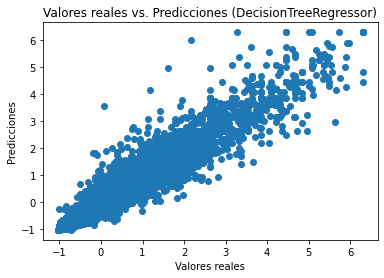

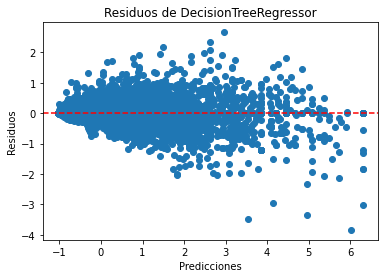

Variables predictoras 200: 
Mean Squared Error (MSE) para 200 predictoras:  0.03785026480668037
Mean Absolute Error (MSE) para 200 predictoras:  0.08410023923461803


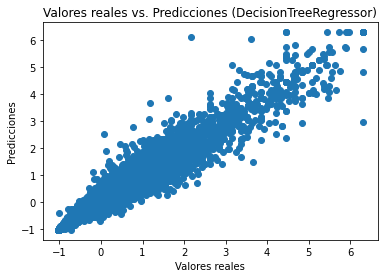

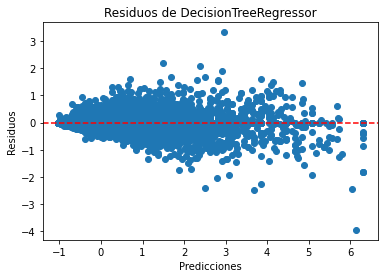

Variables predictoras 150: 
Mean Squared Error (MSE) para 150 predictoras:  0.03552081776706158
Mean Absolute Error (MSE) para 150 predictoras:  0.07954107509776234


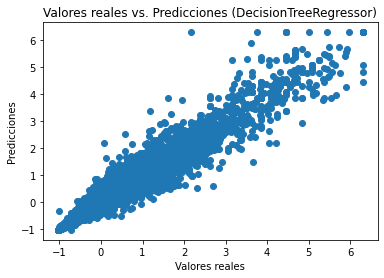

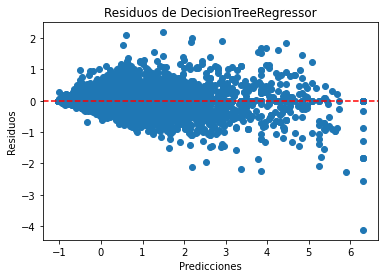

Variables predictoras 100: 
Mean Squared Error (MSE) para 100 predictoras:  0.03226815614853654
Mean Absolute Error (MSE) para 100 predictoras:  0.07333727556804873


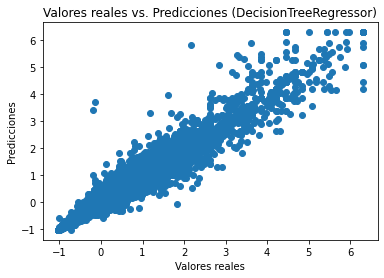

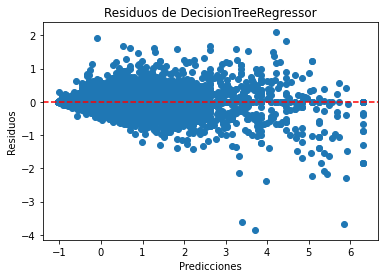

Variables predictoras 50: 
Mean Squared Error (MSE) para 50 predictoras:  0.01757508017549729
Mean Absolute Error (MSE) para 50 predictoras:  0.04611669647865554


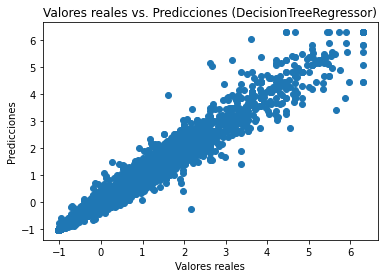

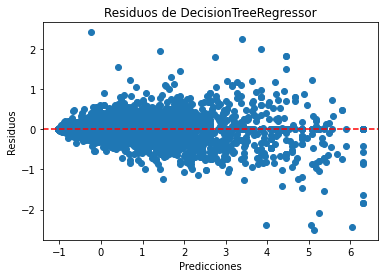

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#target
y = iter_00csv20.ind_analfabeta

for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    #dividir los datos en entrenamiento y validacion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define model. Specify a number for random_state to ensure same results each run
    tree_reg = DecisionTreeRegressor(random_state=1)

    # Fit model (entrenamiento)
    tree_reg.fit(X_train, y_train)

    # Paso 4: Realizar predicciones en el conjunto de prueba
    y_pred = tree_reg.predict(X_test)

    #mae
    mae = mean_absolute_error(y_test, y_pred)
    #mse
    mse = mean_squared_error(y_test, y_pred)

    print(f"Variables predictoras {ncol}: ")
    #print(cols[:ncol])
    print(f"Mean Squared Error (MSE) para {ncol} predictoras: ", mse)
    print(f"Mean Absolute Error (MSE) para {ncol} predictoras: ", mae)

    # Graficar valores reales vs. predicciones
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Valores reales vs. Predicciones (DecisionTreeRegressor)")
    plt.show()

    # Calcular los residuos (diferencias entre los valores reales y las predicciones)
    residuos = y_test - y_pred

    # Graficar los residuos
    plt.scatter(y_pred, residuos)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuos de DecisionTreeRegressor")
    plt.show()

**Se usa el modelo DecisionTreeRegresor con validacion cruzada con 5-fold, sin hiperparametrización, para ver como mejora el modelo con oprimizaciones del error cuadratico medio (mse) y error absoluto medio (mae)**

Errores con  250  columnas: 
MSE scores mean:
 [0.17286131 0.09203153 0.08698969 0.06101963 0.05508102]
MSE scores std:
 [0.06403539 0.06235143 0.05233863 0.04257158 0.04197624]


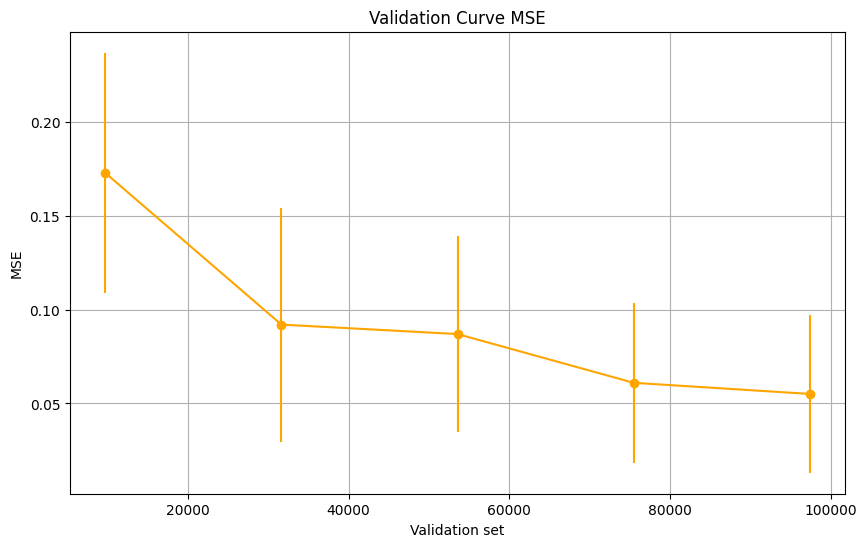

MAE scores mean:
 [0.2429607  0.15619696 0.14283949 0.11164123 0.10097993]
MAE scores mean:
 [0.05454109 0.05495155 0.04914579 0.04135961 0.03898366]


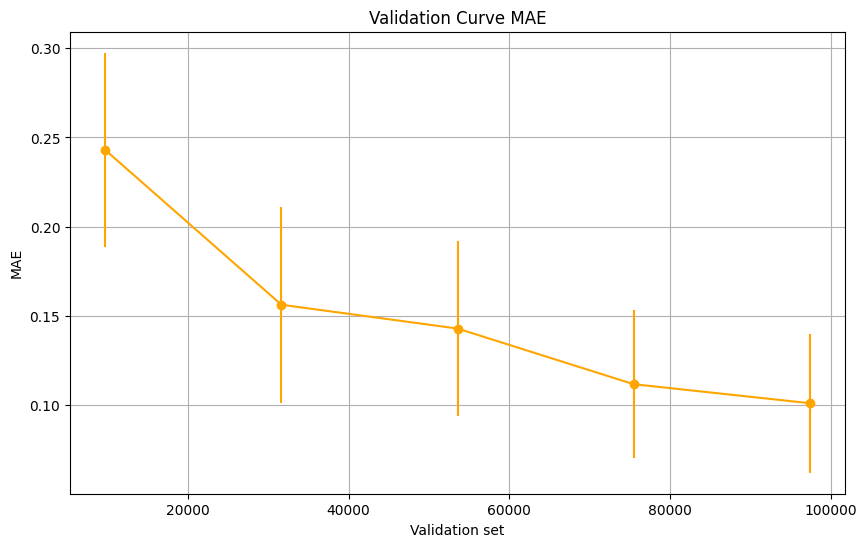

 
Errores con  200  columnas: 
MSE scores mean:
 [0.14186802 0.07339279 0.0595891  0.04790377 0.04269175]
MSE scores std:
 [0.05877571 0.03675252 0.03449078 0.02911457 0.02703014]


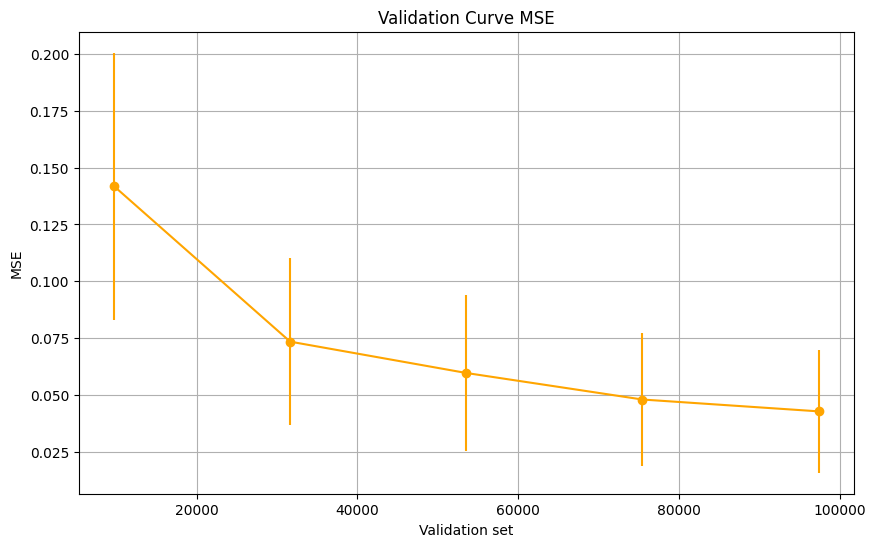

MAE scores mean:
 [0.20472474 0.13353184 0.11142953 0.09337692 0.08382049]
MAE scores mean:
 [0.04695773 0.03446292 0.03420078 0.03122173 0.02714926]


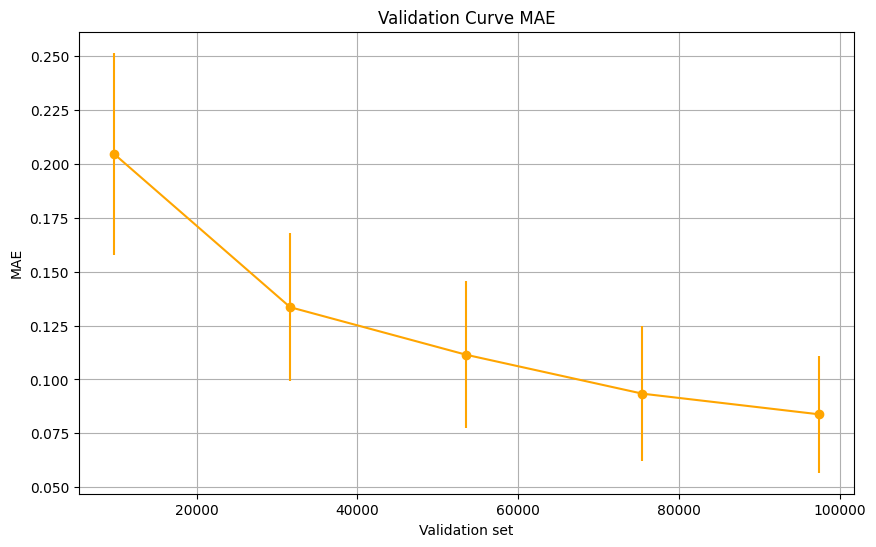

 
Errores con  150  columnas: 
MSE scores mean:
 [0.13193629 0.06974109 0.05558429 0.04475024 0.0394781 ]
MSE scores std:
 [0.05849579 0.03702222 0.02969829 0.02807838 0.02263151]


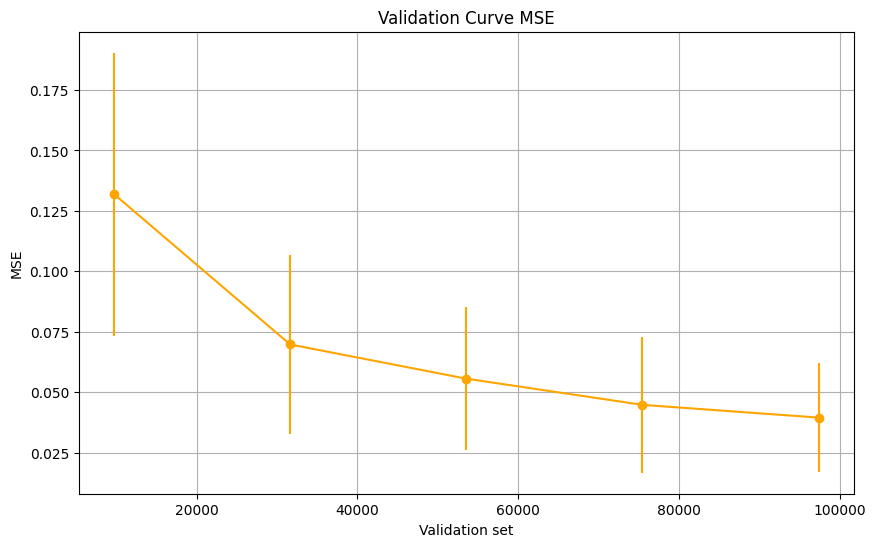

MAE scores mean:
 [0.19574045 0.12860797 0.10684024 0.08912966 0.08007351]
MAE scores mean:
 [0.045978   0.03323414 0.0325618  0.03012604 0.02520889]


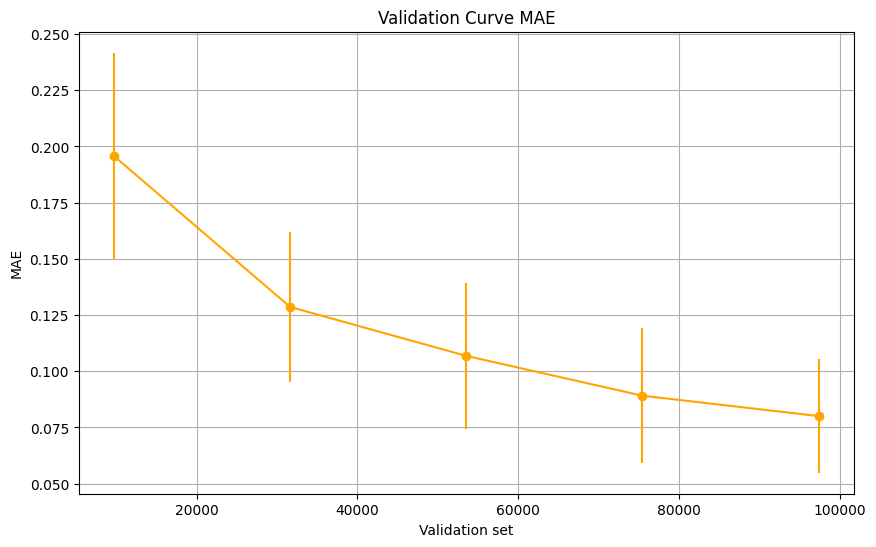

 
Errores con  100  columnas: 
MSE scores mean:
 [0.12785617 0.06191254 0.05027502 0.03821067 0.03481156]
MSE scores std:
 [0.04637412 0.03390347 0.0276647  0.02521023 0.02243957]


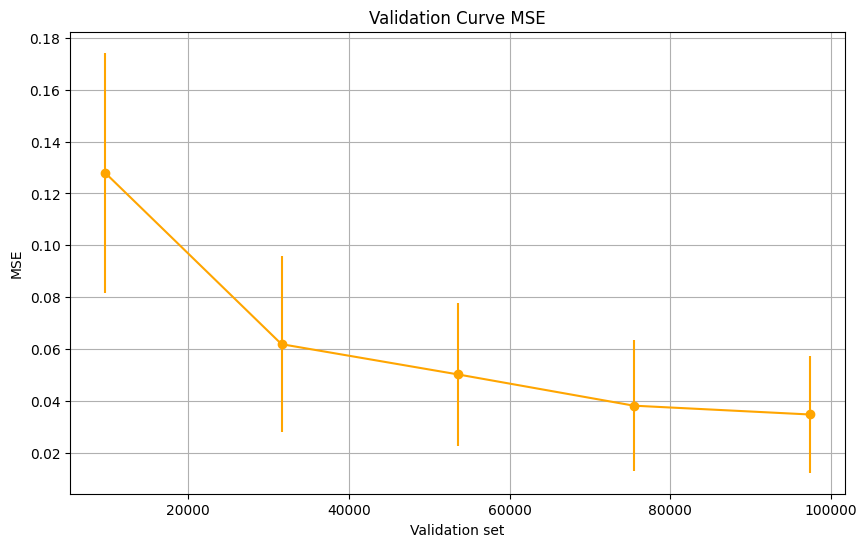

MAE scores mean:
 [0.19163187 0.11666712 0.09718834 0.07924612 0.07259339]
MAE scores mean:
 [0.04282686 0.03435408 0.0309692  0.02959185 0.02429012]


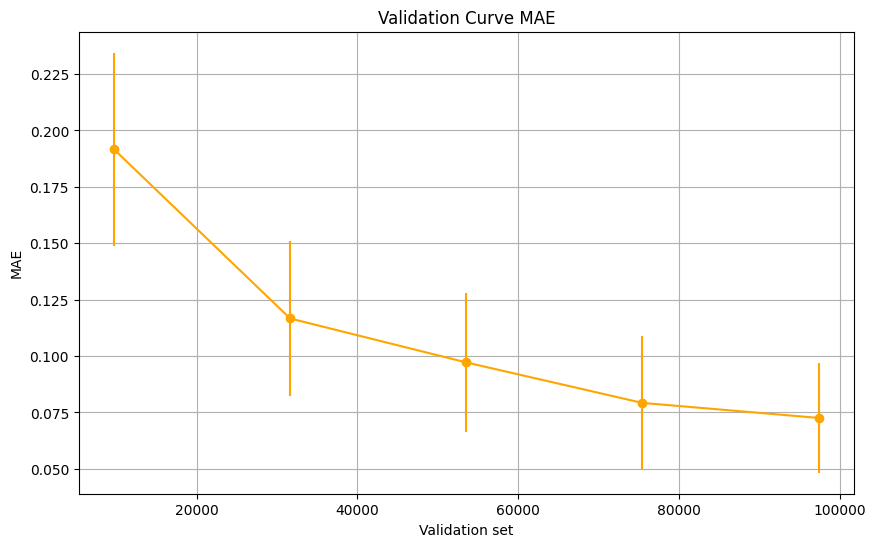

 
Errores con  50  columnas: 
MSE scores mean:
 [0.09819642 0.03921153 0.02912886 0.02257277 0.02177099]
MSE scores std:
 [0.0529327  0.03004274 0.02177966 0.02022245 0.01831962]


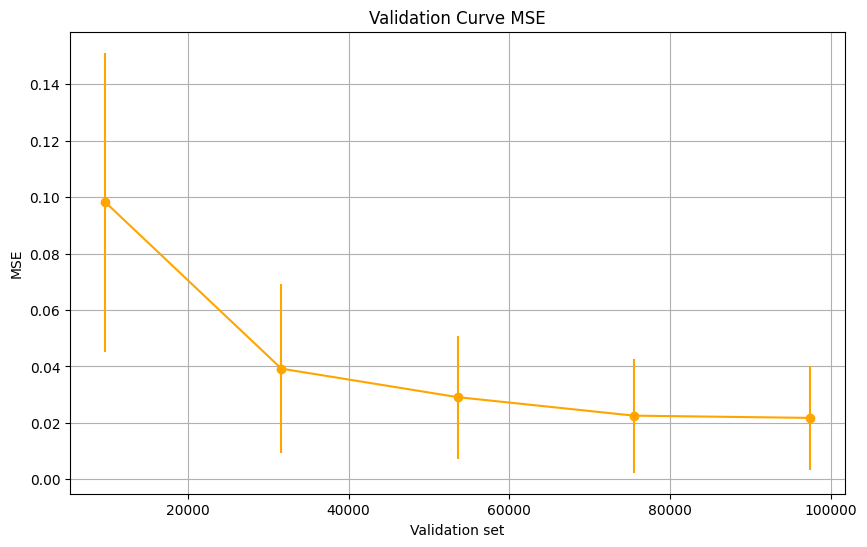

MAE scores mean:
 [0.15141178 0.07928827 0.0643508  0.04985844 0.04786039]
MAE scores mean:
 [0.04266128 0.02803546 0.02487227 0.0227981  0.02194968]


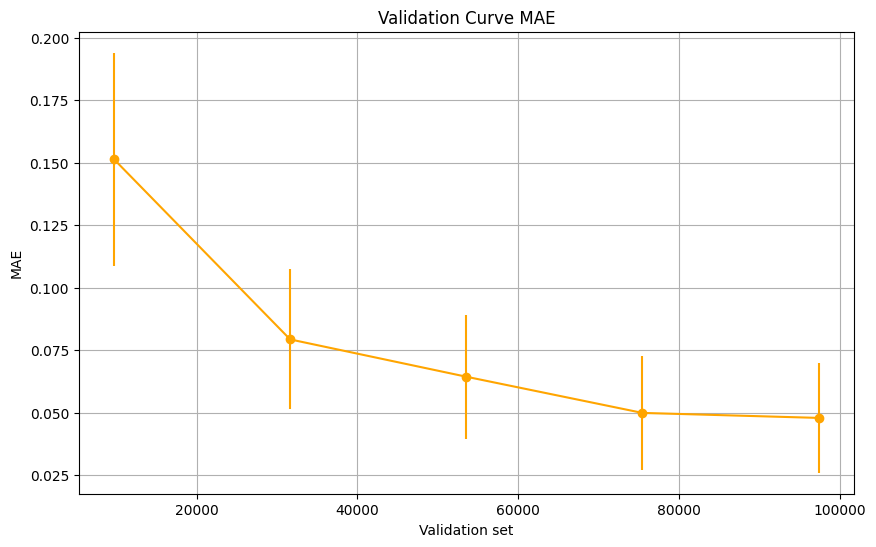

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor(random_state=0))
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 5)  # 5 tamaños de entrenamiento diferentes


for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X, y, train_sizes=train_sizes, cv=10, scoring='neg_mean_squared_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MSE scores mean:\n", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MSE scores std:\n", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation set")
    plt.ylabel("MSE")
    plt.title("Validation Curve MSE")
    plt.grid()
    plt.show()


    # Calcula las curvas de aprendizaje mae
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X, y, train_sizes=train_sizes, cv=10, scoring='neg_mean_absolute_error')

    # Calcula la media y la desviación estándar de los puntajes de validación mae
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MAE scores mean:\n", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MAE scores mean:\n", validation_scores_std)


    # Plotea las curvas de aprendizaje de mae
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation set")
    plt.ylabel("MAE")
    plt.title("Validation Curve MAE")
    plt.grid()
    plt.show()

    print(" ")

**Se usa el modelo DecisionTreeRegresor con validacion cruzada con 10-fold, sin hiperparametrización, para ver como mejora el modelo con oprimizaciones del error cuadratico medio (mse) y error absoluto medio (mae)**

Errores con  250  columnas: 
MSE scores mean:
 [0.17101079 0.1286444  0.09737907 0.08941485 0.08110177 0.07757057
 0.06417108 0.05775836 0.05691248 0.05538724]
MSE scores std:
 [0.06271478 0.04187821 0.05271998 0.05146484 0.04734031 0.04776908
 0.04058521 0.03758954 0.04016188 0.04153867]


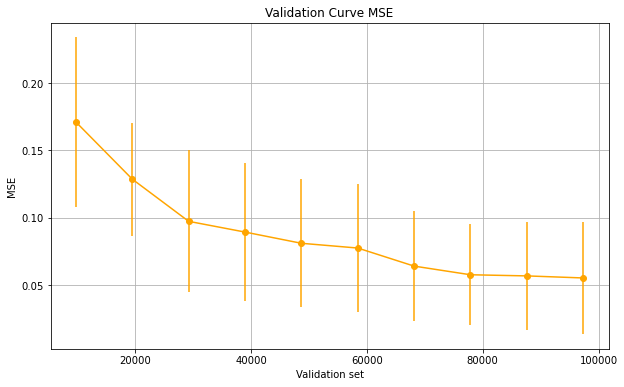

MAE scores mean:
 [0.24233762 0.20247091 0.16630352 0.1552996  0.13887036 0.13012933
 0.11975355 0.10889363 0.10271586 0.10115414]
MAE scores mean:
 [0.05444739 0.03715696 0.04570791 0.04441919 0.04477049 0.04554714
 0.03938031 0.03951693 0.04002667 0.03891576]


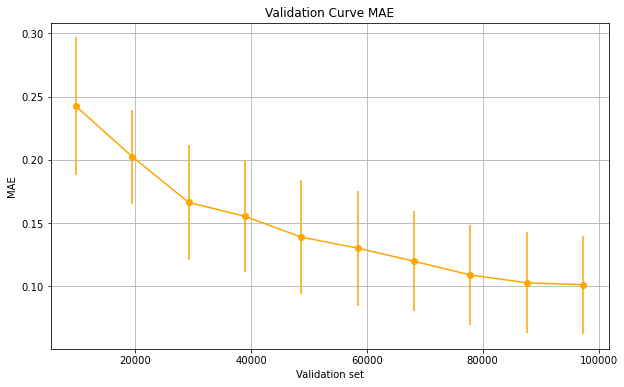

 
Errores con  200  columnas: 
MSE scores mean:
 [0.1389866  0.09415815 0.08009793 0.06973065 0.06052219 0.05366264
 0.05109007 0.046482   0.04697729 0.04298725]
MSE scores std:
 [0.0571132  0.03743397 0.03710779 0.0324668  0.0311332  0.02973203
 0.02938582 0.03077215 0.03280327 0.02756609]


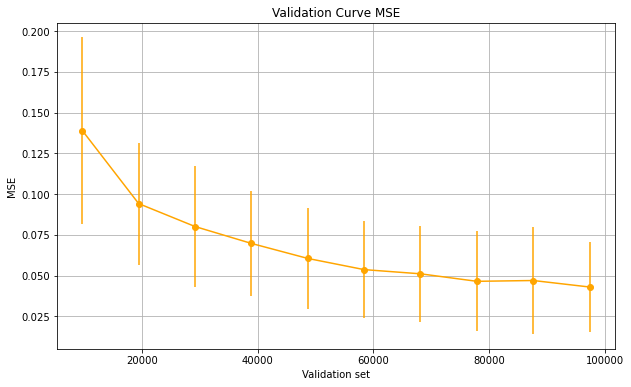

MAE scores mean:
 [0.20428062 0.16004585 0.1435712  0.12797501 0.11574227 0.10538872
 0.09904753 0.09093274 0.08822613 0.08354189]
MAE scores mean:
 [0.04711682 0.03538798 0.03454554 0.03279032 0.03408027 0.03198529
 0.03065965 0.03162768 0.03095144 0.02729581]


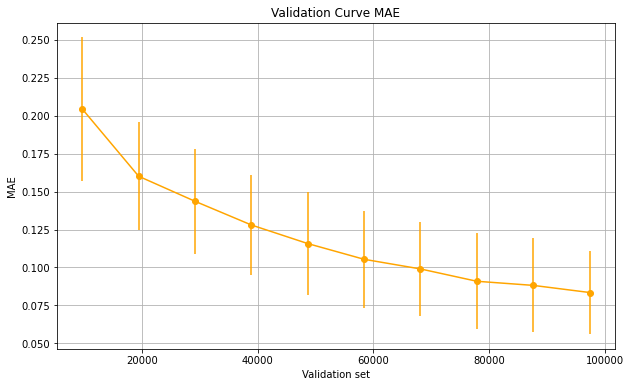

 
Errores con  150  columnas: 
MSE scores mean:
 [0.13315562 0.0900236  0.07473547 0.06432942 0.05611326 0.048739
 0.04565749 0.04182284 0.04266517 0.03994213]
MSE scores std:
 [0.0613421  0.03651366 0.03199625 0.0291085  0.02999521 0.02612846
 0.02503829 0.02532036 0.02696641 0.02429856]


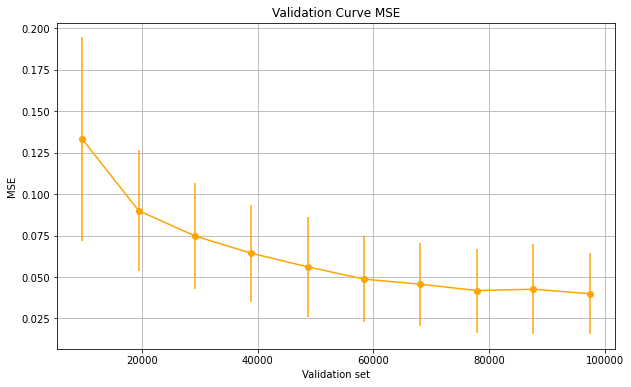

MAE scores mean:
 [0.19624367 0.15685017 0.13841947 0.12247783 0.11040065 0.10001098
 0.09436551 0.086601   0.08410843 0.07996096]
MAE scores mean:
 [0.04695194 0.03394373 0.03239325 0.03000437 0.03297874 0.03055938
 0.02939059 0.02934392 0.02815175 0.02521801]


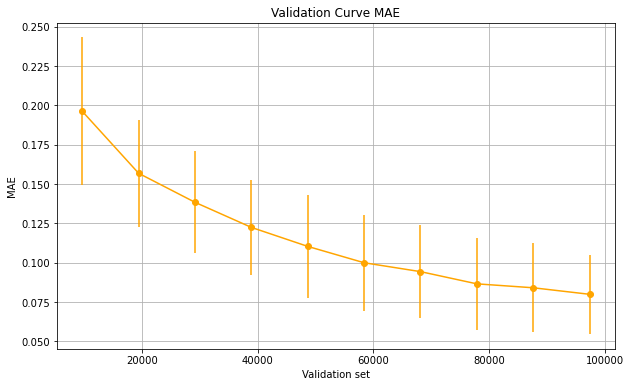

 
Errores con  100  columnas: 
MSE scores mean:
 [0.13009212 0.08341797 0.06706651 0.05898656 0.05196875 0.04600821
 0.04159119 0.03684888 0.03566879 0.03378647]
MSE scores std:
 [0.05119807 0.03758725 0.03968929 0.02955786 0.02765608 0.02693996
 0.02823802 0.02328826 0.02144095 0.02017867]


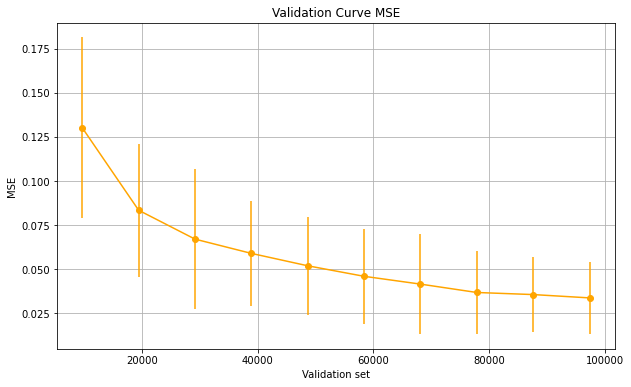

MAE scores mean:
 [0.19168202 0.14856153 0.12166984 0.11437422 0.10270959 0.09308518
 0.08457852 0.07761057 0.07623046 0.07252396]
MAE scores mean:
 [0.04389993 0.03505917 0.03486155 0.03076026 0.03037508 0.0316827
 0.03061359 0.0278931  0.02566151 0.02386857]


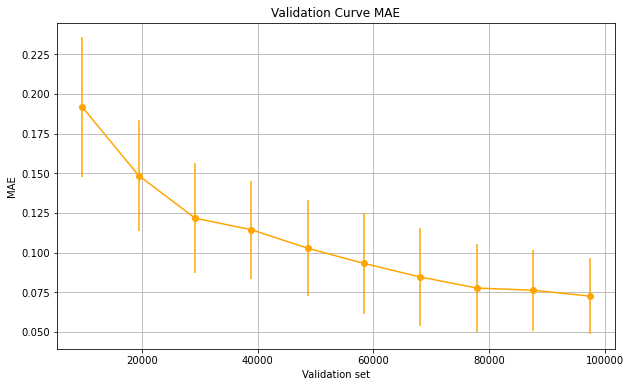

 
Errores con  50  columnas: 
MSE scores mean:
 [0.10173034 0.05570538 0.04137588 0.03514262 0.02954165 0.02683443
 0.02463755 0.02271033 0.02426286 0.02255568]
MSE scores std:
 [0.05589928 0.03801107 0.03042233 0.02626747 0.02297349 0.02119031
 0.02212828 0.02009458 0.02104815 0.01959173]


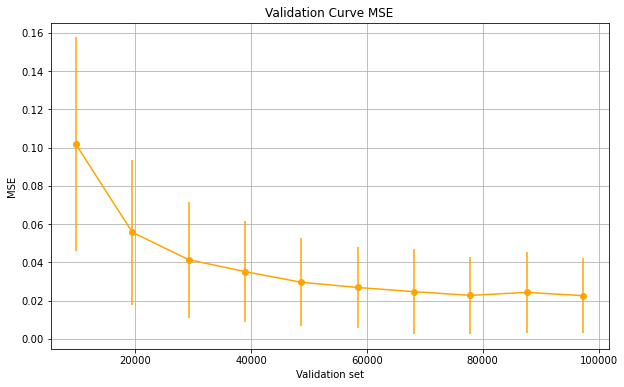

MAE scores mean:
 [0.15239538 0.10760793 0.08406231 0.07402429 0.0635612  0.05892844
 0.05362643 0.04968034 0.04887319 0.0478557 ]
MAE scores mean:
 [0.04399118 0.03540584 0.02805635 0.02728115 0.02510331 0.02547449
 0.02340257 0.02232332 0.02144402 0.02233581]


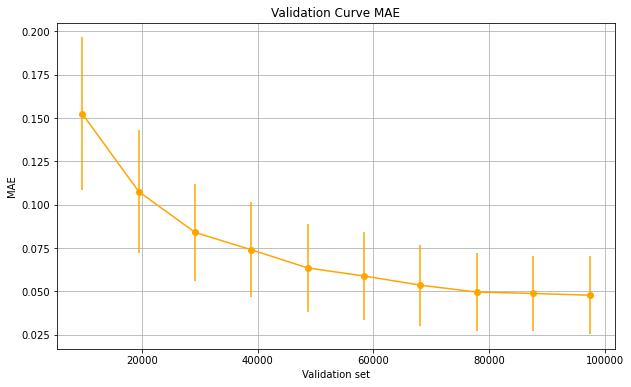

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', DecisionTreeRegressor(random_state=0))
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 10)  # 10 tamaños de entrenamiento diferentes


for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X, y, train_sizes=train_sizes, cv=10, scoring='neg_mean_squared_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MSE scores mean:\n", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MSE scores std:\n", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation set")
    plt.ylabel("MSE")
    plt.title("Validation Curve MSE")
    plt.grid()
    plt.show()


    # Calcula las curvas de aprendizaje mae
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X, y, train_sizes=train_sizes, cv=10, scoring='neg_mean_absolute_error')

    # Calcula la media y la desviación estándar de los puntajes de validación mae
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MAE scores mean:\n", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MAE scores mean:\n", validation_scores_std)


    # Plotea las curvas de aprendizaje de mae
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation set")
    plt.ylabel("MAE")
    plt.title("Validation Curve MAE")
    plt.grid()
    plt.show()

    print(" ")

**Con el modelo DecisionTreeRegresor y validacion cruzada de 5 y 10-fold, se usa diferente hiperparametrización, para ver como mejora el modelo con oprimizaciones del error cuadratico medio (mse) y error absoluto medio (mae)**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#validacion cruzada, decision tree regressor
def valcruzada_dtr(criterio, md, msl, mss, mf, rs, ncol, fold, sc, err_type):
  #target
  y = iter_00csv20.ind_analfabeta

  train_sizes = np.linspace(0.1, 1.0, fold)  # 10 tamaños de entrenamiento diferentes

  X = iter_00csv20[cols[:ncol]]

  print("Errores con ", ncol, " columnas: ")

  my_pipeline_mse = Pipeline(steps=[('preprocessor', SimpleImputer()),
                            ('model', DecisionTreeRegressor(criterion=criterio,max_depth=md, min_samples_leaf=msl, min_samples_split=mss, max_features=mf, random_state=rs))
                            ])

  # Calcula las curvas de aprendizaje mse
  train_sizes, _, validation_scores = learning_curve(
      my_pipeline_mse, X, y, train_sizes=train_sizes, cv=fold, scoring=sc)

  # Calcula la media y la desviación estándar de los puntajes de validación
  validation_scores_mean = -np.mean(validation_scores, axis=1)
  print("fold: ", fold)
  print(err_type, " scores mean: ", validation_scores_mean)
  print(err_type, " scores media de medias: ", np.mean(validation_scores_mean))
  validation_scores_std = np.std(validation_scores, axis=1)
  print(err_type, " scores std: ", validation_scores_std)
  print(err_type, " scores media de stds: ", np.mean(validation_scores_std))
  print("Hiperparametros:")
  print("criterion=", criterio, ", max_depth=",md, ", min_samples_leaf=",msl, ", min_samples_split=",mss, ", max_features",mf)

  # Plotea las curvas de aprendizaje de mse
  plt.figure(figsize=(10, 6))
  plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
  plt.xlabel("Validation set")
  plt.ylabel(err_type)
  plt.title("Validation Curve "+ err_type)
  plt.grid()
  plt.show()

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.22511499 0.20842501 0.20402245 0.20255212 0.2023833 ]
MSE  scores media de medias:  0.2084995741455243
MSE  scores std:  [0.06611202 0.04436987 0.04209052 0.04405847 0.04398519]
MSE  scores media de stds:  0.04812321223704823
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


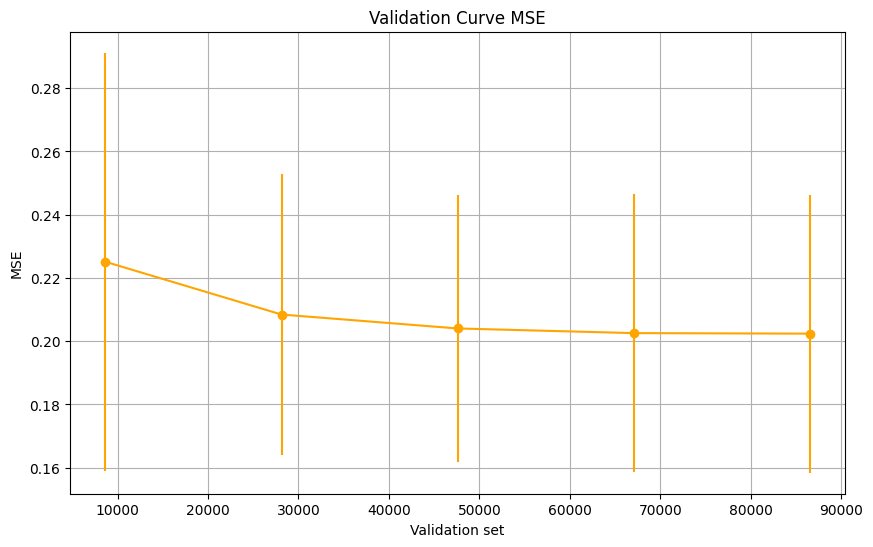

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=5
#max_features=None (todas)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_squared_error', err_type='MSE')

Errores con  50  columnas: 
MSE  scores mean:
 [0.22917789 0.22117758 0.2093721  0.21108878 0.20541132 0.20719323
 0.20377655 0.20384623 0.20510709 0.20376957]
MSE  scores media de medias:
 0.2099920335552726
MSE  scores std:
 [0.08999761 0.0679327  0.0589123  0.06157816 0.05784983 0.06679092
 0.05991381 0.05931057 0.06174375 0.05735947]
MSE  scores media de stds:
 0.06413891147367766
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


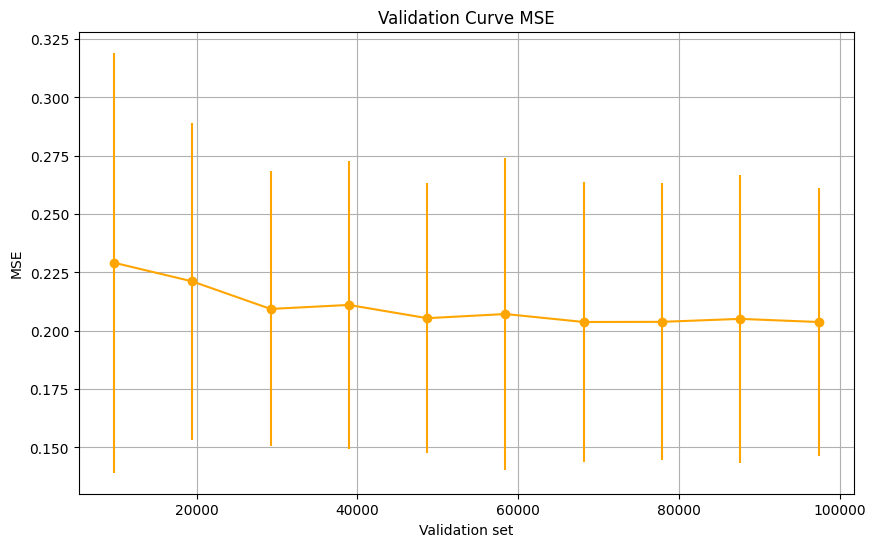

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=10
#max_features=None (todas)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_squared_error', err_type='MSE')

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.14737586 0.10025652 0.09283725 0.08735606 0.08481753]
MSE  scores media de medias:  0.10252864284984817
MSE  scores std:  [0.04485099 0.03488027 0.02791999 0.0280437  0.02564392]
MSE  scores media de stds:  0.0322677741925363
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


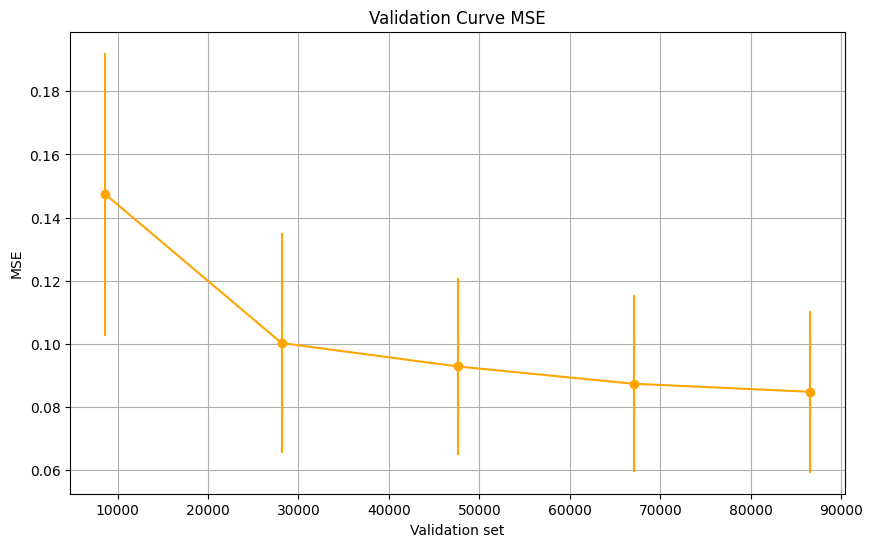

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=5
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50,fold=5,sc='neg_mean_squared_error', err_type='MSE')

Errores con  50  columnas: 
MSE  scores mean:
 [0.14152114 0.11320838 0.09903677 0.09454543 0.09010524 0.08607739
 0.08519792 0.08325817 0.08267203 0.08555503]
MSE  scores media de medias:
 0.0961177486195189
MSE  scores std:
 [0.05407646 0.04028001 0.03834328 0.0336999  0.03208644 0.03344223
 0.03263629 0.03176378 0.02800325 0.03138685]
MSE  scores media de stds:
 0.03557184809648116
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


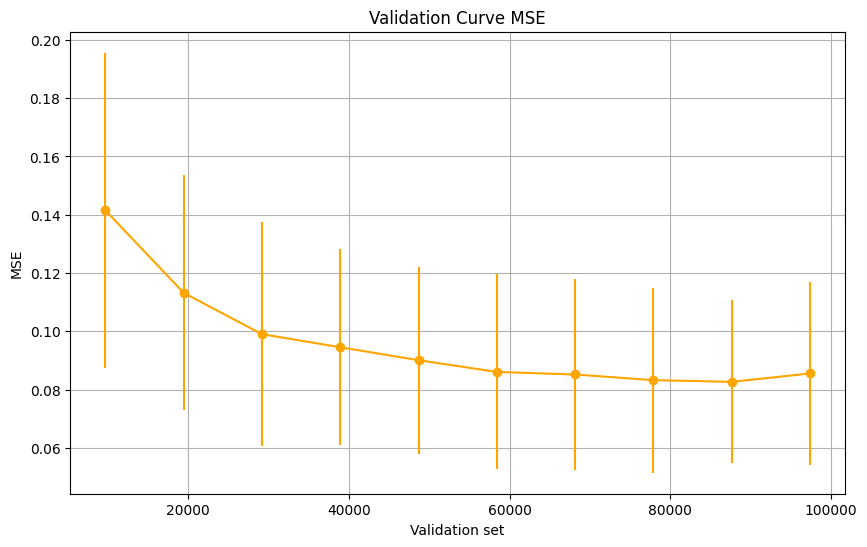

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=10
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50,fold=10,sc='neg_mean_squared_error', err_type='MSE')

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.230393   0.20956437 0.2047147  0.20159476 0.20229348]
MSE  scores media de medias:  0.20971205990070652
MSE  scores std:  [0.05631703 0.04258674 0.04279925 0.04269976 0.04310317]
MSE  scores media de stds:  0.04550118792390171
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


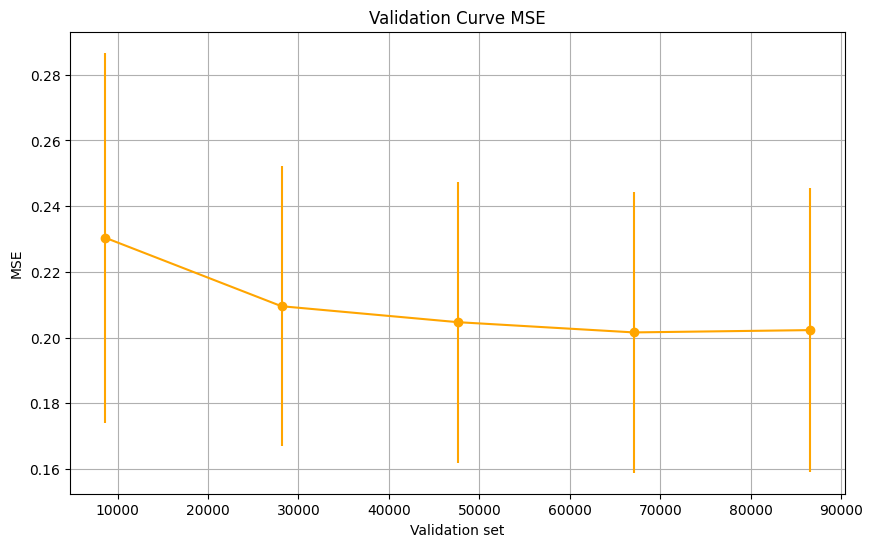

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#fold=5
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE')

Errores con  100  columnas: 
MSE  scores mean:
 [0.21858303 0.21779306 0.2082066  0.20675608 0.20605778 0.20458463
 0.2049076  0.20613764 0.20590329 0.20512891]
MSE  scores media de medias:
 0.2084058626925644
MSE  scores std:
 [0.07548863 0.06095666 0.05486094 0.0581857  0.06050019 0.06368183
 0.06270929 0.0628016  0.06393004 0.06494925]
MSE  scores media de stds:
 0.06280641265809715
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


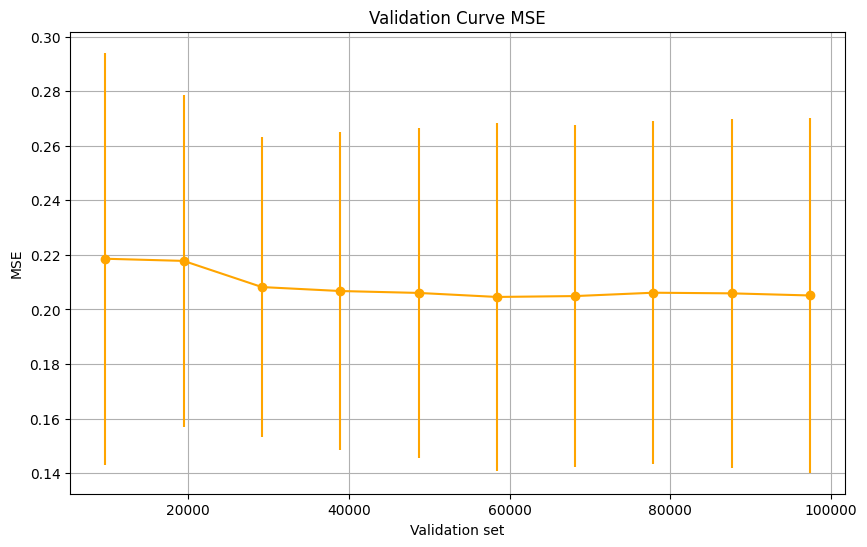

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#fold=10
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE')

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.15847924 0.10589619 0.09643307 0.09110013 0.0884479 ]
MSE  scores media de medias:  0.1080713065288846
MSE  scores std:  [0.04109702 0.03392704 0.0308991  0.03074219 0.03023115]
MSE  scores media de stds:  0.033379297033680325
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


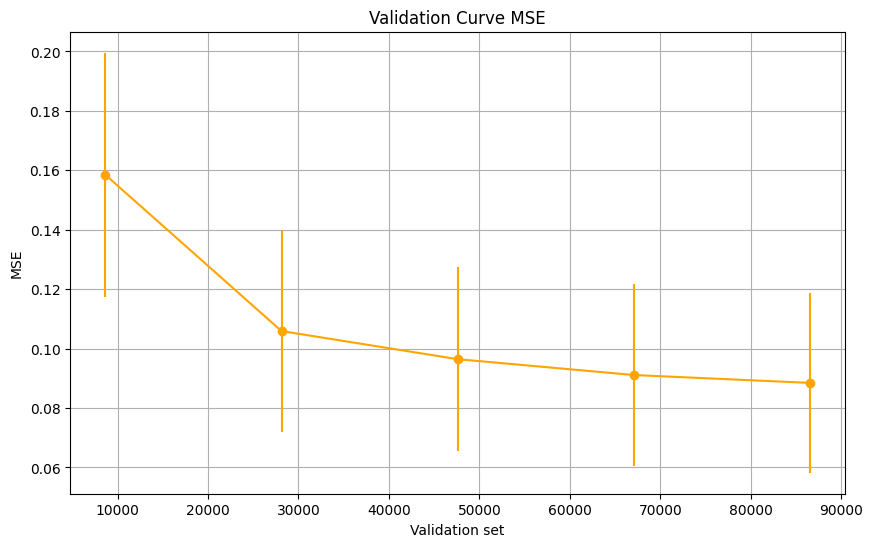

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=5
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE')

Errores con  100  columnas: 
MSE  scores mean:
 [0.13703819 0.1162036  0.09920597 0.09625469 0.09249512 0.0880256
 0.08594323 0.08459942 0.08489694 0.08431785]
MSE  scores media de medias:
 0.09689806109456081
MSE  scores std:
 [0.04460213 0.03566447 0.03141133 0.02910942 0.02946771 0.03145619
 0.03102806 0.03000791 0.03030948 0.03039694]
MSE  scores media de stds:
 0.03234536426964032
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


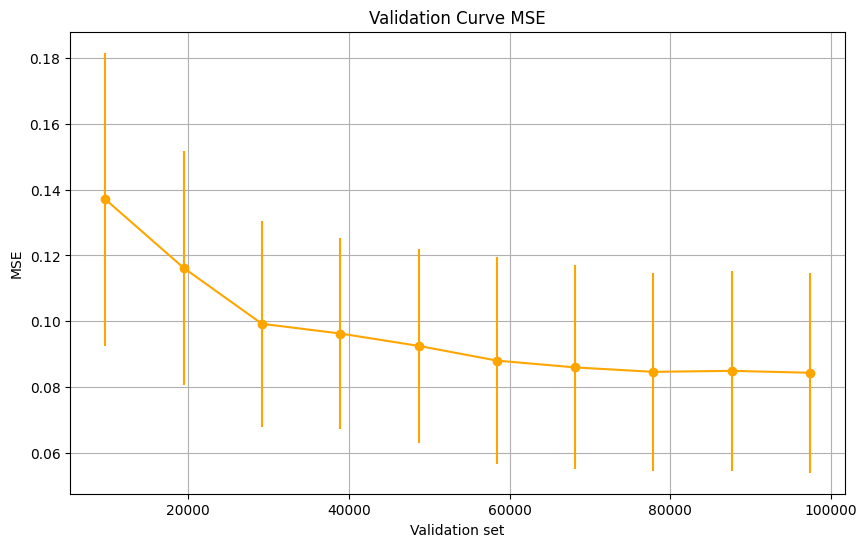

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=10
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE')

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.23179993 0.20890808 0.20516293 0.20209692 0.20253133]
MSE  scores media de medias:  0.21009983833876036
MSE  scores std:  [0.05358413 0.04178338 0.04266458 0.04211512 0.04266069]
MSE  scores media de stds:  0.044561579470043015
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


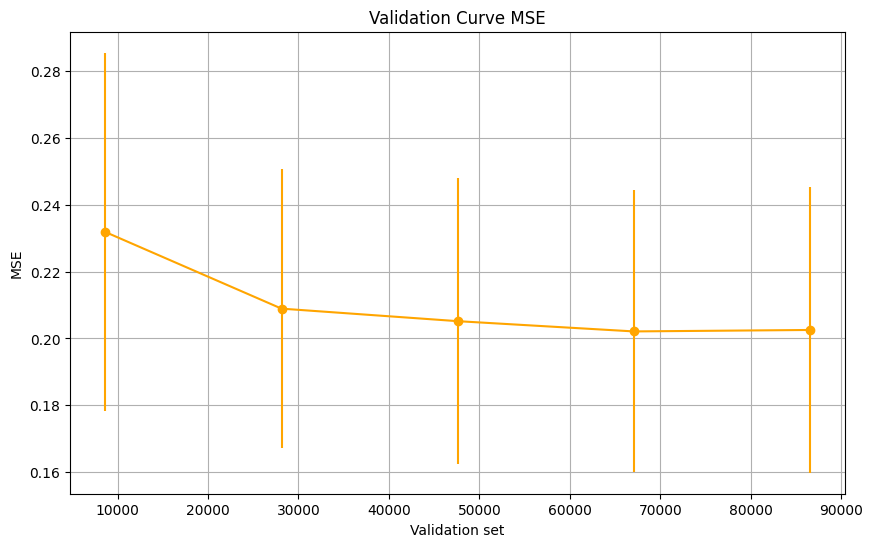

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#fold=5
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE')

Errores con  150  columnas: 
MSE  scores mean:
 [0.21869377 0.21820998 0.20838251 0.20680278 0.20575035 0.20547289
 0.20538714 0.20657479 0.20630537 0.20550144]
MSE  scores media de medias:
 0.20870810170755666
MSE  scores std:
 [0.07519097 0.06132712 0.05460512 0.05838455 0.06045132 0.06337528
 0.06238174 0.0624402  0.06367304 0.06476077]
MSE  scores media de stds:
 0.06265901120796338
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


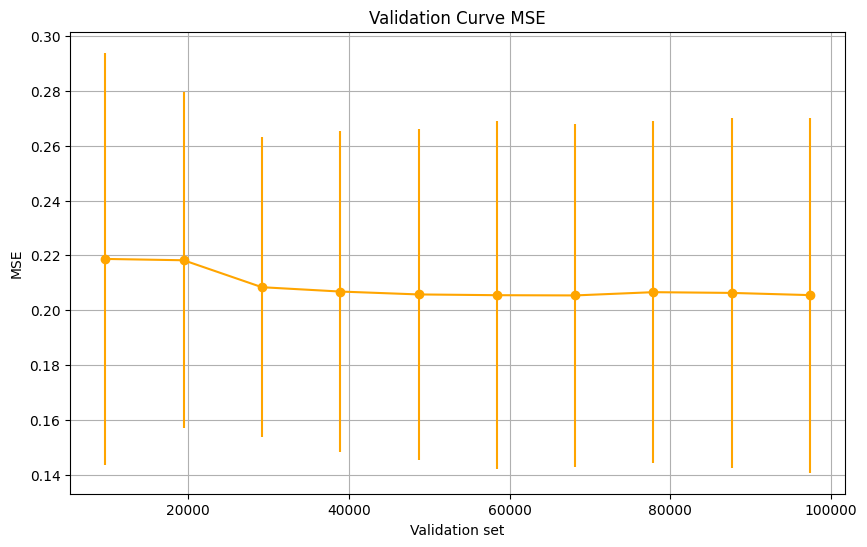

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#fold=10
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE')

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.15166696 0.10694761 0.09702585 0.09214839 0.0896498 ]
MSE  scores media de medias:  0.10748772219174577
MSE  scores std:  [0.04168459 0.03369759 0.03143784 0.03102179 0.03044616]
MSE  scores media de stds:  0.03365759335597328
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


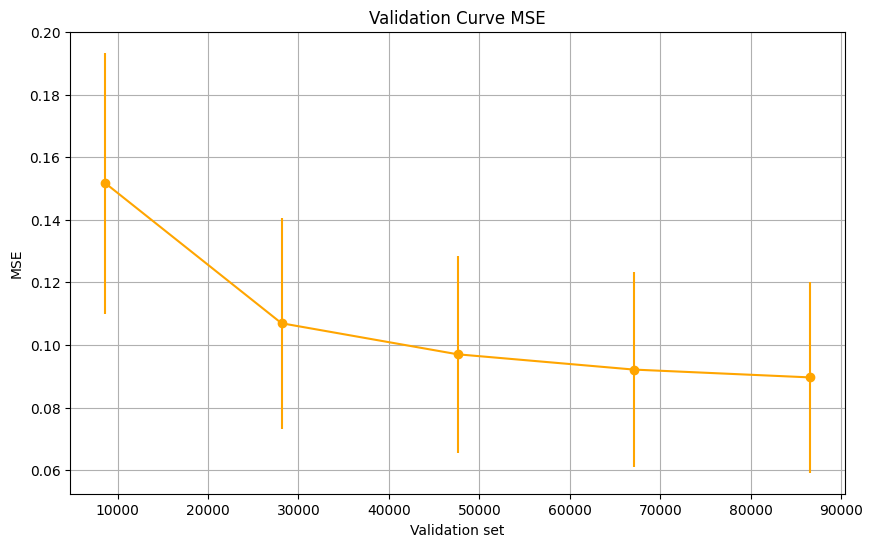

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=5
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE')

Errores con  150  columnas: 
MSE  scores mean:
 [0.13799349 0.11514899 0.103154   0.09771958 0.093005   0.088885
 0.08733674 0.08562376 0.08621879 0.0850395 ]
MSE  scores media de medias:
 0.09801248704550504
MSE  scores std:
 [0.04513515 0.03471031 0.03056561 0.02906772 0.02997258 0.03118893
 0.02945542 0.02945603 0.03014123 0.02971064]
MSE  scores media de stds:
 0.03194036168659723
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


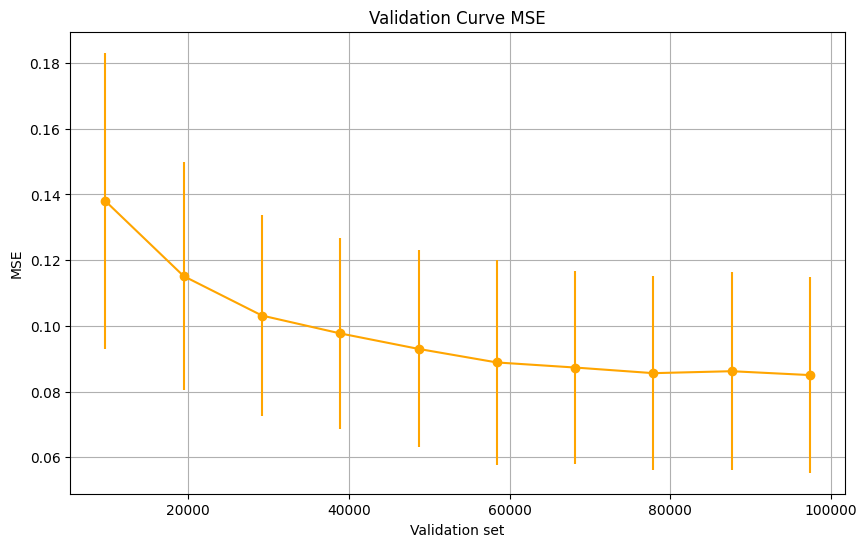

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#fold=10
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE')

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.31819929 0.31290981 0.30880792 0.30571393 0.30495167]
MAE  scores media de medias:  0.3101165247091993
MAE  scores std:  [0.03937141 0.02507123 0.02325056 0.02592971 0.02698435]
MAE  scores media de stds:  0.028121451921513024
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


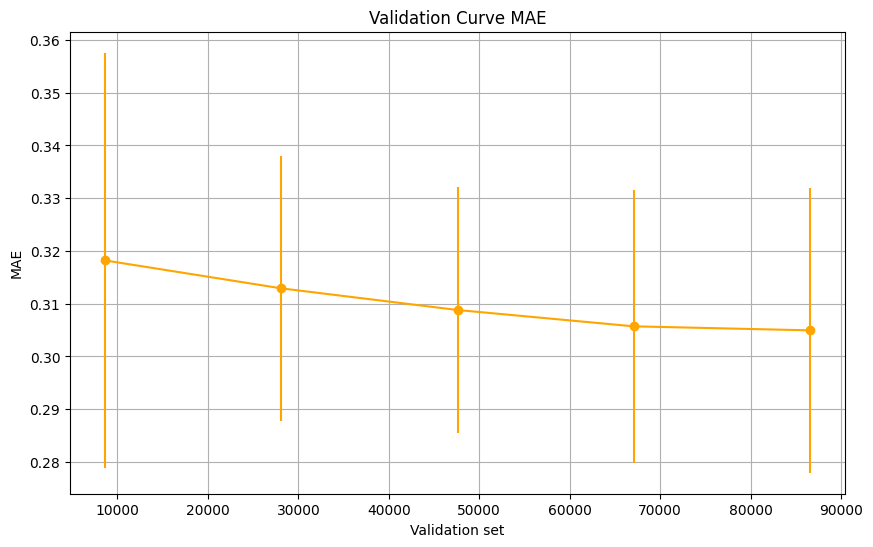

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.31372449 0.32452487 0.31595122 0.3131973  0.30782158 0.30757088
 0.30548407 0.30538422 0.30566034 0.30494442]
MAE  scores media de medias:  0.31042634038833794
MAE  scores std:  [0.05404162 0.04358759 0.04344336 0.04435255 0.04409874 0.04794818
 0.04537033 0.04519522 0.04673977 0.04498126]
MAE  scores media de stds:  0.04597586177734396
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


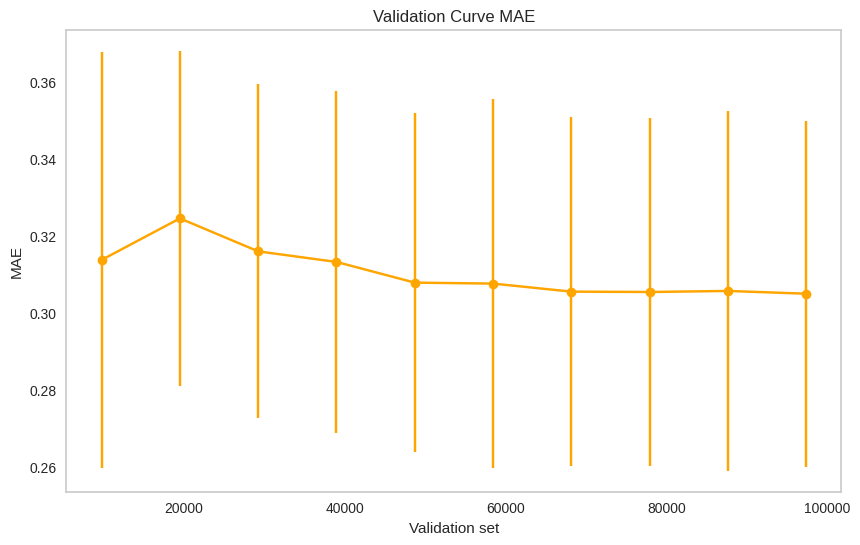

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.24059875 0.1931861  0.18664341 0.17883875 0.17538112]
MAE  scores media de medias:  0.19492962792402388
MAE  scores std:  [0.0274303  0.02222561 0.01955326 0.01836782 0.01842821]
MAE  scores media de stds:  0.021201040415363397
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


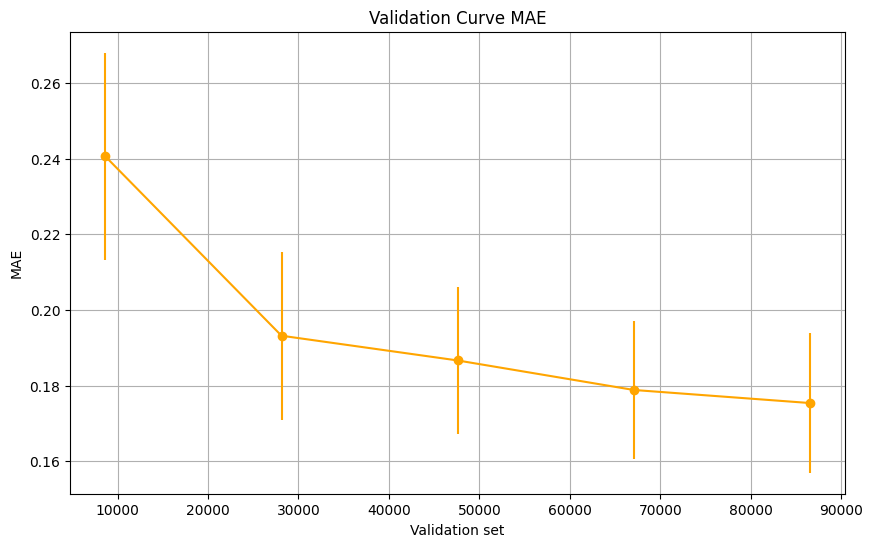

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.23010571 0.20891767 0.19578016 0.18901158 0.18256451 0.17898443
 0.17751218 0.17460989 0.17460181 0.17623246]
MAE  scores media de medias:  0.18883203986392588
MAE  scores std:  [0.04341284 0.0350523  0.03560155 0.03318353 0.03278784 0.03471222
 0.03342298 0.03306244 0.02978204 0.03178466]
MAE  scores media de stds:  0.03428024158897844
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


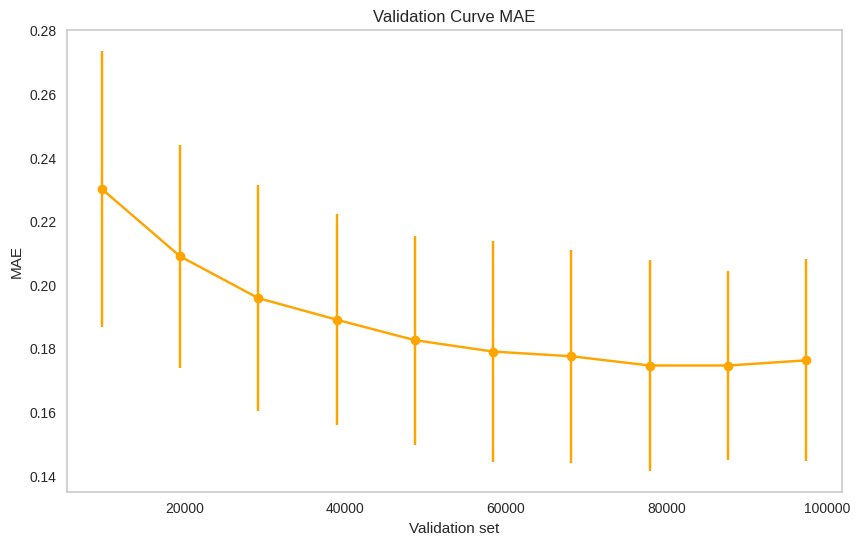

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.32029718 0.31271113 0.30826703 0.30503115 0.30383701]
MAE  scores media de medias:  0.31002870102878743
MAE  scores std:  [0.0355713  0.0235896  0.02475701 0.02559663 0.02695094]
MAE  scores media de stds:  0.027293095322345223
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


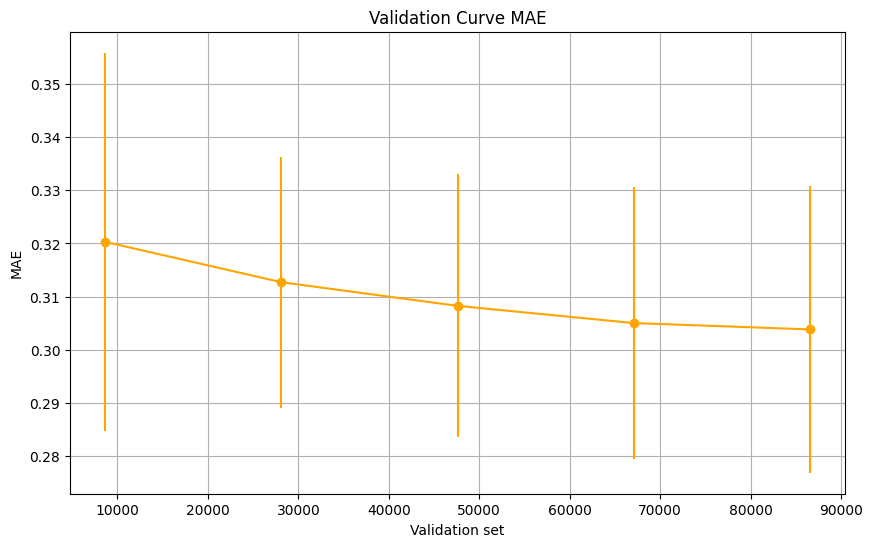

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.31090185 0.32051856 0.31660655 0.30979524 0.30748583 0.30566653
 0.30545025 0.30589966 0.30502948 0.30457994]
MAE  scores media de medias:  0.30919338944767877
MAE  scores std:  [0.05108613 0.04275446 0.04284482 0.04324287 0.04474933 0.0472303
 0.0465878  0.04688419 0.04772655 0.04768773]
MAE  scores media de stds:  0.046079416711505325
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


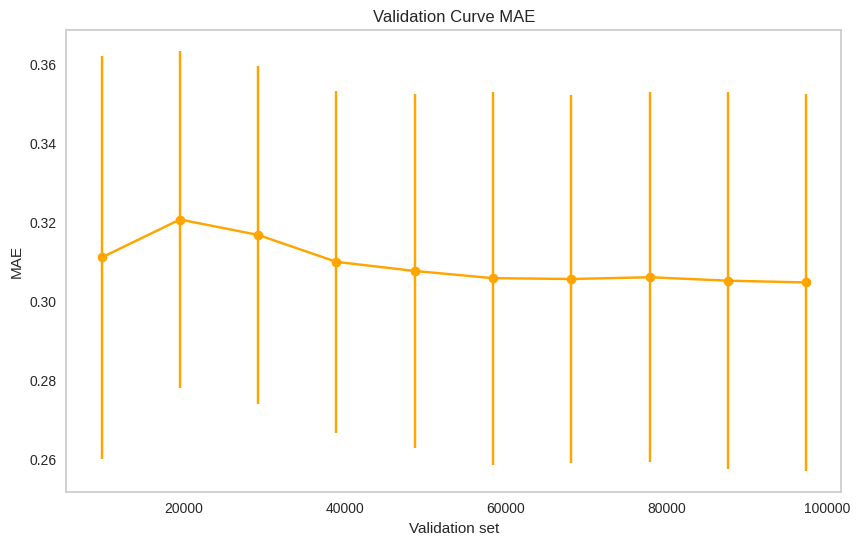

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.24739785 0.19721555 0.19032381 0.18323124 0.17979952]
MAE  scores media de medias:  0.19959359685949182
MAE  scores std:  [0.02671757 0.02228874 0.02012962 0.02198335 0.02179599]
MAE  scores media de stds:  0.02258305354944915
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


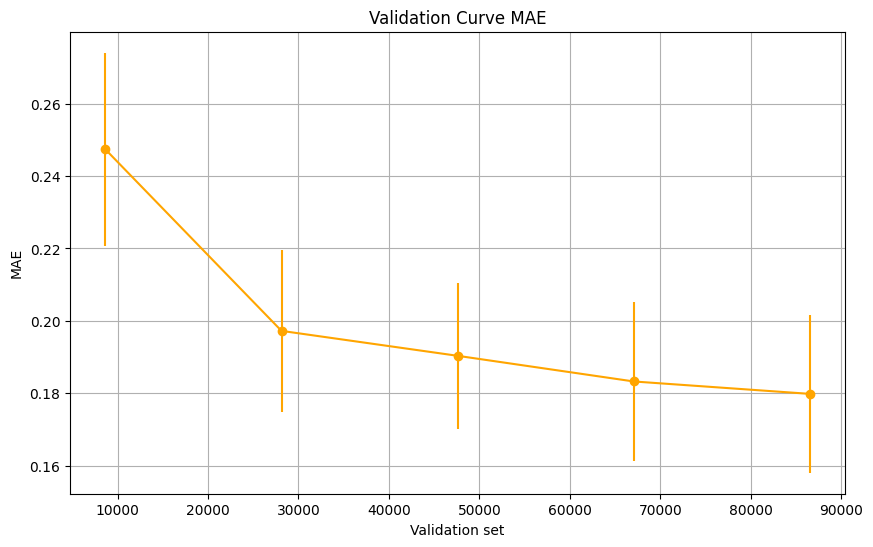

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.22804194 0.20838453 0.19627893 0.19407313 0.18737811 0.18323285
 0.18025006 0.17691906 0.17799698 0.17644356]
MAE  scores media de medias:  0.19089991638973827
MAE  scores std:  [0.04132508 0.03322938 0.03315847 0.02866412 0.02987934 0.03232209
 0.03355932 0.03041765 0.03036344 0.02994368]
MAE  scores media de stds:  0.032286257694072326
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


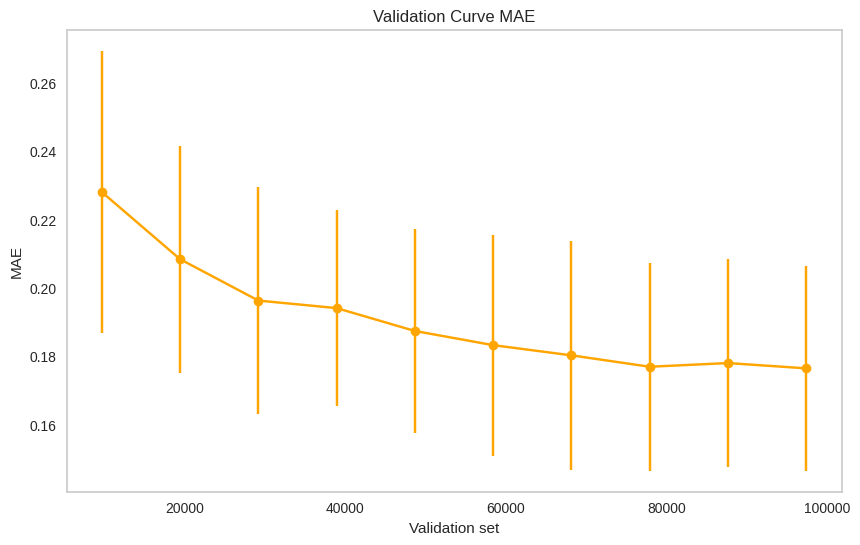

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.31990535 0.31179631 0.30939231 0.30566031 0.30445607]
MAE  scores media de medias:  0.310242068549185
MAE  scores std:  [0.03470911 0.0234712  0.02481634 0.02476653 0.02630245]
MAE  scores media de stds:  0.02681312563931031
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


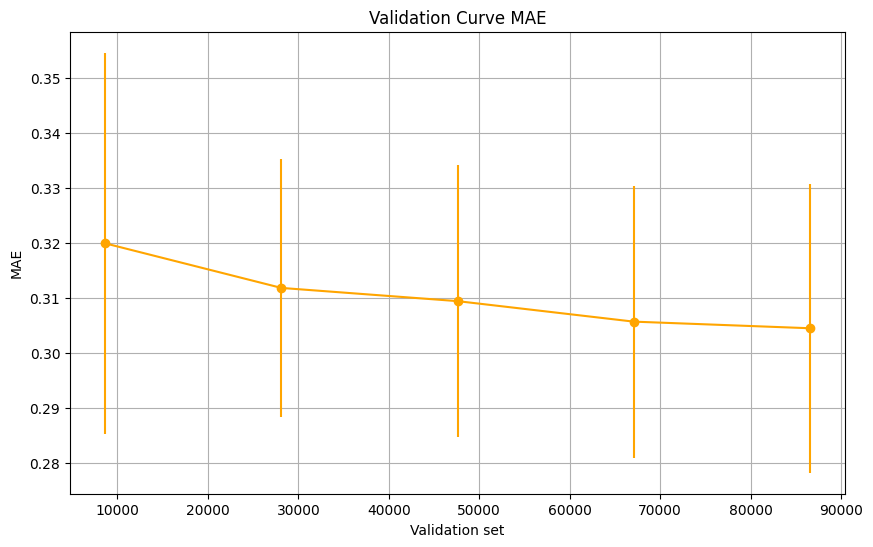

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.31060748 0.32077665 0.31653099 0.30995807 0.30746672 0.30670522
 0.30577465 0.30621225 0.30540432 0.30496675]
MAE  scores media de medias:  0.30944031024147833
MAE  scores std:  [0.05077486 0.04339461 0.04314004 0.04357411 0.04460309 0.04705861
 0.04656706 0.04653561 0.04741536 0.04753341]
MAE  scores media de stds:  0.04605967570835042
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


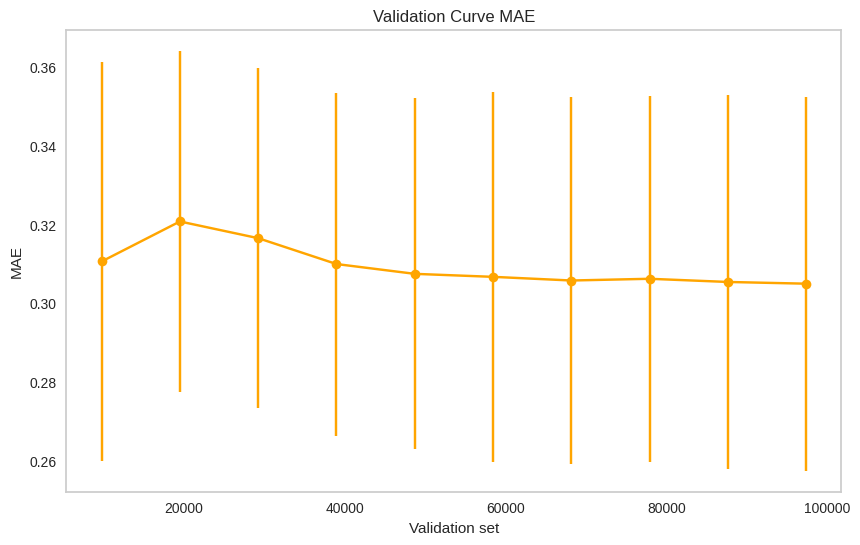

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.2380485  0.19837616 0.19088285 0.18412089 0.18016505]
MAE  scores media de medias:  0.19831868798736002
MAE  scores std:  [0.02949479 0.02216978 0.02028564 0.02137121 0.02010747]
MAE  scores media de stds:  0.022685777509247586
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


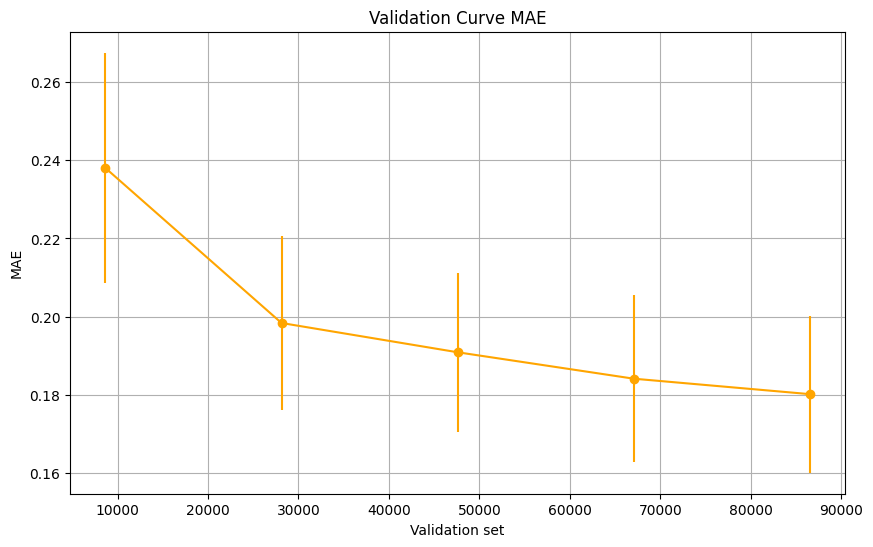

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=5
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE')

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.22901961 0.20665755 0.20093181 0.19584948 0.18778488 0.18402334
 0.18239912 0.17865848 0.17982283 0.17736109]
MAE  scores media de medias:  0.1922508192053142
MAE  scores std:  [0.04078479 0.032337   0.03221883 0.02836003 0.03072767 0.03263316
 0.0313978  0.02954546 0.03030177 0.02887973]
MAE  scores media de stds:  0.03171862308005093
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


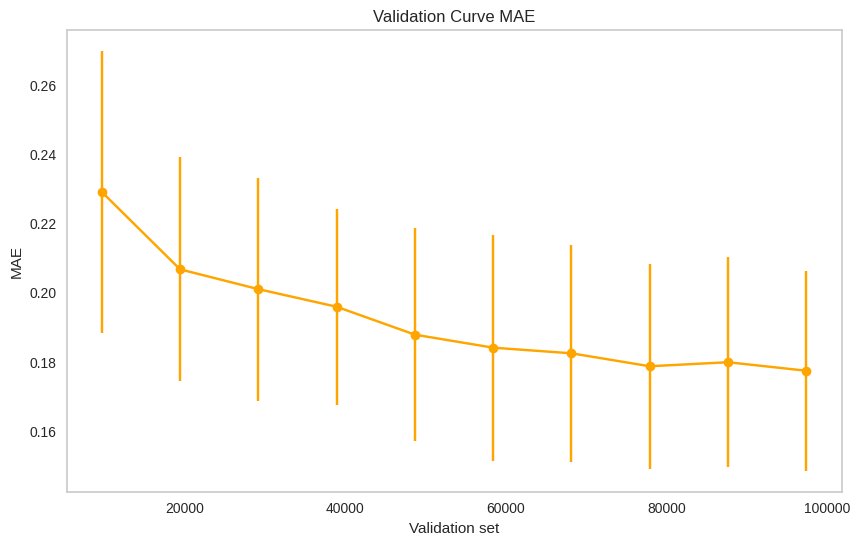

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error (por default para dtr, es decir, mide la calidad de las divisiones del arbol)
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#fold=10
#max_features=None (todas)
#scoring=mae (para todo el modelo)
valcruzada_dtr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE')

**Prueba del modelo RandomForestRegressor con 250,200,150,100,50 variables predictoras, resultado del análisis mutual information**

Variables predictoras 250: 
Mean Squared Error (MSE) para 250 predictoras:  0.01966595408647521
Mean Absolute Error (MSE) para 250 predictoras:  0.06010976640731366


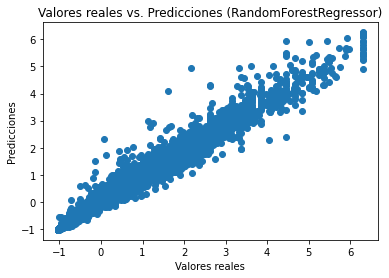

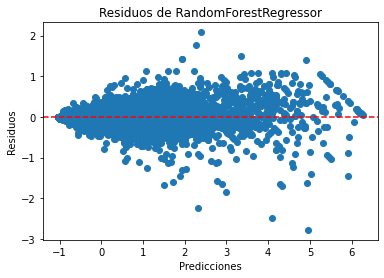

Variables predictoras 200: 
Mean Squared Error (MSE) para 200 predictoras:  0.01527592532443058
Mean Absolute Error (MSE) para 200 predictoras:  0.050397051114917706


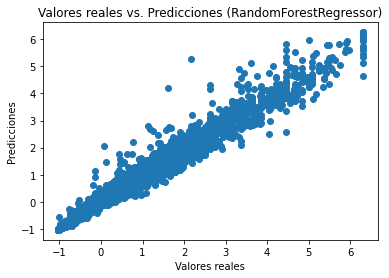

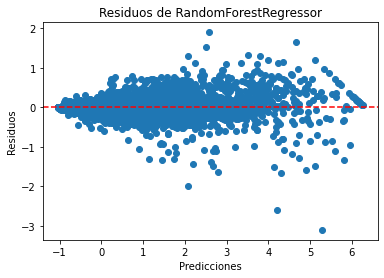

Variables predictoras 150: 
Mean Squared Error (MSE) para 150 predictoras:  0.0144260541724925
Mean Absolute Error (MSE) para 150 predictoras:  0.04818017421099774


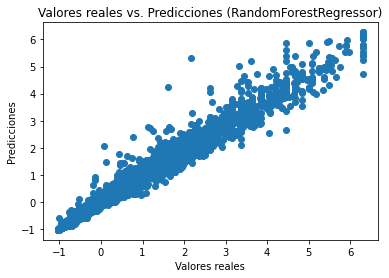

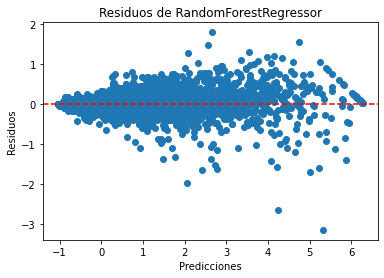

Variables predictoras 100: 
Mean Squared Error (MSE) para 100 predictoras:  0.013081811993633369
Mean Absolute Error (MSE) para 100 predictoras:  0.04483892142027853


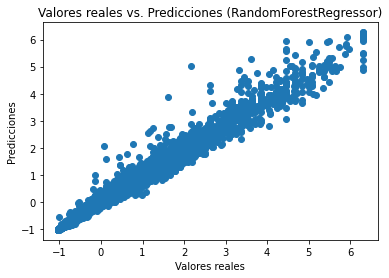

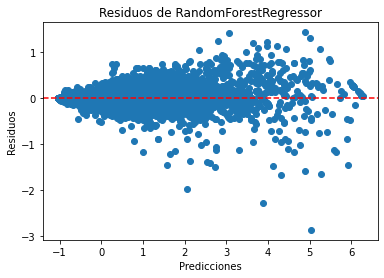

Variables predictoras 50: 
Mean Squared Error (MSE) para 50 predictoras:  0.00865691374777908
Mean Absolute Error (MSE) para 50 predictoras:  0.02858514269049349


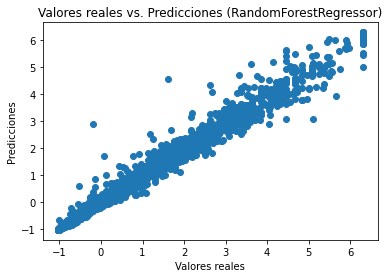

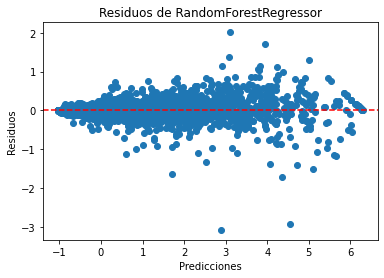

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#target
y = iter_00csv20.ind_analfabeta

for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    #dividir los datos en entrenamiento y validacion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define model. Specify a number for random_state to ensure same results each run
    forest_model = RandomForestRegressor(random_state=1)

    # Fit model (entrenamiento)
    forest_model.fit(X_train, y_train)

    # Paso 4: Realizar predicciones en el conjunto de prueba
    y_pred = forest_model.predict(X_test)

    #mae
    mae = mean_absolute_error(y_test, y_pred)
    #mse
    mse = mean_squared_error(y_test, y_pred)

    print(f"Variables predictoras {ncol}: ")
    #print(cols[:ncol])
    print(f"Mean Squared Error (MSE) para {ncol} predictoras: ", mse)
    print(f"Mean Absolute Error (MSE) para {ncol} predictoras: ", mae)

    # Graficar valores reales vs. predicciones
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Valores reales vs. Predicciones (RandomForestRegressor)")
    plt.show()

    # Calcular los residuos (diferencias entre los valores reales y las predicciones)
    residuos = y_test - y_pred

    # Graficar los residuos
    plt.scatter(y_pred, residuos)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuos de RandomForestRegressor")
    plt.show()

**Se usa el modelo RandomForestRegresor con validacion cruzada de 5 y 10-fold, sin hiperparametrización, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse) y error absoluto medio (mae); se usa una muestra aleatorio solo con 5000 registros para las optimizaciones**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#validacion cruzada, decision tree regressor
def valcruzada_rfr_sp(criterio, mf, rs, ncol, fold, sc, err_type, recs):
  #target
  train_sizes = np.linspace(0.1, 1.0, fold)  # 10 tamaños de entrenamiento diferentes

  #X = iter_00csv20[cols[:ncol]]
  subsample = iter_00csv20.sample(n=recs, random_state=42)
  X = subsample[cols[:ncol]]
  y = subsample['ind_analfabeta']
  # Asegurarse de que el índice de 'y' coincida con el de 'X'
  y = y.reset_index(drop=True)

  print("Errores con ", ncol, " columnas: ")

  my_pipeline_mse = Pipeline(steps=[('preprocessor', SimpleImputer()),
                            ('model', RandomForestRegressor(criterion=criterio, max_features=mf, random_state=rs))
                            ])

  # Calcula las curvas de aprendizaje mse
  train_sizes, _, validation_scores = learning_curve(
      my_pipeline_mse, X, y, train_sizes=train_sizes, cv=fold, scoring=sc)

  # Calcula la media y la desviación estándar de los puntajes de validación
  validation_scores_mean = -np.mean(validation_scores, axis=1)
  print("fold: ", fold)
  print(err_type, " scores mean: ", validation_scores_mean)
  print(err_type, " scores media de medias: ", np.mean(validation_scores_mean))
  validation_scores_std = np.std(validation_scores, axis=1)
  print(err_type, " scores std: ", validation_scores_std)
  print(err_type, " scores media de stds: ", np.mean(validation_scores_std))
  print("Hiperparametros:")
  print("criterion=", criterio, ", max_features",mf)

  # Plotea las curvas de aprendizaje de mse
  plt.figure(figsize=(10, 6))
  plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
  plt.xlabel("Validation set")
  plt.ylabel(err_type)
  plt.title("Validation Curve "+ err_type)
  plt.grid()
  plt.show()
  print(" ")

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.18615208 0.12377099 0.09964308 0.07484713 0.06575653]
MSE  scores media de medias:  0.11003396358108675
MSE  scores std:  [0.03011601 0.01298089 0.01838625 0.01112465 0.0096803 ]
MSE  scores media de stds:  0.01645762016857319
Hiperparametros:
criterion= squared_error , max_features None


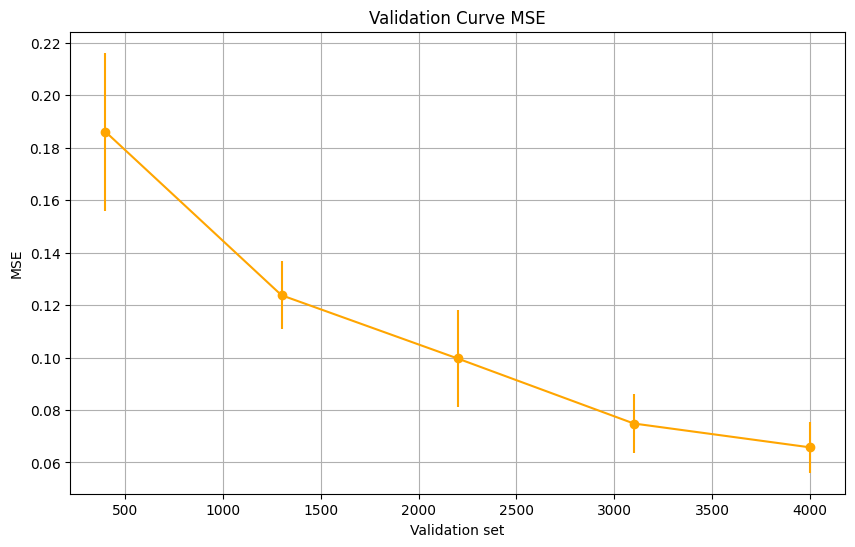

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 50 variables predictoras, fold=5, scoring=mse
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.17850048 0.13341032 0.12020061 0.10943224 0.10201051 0.08427179
 0.07558041 0.06517797 0.06329515 0.06133547]
MSE  scores media de medias:  0.09932149445417543
MSE  scores std:  [0.03450532 0.03031056 0.03271705 0.03033057 0.03247375 0.02164505
 0.01922155 0.01493423 0.01432529 0.01542387]
MSE  scores media de stds:  0.02458872343049277
Hiperparametros:
criterion= squared_error , max_features None


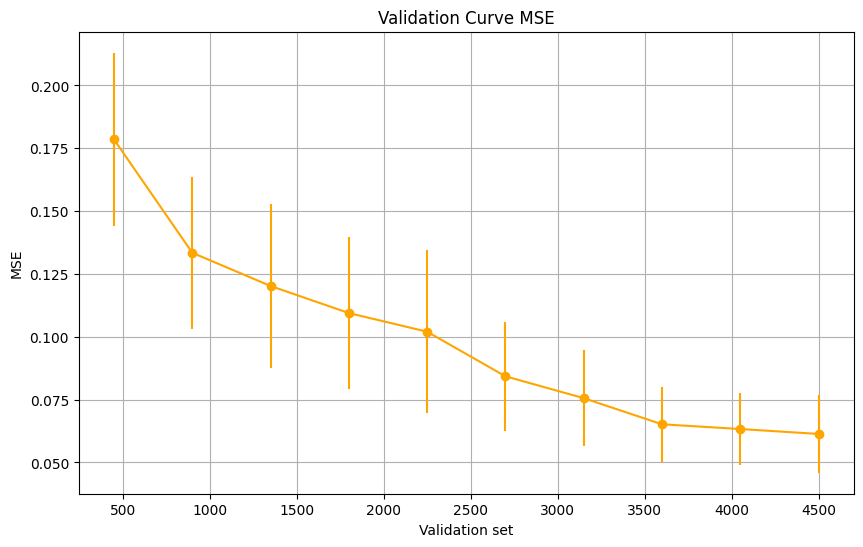

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 50 variables predictoras, fold=10, scoring=mse, fold=10
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.19647813 0.13611745 0.11404647 0.08737739 0.07815132]
MSE  scores media de medias:  0.12243415053922455
MSE  scores std:  [0.03048805 0.0165016  0.02343863 0.01703349 0.01399253]
MSE  scores media de stds:  0.02029085896082182
Hiperparametros:
criterion= squared_error , max_features None


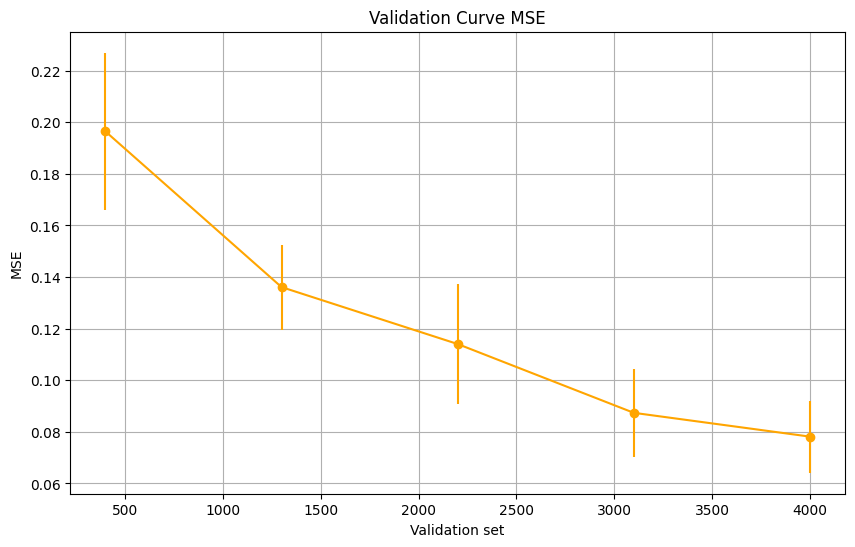

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 100 variables predictoras, fold=5
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.18910892 0.14276142 0.13532331 0.1240257  0.11500458 0.09888788
 0.08693921 0.07999512 0.07694003 0.07299299]
MSE  scores media de medias:  0.11219791851493659
MSE  scores std:  [0.03394146 0.0318103  0.03831333 0.03626267 0.03697585 0.02680629
 0.02352695 0.02156032 0.01912296 0.01887031]
MSE  scores media de stds:  0.0287190441331778
Hiperparametros:
criterion= squared_error , max_features None


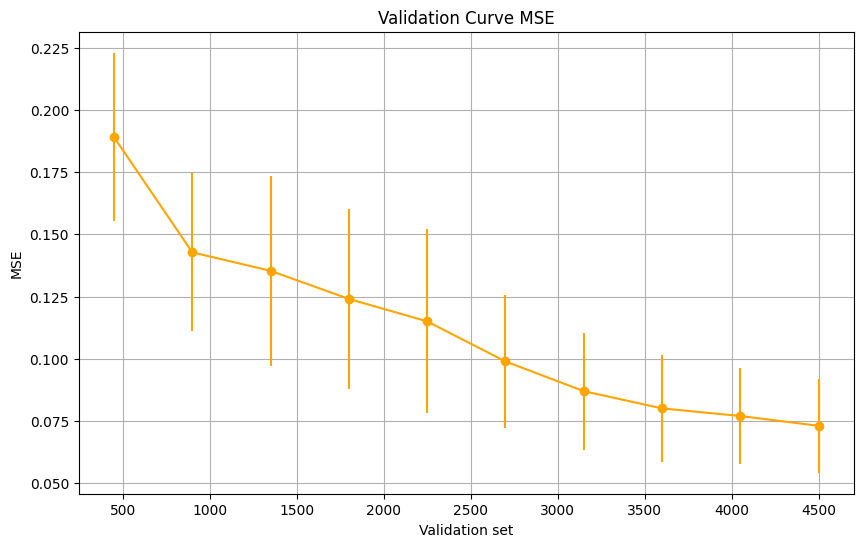

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 100 variables predictoras, fold=10
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.19577998 0.14044848 0.11770475 0.0912508  0.08092384]
MSE  scores media de medias:  0.12522156977447318
MSE  scores std:  [0.0323581  0.01581772 0.02487788 0.01792615 0.01390294]
MSE  scores media de stds:  0.020976556874924786
Hiperparametros:
criterion= squared_error , max_features None


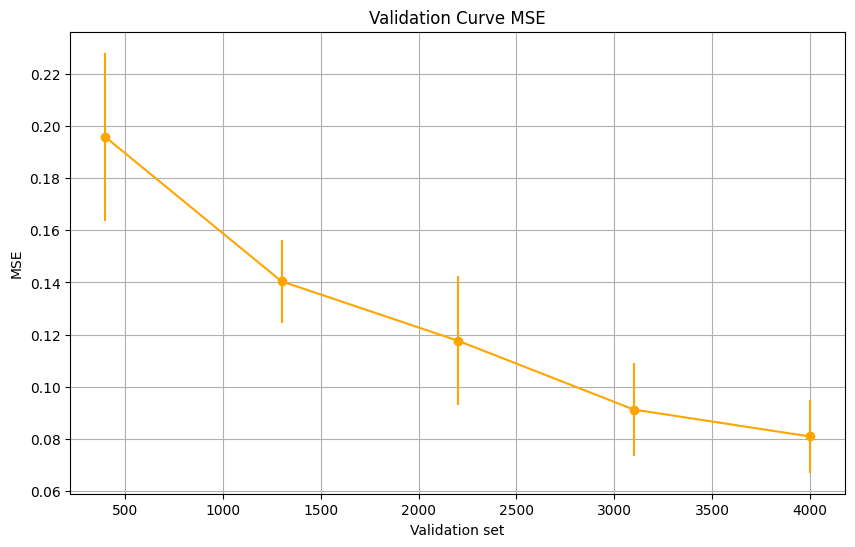

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 150 variables predictoras, fold=5
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.18610961 0.14926798 0.13847796 0.12725657 0.12129066 0.10271178
 0.08999715 0.08280669 0.07811042 0.07488957]
MSE  scores media de medias:  0.11509183894329159
MSE  scores std:  [0.03328313 0.03377045 0.04021487 0.03933671 0.03932973 0.02845116
 0.02564957 0.02055365 0.01843935 0.01951256]
MSE  scores media de stds:  0.029854119958016255
Hiperparametros:
criterion= squared_error , max_features None


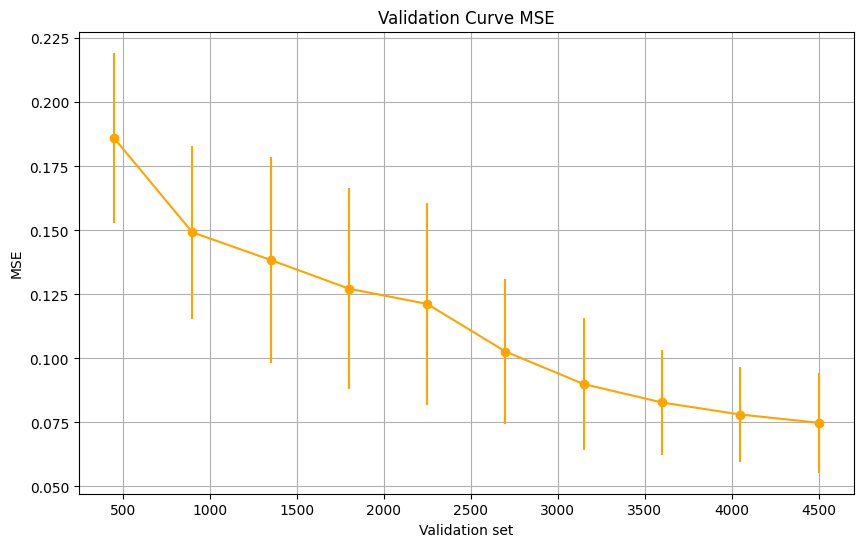

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 150 variables predictoras, fold=10
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.26037418 0.19361415 0.16679316 0.14677847 0.13404112]
MAE  scores media de medias:  0.18032021757406316
MAE  scores std:  [0.0149741  0.00822804 0.01083926 0.00963321 0.00746201]
MAE  scores media de stds:  0.010227324410500461
Hiperparametros:
criterion= squared_error , max_features None


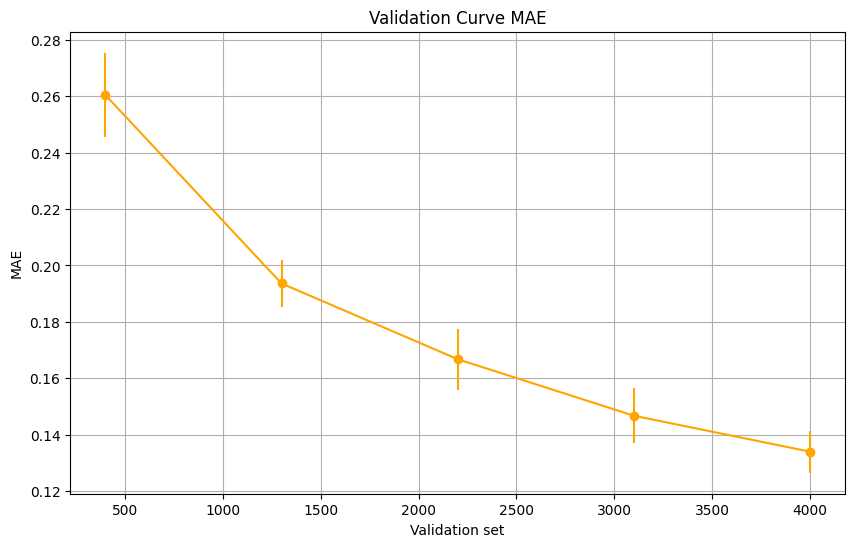

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 50 variables predictoras, fold=5, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.25501784 0.20899945 0.19029489 0.17799373 0.16743379 0.15504168
 0.14402079 0.1368822  0.13258369 0.12746932]
MAE  scores media de medias:  0.1695737380971259
MAE  scores std:  [0.01921249 0.01585006 0.01729451 0.01386408 0.01375783 0.01315643
 0.01207739 0.0113414  0.00999173 0.01070455]
MAE  scores media de stds:  0.013725046396587517
Hiperparametros:
criterion= squared_error , max_features None


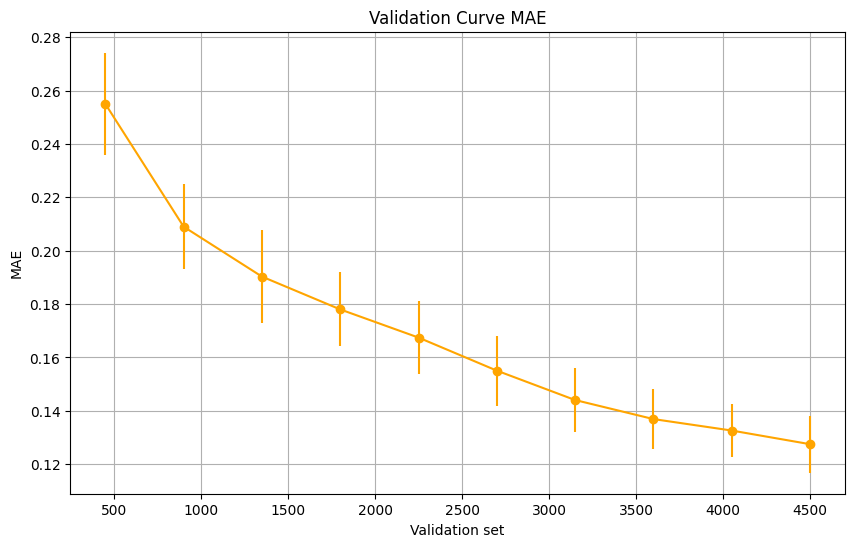

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 50 variables predictoras, fold=10, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.27007238 0.21051786 0.18554405 0.16584832 0.15273751]
MAE  scores media de medias:  0.1969440267771745
MAE  scores std:  [0.01401765 0.01081984 0.01383527 0.01203795 0.01170533]
MAE  scores media de stds:  0.012483211396471159
Hiperparametros:
criterion= squared_error , max_features None


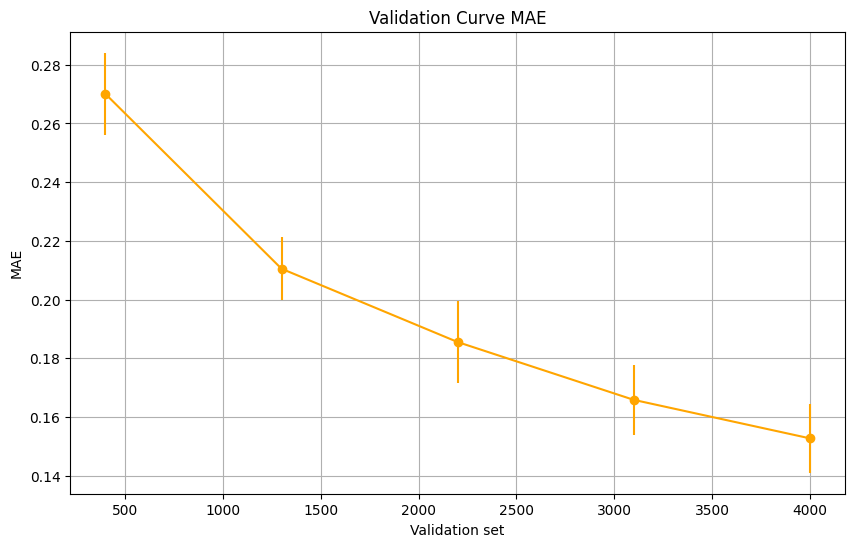

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 100 variables predictoras, fold=5, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.26674366 0.22208976 0.20741521 0.19617444 0.18526531 0.17552675
 0.16363912 0.15801839 0.15277262 0.14709779]
MAE  scores media de medias:  0.1874743074831406
MAE  scores std:  [0.01644926 0.01622515 0.01824603 0.01736427 0.01739591 0.01480099
 0.01472734 0.01498183 0.01374302 0.01379073]
MAE  scores media de stds:  0.015772452944228414
Hiperparametros:
criterion= squared_error , max_features None


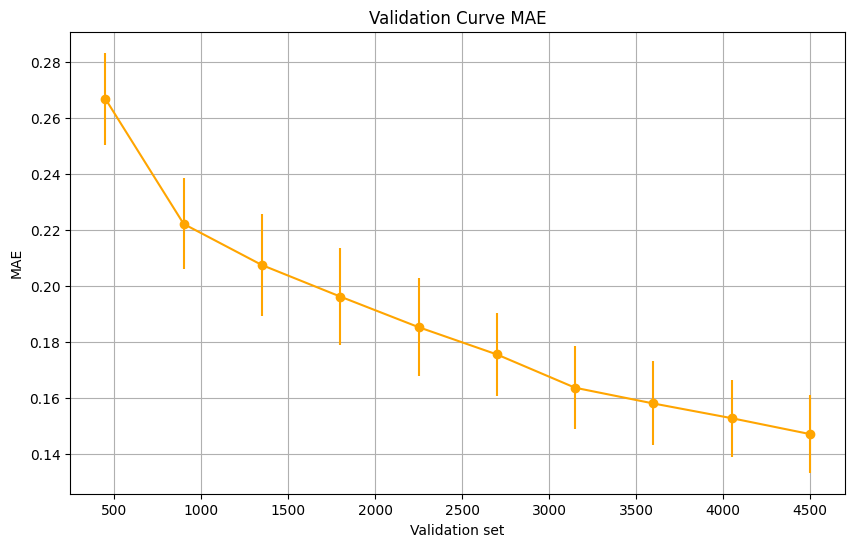

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 100 variables predictoras, fold=10, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.27334233 0.21435028 0.19060703 0.17178748 0.15795972]
MAE  scores media de medias:  0.20160936749456598
MAE  scores std:  [0.01444972 0.01004113 0.01396275 0.01209188 0.01140195]
MAE  scores media de stds:  0.012389485828274987
Hiperparametros:
criterion= squared_error , max_features None


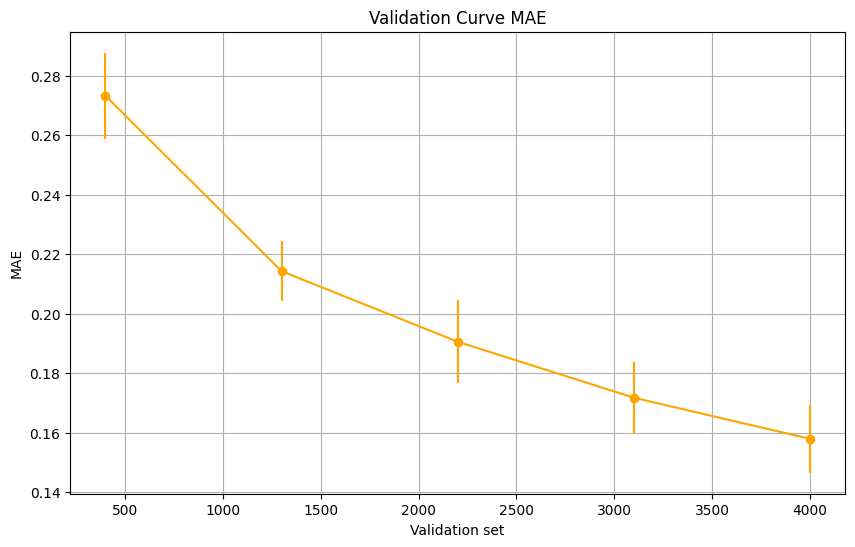

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 150 variables predictoras, fold=5, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.26686754 0.22769176 0.21102838 0.19932097 0.19068537 0.18026221
 0.16760632 0.16262162 0.15688133 0.15185229]
MAE  scores media de medias:  0.1914817784966315
MAE  scores std:  [0.01564277 0.016124   0.01824831 0.01826168 0.01825373 0.0152315
 0.01567069 0.01460137 0.01367026 0.0142697 ]
MAE  scores media de stds:  0.015997400865889622
Hiperparametros:
criterion= squared_error , max_features None


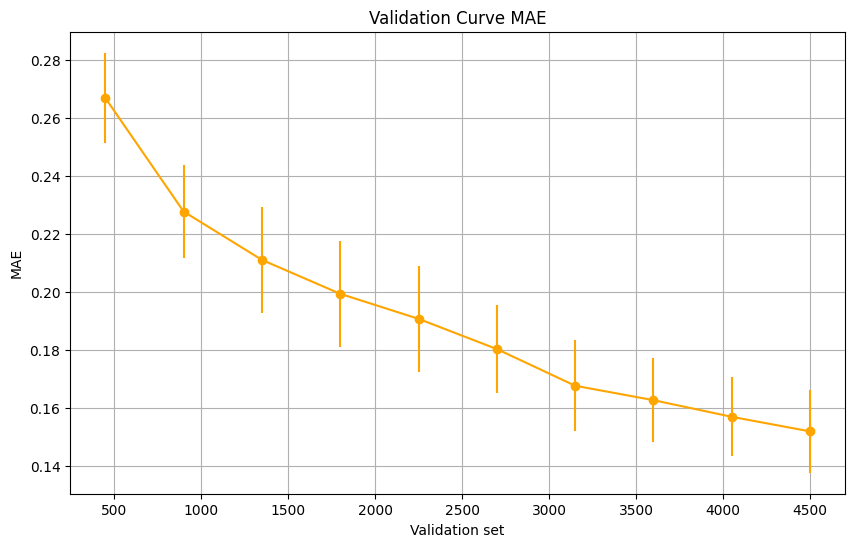

In [ ]:
#rfr sin parametros, validacion cruzada, 5000 registros, 150 variables predictoras, fold=10, scoring=mae
valcruzada_rfr_sp(criterio='squared_error', mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

**Se usa el modelo RandomForestRegresor con validacion cruzada de 5 y 10-fold, y con diferentes hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse) y error absoluto medio (mae); se usa una muestra aleatorio solo con 5000 registros para las optimizaciones**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#validacion cruzada, decision tree regressor
def valcruzada_rfr(criterio, md, msl, mss, mf, rs, ncol, fold, sc, err_type, recs):

  train_sizes = np.linspace(0.1, 1.0, fold)  # 10 tamaños de entrenamiento diferentes

  #X = iter_00csv20[cols[:ncol]]
  subsample = iter_00csv20.sample(n=recs, random_state=42)
  X = subsample[cols[:ncol]]
  y = subsample['ind_analfabeta']
  # Asegurarse de que el índice de 'y' coincida con el de 'X'
  y = y.reset_index(drop=True)


  print("Errores con ", ncol, " columnas: ")

  my_pipeline_mse = Pipeline(steps=[('preprocessor', SimpleImputer()),
                            ('model', RandomForestRegressor(criterion=criterio,max_depth=md, min_samples_leaf=msl, min_samples_split=mss, max_features=mf, random_state=rs))
                            ])

  # Calcula las curvas de aprendizaje mse
  train_sizes, _, validation_scores = learning_curve(
      my_pipeline_mse, X, y, train_sizes=train_sizes, cv=fold, scoring=sc)

  # Calcula la media y la desviación estándar de los puntajes de validación
  validation_scores_mean = -np.mean(validation_scores, axis=1)
  print("fold: ", fold)
  print(err_type, " scores mean: ", validation_scores_mean)
  print(err_type, " scores media de medias: ", np.mean(validation_scores_mean))
  validation_scores_std = np.std(validation_scores, axis=1)
  print(err_type, " scores std: ", validation_scores_std)
  print(err_type, " scores media de stds: ", np.mean(validation_scores_std))
  print("Hiperparametros:")
  print("criterion=", criterio, ", max_depth=",md, ", min_samples_leaf=",msl, ", min_samples_split=",mss, ", max_features",mf)

  # Plotea las curvas de aprendizaje de mse
  plt.figure(figsize=(10, 6))
  plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
  plt.xlabel("Validation set")
  plt.ylabel(err_type)
  plt.title("Validation Curve "+ err_type)
  plt.grid()
  plt.show()
  print(" ")

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.26007021 0.21978752 0.20817781 0.19061736 0.18250012]
MSE  scores media de medias:  0.2122306060371752
MSE  scores std:  [0.02885555 0.02072139 0.02838655 0.02114345 0.01761771]
MSE  scores media de stds:  0.023344930701633102
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


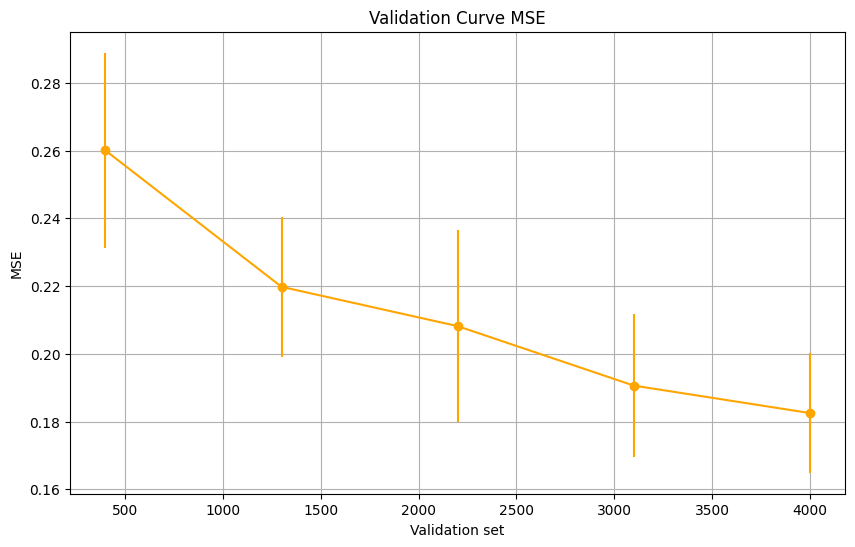

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.24412597 0.22358288 0.21989089 0.2201303  0.20964768 0.19416544
 0.19079512 0.18526344 0.18251772 0.18045691]
MSE  scores media de medias:  0.20505763529294913
MSE  scores std:  [0.03571226 0.04037775 0.03703937 0.04628548 0.04159539 0.03449677
 0.03620157 0.0287032  0.02607171 0.02673007]
MSE  scores media de stds:  0.03532135791301017
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


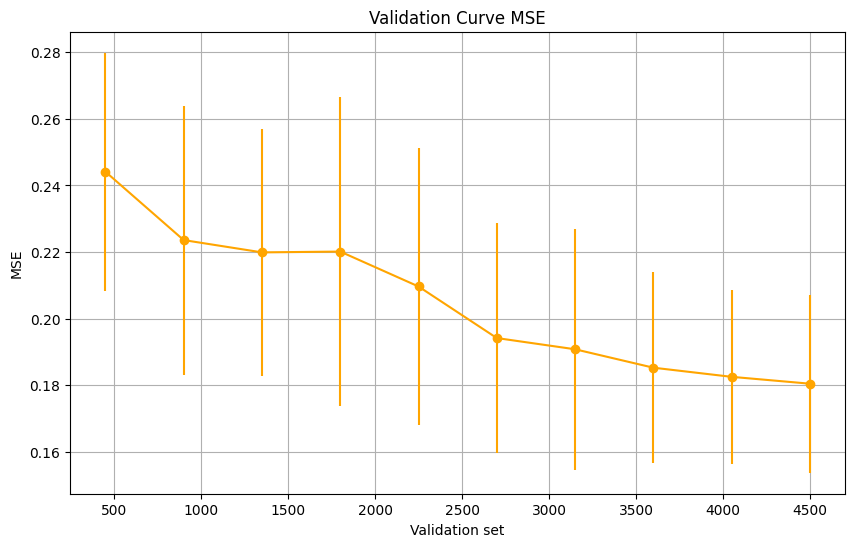

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.36122109 0.21533409 0.18218336 0.15743691 0.13819256]
MSE  scores media de medias:  0.21087360077153053
MSE  scores std:  [0.01557143 0.01717232 0.02805342 0.02396358 0.01379998]
MSE  scores media de stds:  0.019712147162504516
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


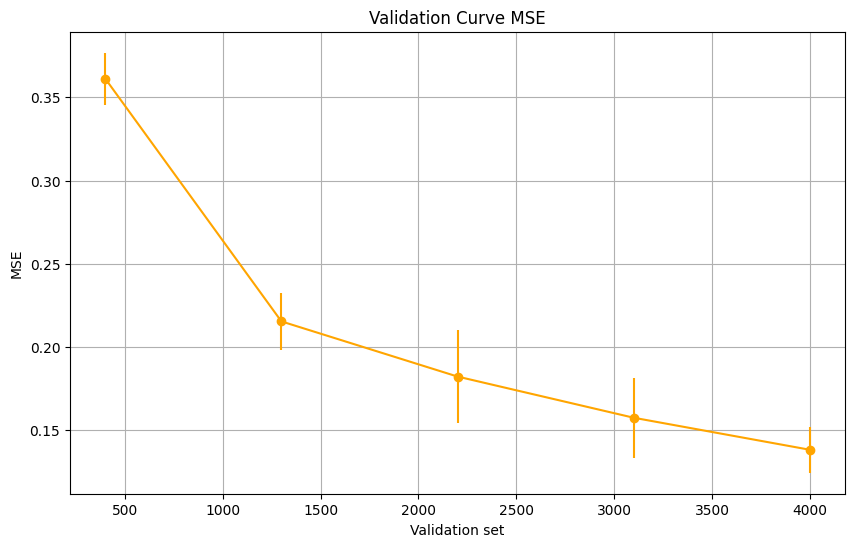

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.33826744 0.23950966 0.2160225  0.20223023 0.18610673 0.16714962
 0.153642   0.14339958 0.13327104 0.12918294]
MSE  scores media de medias:  0.19087817556400588
MSE  scores std:  [0.04412145 0.04346387 0.04806967 0.04512385 0.0431643  0.04368377
 0.04526571 0.03812806 0.03129849 0.03084585]
MSE  scores media de stds:  0.04131650220680662
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


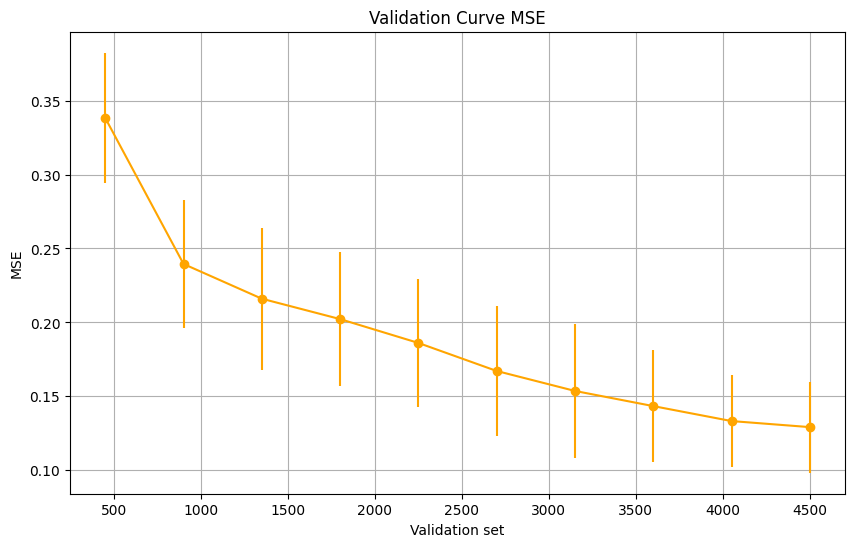

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.26180089 0.21616334 0.20581916 0.18686277 0.17826032]
MSE  scores media de medias:  0.20978129687803748
MSE  scores std:  [0.0259826  0.02060948 0.02906086 0.02244282 0.01851886]
MSE  scores media de stds:  0.023322924853252856
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


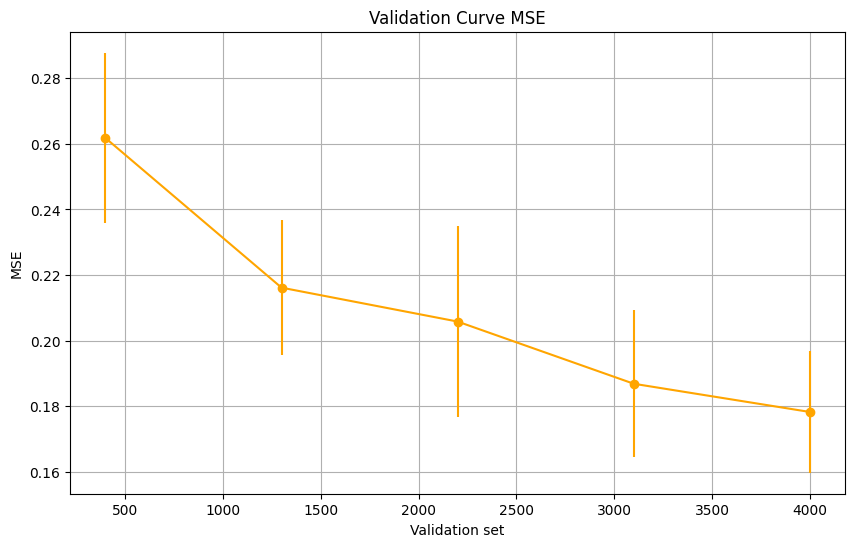

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.2449674  0.22083294 0.21767868 0.21807902 0.20839041 0.1922064
 0.18826587 0.18214878 0.17904723 0.17657324]
MSE  scores media de medias:  0.20281899678654525
MSE  scores std:  [0.03522737 0.04064036 0.03849999 0.04918203 0.04360255 0.0364822
 0.03782253 0.0303244  0.02660442 0.02749023]
MSE  scores media de stds:  0.03658760696007378
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


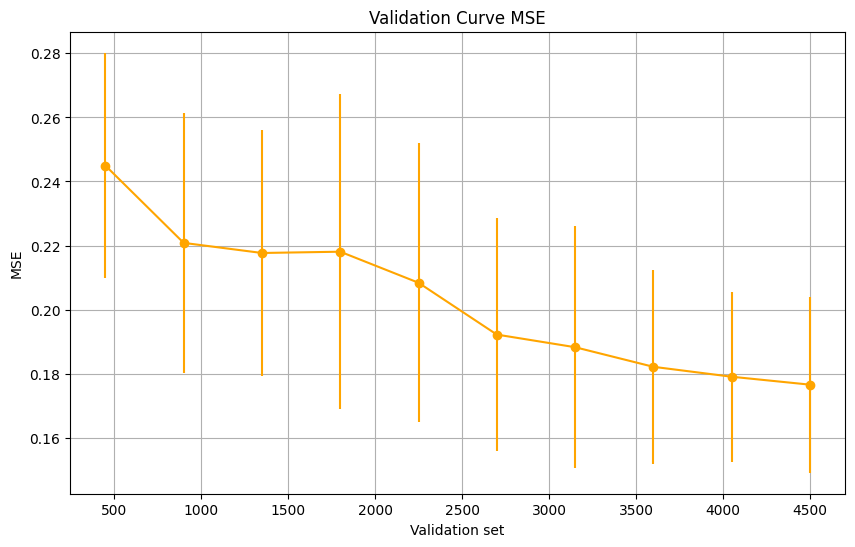

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.37133566 0.21264964 0.18051092 0.15403674 0.13601665]
MSE  scores media de medias:  0.21090992344939635
MSE  scores std:  [0.01956993 0.01806919 0.02986302 0.02649484 0.01546364]
MSE  scores media de stds:  0.021892124705276315
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


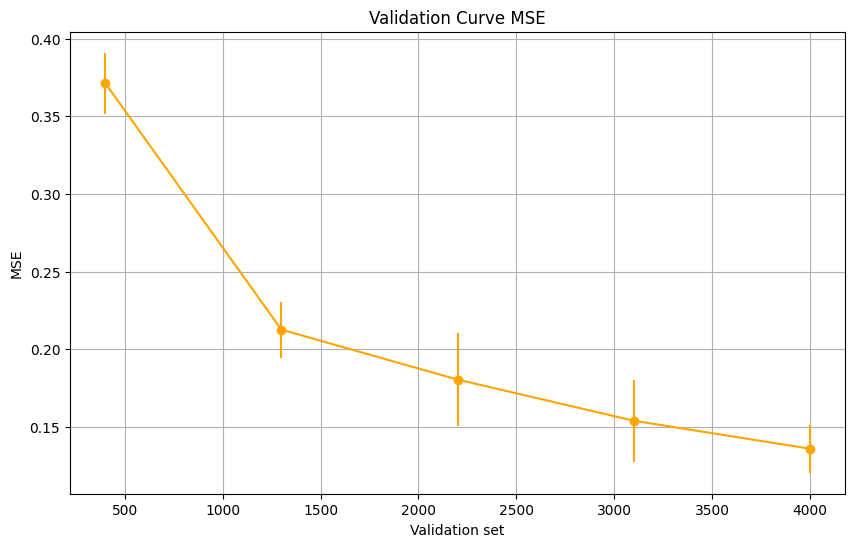

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.33341689 0.23395506 0.21380864 0.20099849 0.18551929 0.16611844
 0.15152888 0.1412976  0.13112556 0.12708798]
MSE  scores media de medias:  0.18848568382183908
MSE  scores std:  [0.04608067 0.0428772  0.0480748  0.04564623 0.04457482 0.0447342
 0.04721135 0.03975752 0.03264805 0.03229794]
MSE  scores media de stds:  0.04239027780333595
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


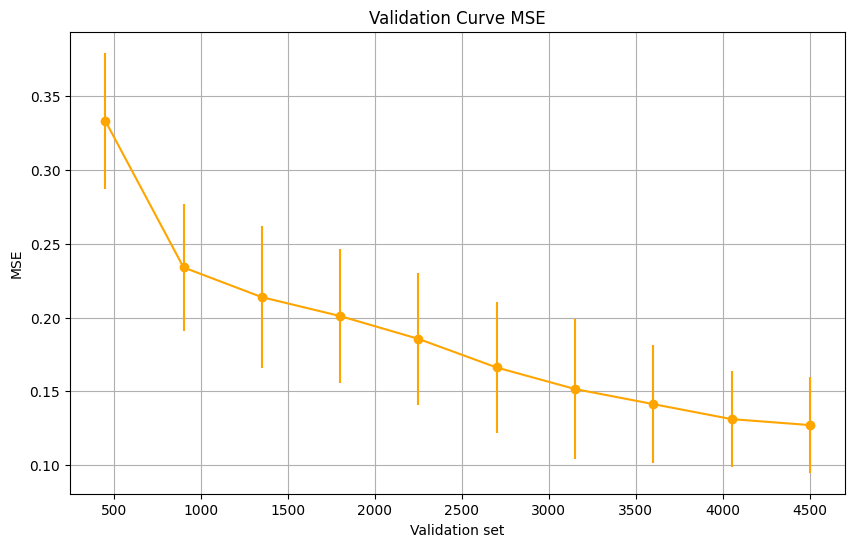

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.26071223 0.21580811 0.20551602 0.18604189 0.177305  ]
MSE  scores media de medias:  0.2090766482011424
MSE  scores std:  [0.02701838 0.02059226 0.02909701 0.02242522 0.01861038]
MSE  scores media de stds:  0.023548649330834098
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


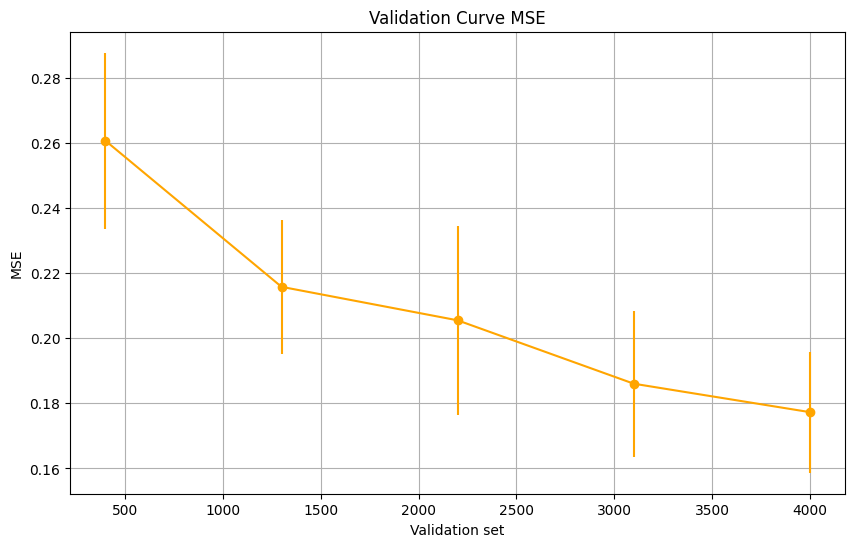

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.24281927 0.2193098  0.21707418 0.21738375 0.20731497 0.1914246
 0.1872577  0.18128823 0.17830415 0.17597177]
MSE  scores media de medias:  0.2018148418270913
MSE  scores std:  [0.03474934 0.04018159 0.03897222 0.04915877 0.04334607 0.03728234
 0.03779468 0.02970706 0.02635878 0.02720704]
MSE  scores media de stds:  0.03647579054729165
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


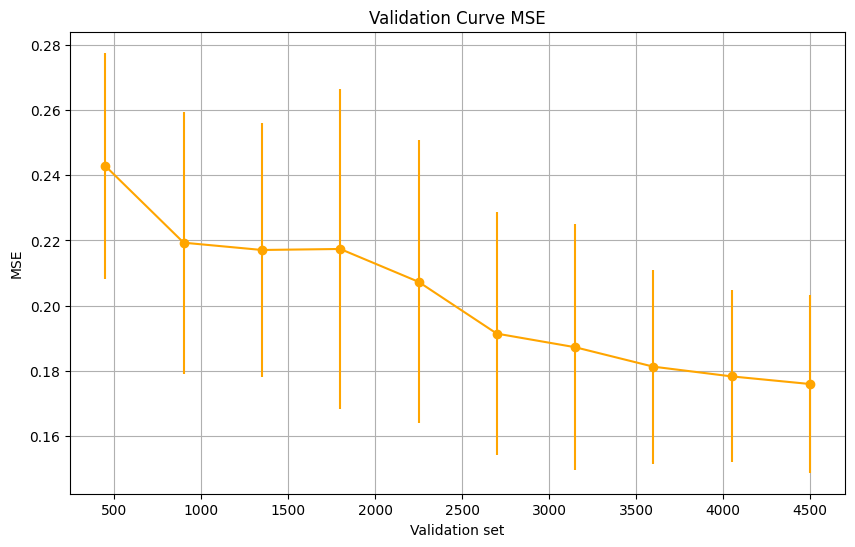

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.37023383 0.21140515 0.17899813 0.15330711 0.13500575]
MSE  scores media de medias:  0.20978999333171697
MSE  scores std:  [0.01969302 0.01854794 0.02954114 0.02696509 0.01527096]
MSE  scores media de stds:  0.022003627731297506
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


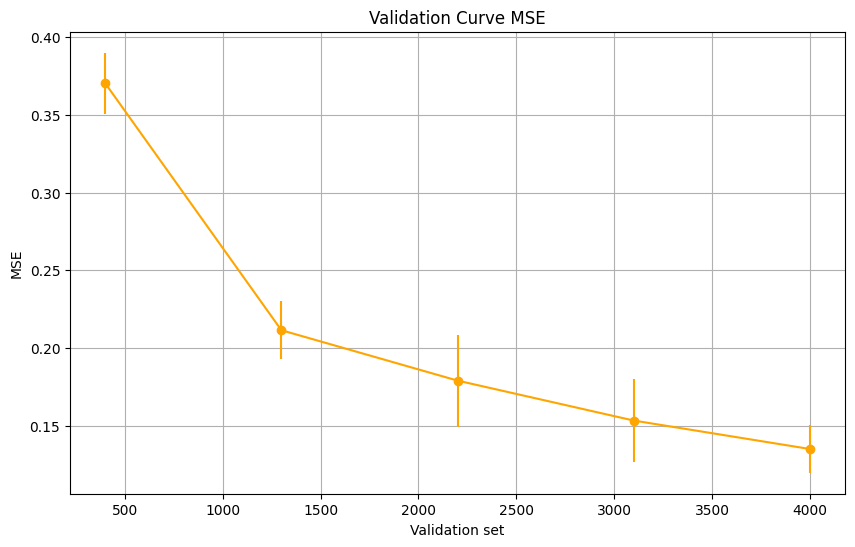

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=5
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.33419821 0.23284989 0.21257645 0.19914536 0.18466699 0.16437893
 0.15036928 0.14035166 0.13046355 0.12657265]
MSE  scores media de medias:  0.18755729811873292
MSE  scores std:  [0.04642963 0.04332726 0.0481618  0.04507616 0.04390983 0.04447879
 0.04681492 0.03935286 0.03266741 0.03215326]
MSE  scores media de stds:  0.04223719247436157
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


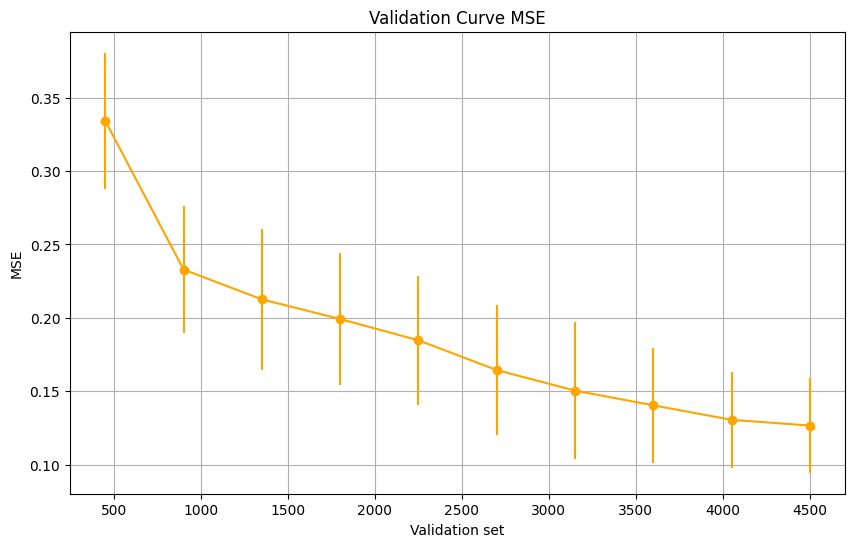

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#fold=10
valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.33040204 0.30372183 0.29796384 0.29449373 0.28912835]
MAE  scores media de medias:  0.3031419610722378
MAE  scores std:  [0.0133868  0.01227555 0.01478677 0.01431784 0.01261835]
MAE  scores media de stds:  0.013477060744620652
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


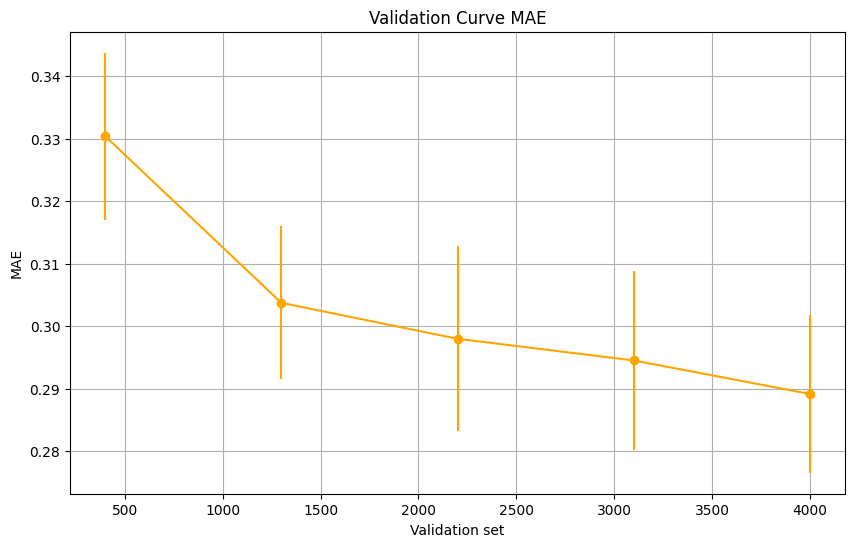

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=5

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.32356958 0.30547663 0.30307321 0.30271199 0.29881771 0.29409169
 0.29330496 0.29201091 0.2888801  0.28780309]
MAE  scores media de medias:  0.2989739867815773
MAE  scores std:  [0.02020575 0.02157462 0.01889966 0.01855022 0.0176353  0.01730297
 0.01885232 0.01755203 0.0162155  0.01651733]
MAE  scores media de stds:  0.018330570493508044
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


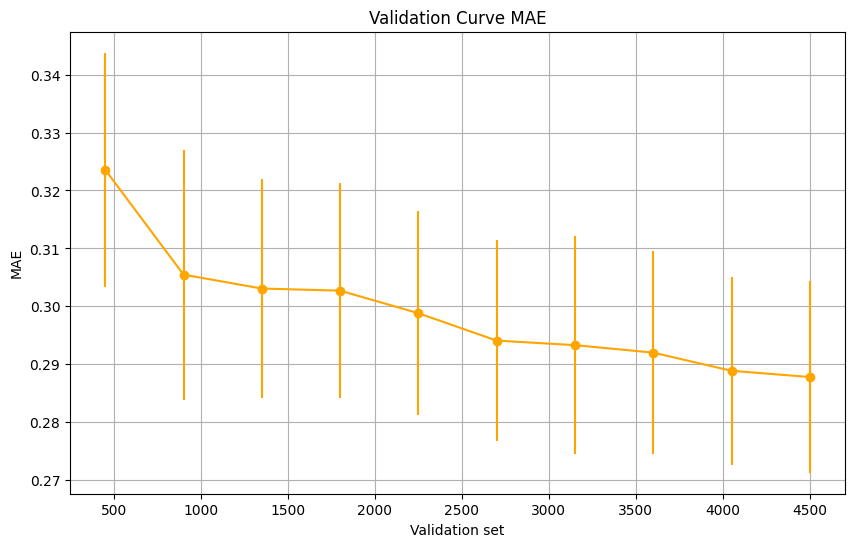

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#fold=10

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.37870594 0.28405037 0.25257755 0.23733019 0.22353585]
MAE  scores media de medias:  0.2752399769956706
MAE  scores std:  [0.00798073 0.0120937  0.01419736 0.0122774  0.00907971]
MAE  scores media de stds:  0.011125779902642902
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


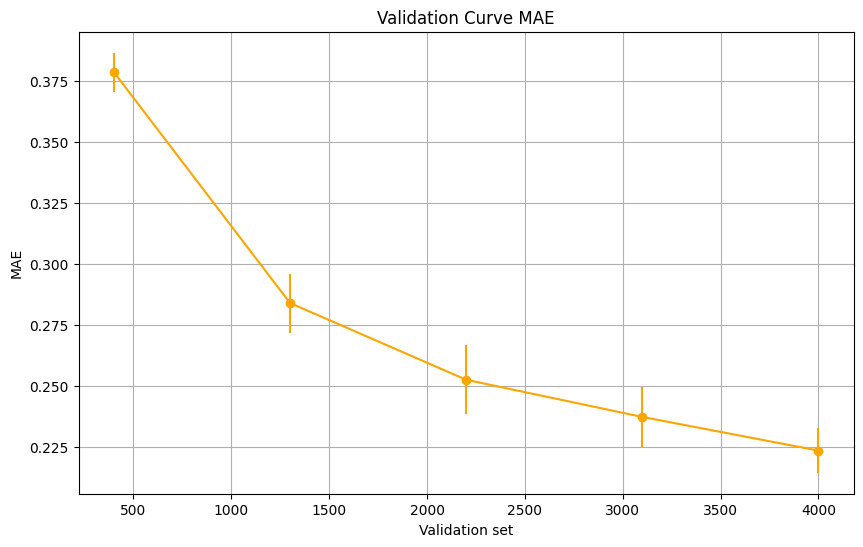

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=5

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.36724496 0.30667666 0.28273625 0.26710199 0.25447818 0.24239482
 0.23352205 0.2283964  0.22138483 0.21669078]
MAE  scores media de medias:  0.26206269081437233
MAE  scores std:  [0.02076778 0.02353884 0.02406208 0.02014657 0.01783658 0.01929062
 0.01971555 0.01880796 0.01703084 0.01732858]
MAE  scores media de stds:  0.019852540130461126
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


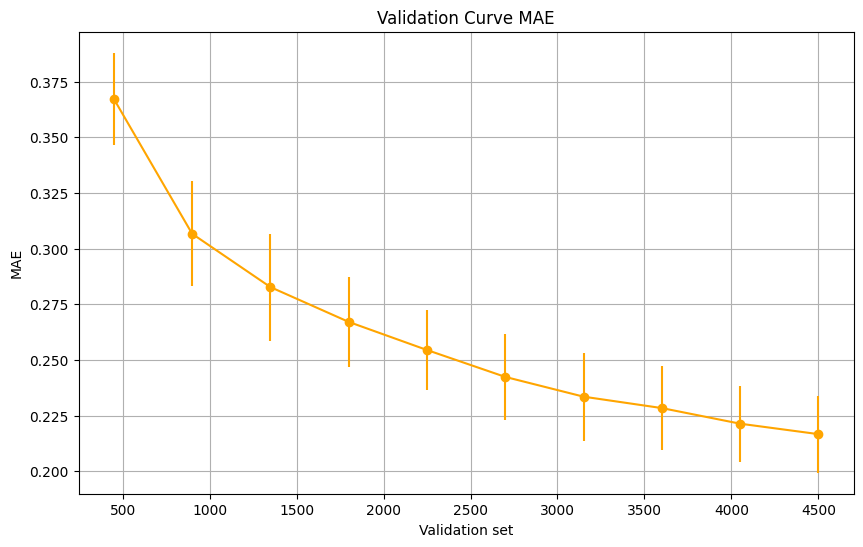

In [ ]:
#ncol=50 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=10

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.3296348  0.30033635 0.29473902 0.29021782 0.28527315]
MAE  scores media de medias:  0.3000402272350221
MAE  scores std:  [0.01235079 0.01224045 0.01442768 0.01437997 0.01270585]
MAE  scores media de stds:  0.013220949712576358
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


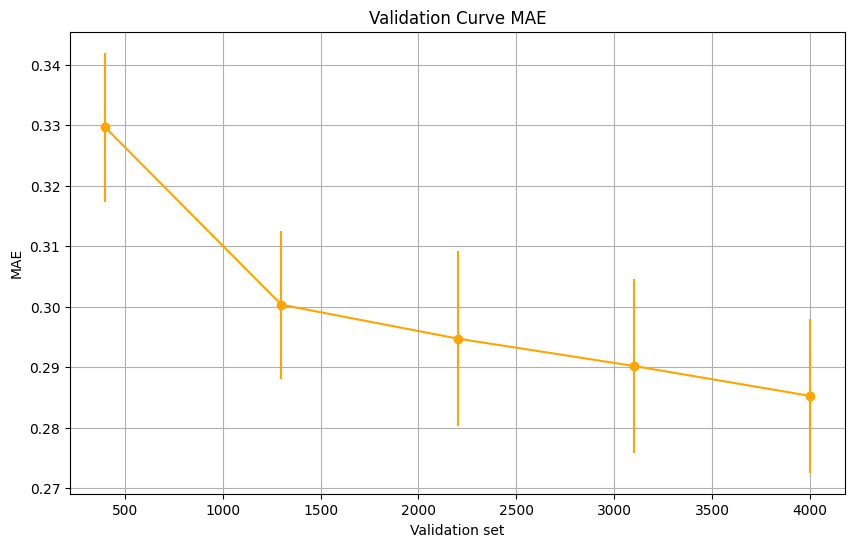

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=5

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.32310794 0.30331893 0.30030238 0.29896132 0.29595501 0.29114256
 0.29002905 0.28795423 0.2857452  0.28410569]
MAE  scores media de medias:  0.2960622313129834
MAE  scores std:  [0.02004687 0.02142314 0.01904118 0.01849425 0.01814559 0.01780897
 0.01913815 0.01810097 0.01643919 0.01662041]
MAE  scores media de stds:  0.018525870004091304
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


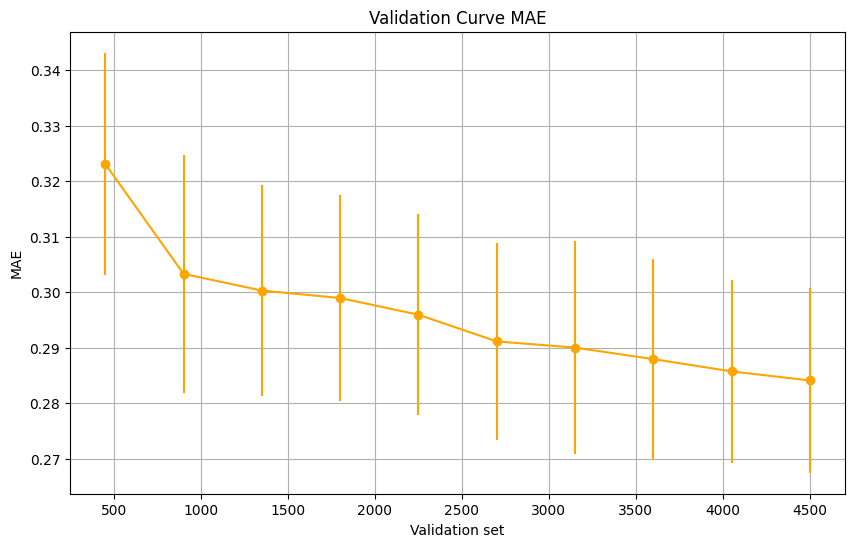

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=10

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.38069754 0.28126271 0.24993546 0.23264386 0.219627  ]
MAE  scores media de medias:  0.2728333147165171
MAE  scores std:  [0.00887152 0.01134019 0.01449699 0.0131577  0.01065955]
MAE  scores media de stds:  0.011705189575038018
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


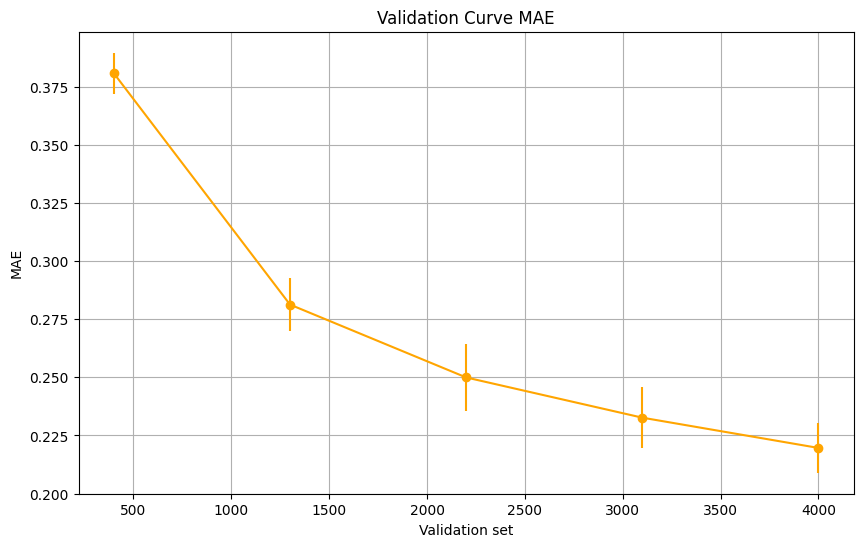

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=5

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.36126304 0.30136747 0.27998735 0.26439488 0.25218363 0.23973074
 0.23000531 0.22442079 0.21717975 0.2136398 ]
MAE  scores media de medias:  0.258417275863967
MAE  scores std:  [0.02075896 0.0235918  0.02373076 0.02120302 0.01833359 0.01889476
 0.02024743 0.01967129 0.0180572  0.01820409]
MAE  scores media de stds:  0.020269289456583055
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


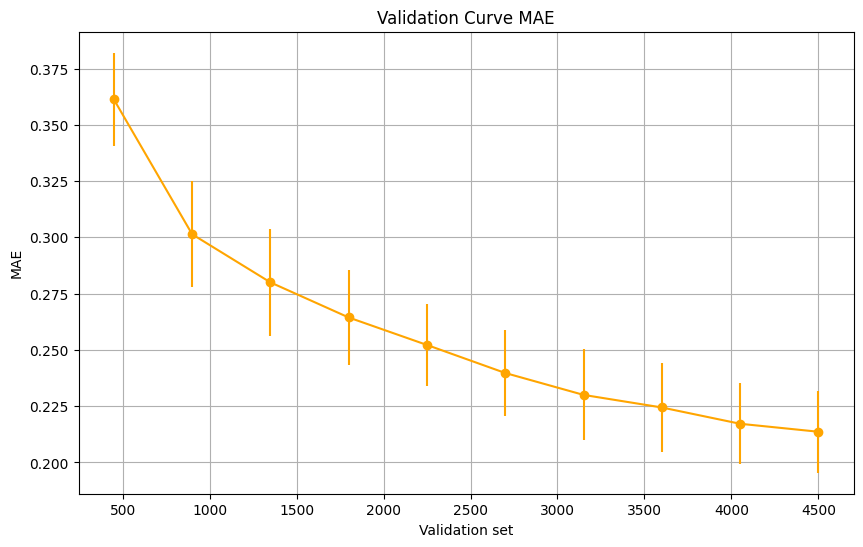

In [ ]:
#ncol=100 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=10

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.32883051 0.29955826 0.29418404 0.28921608 0.28412752]
MAE  scores media de medias:  0.29918328401357003
MAE  scores std:  [0.01301163 0.01229301 0.01419085 0.01414622 0.01271087]
MAE  scores media de stds:  0.013270517672981375
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


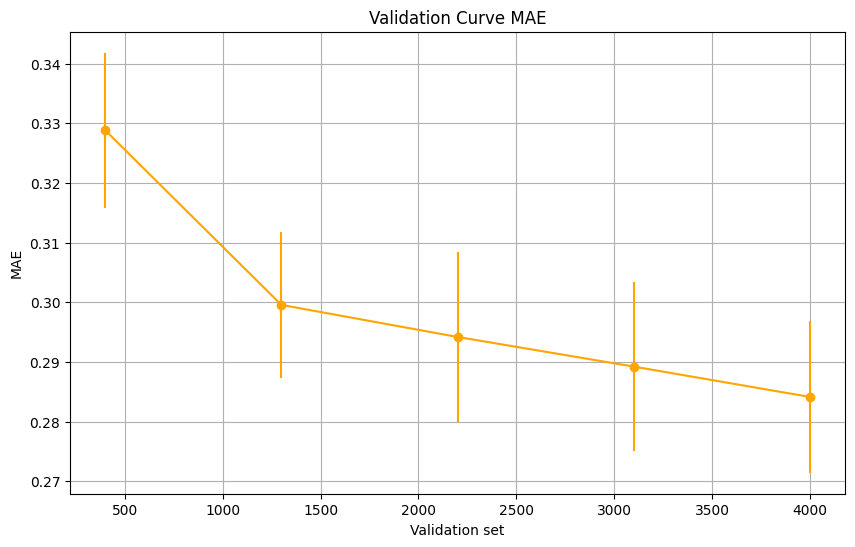

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=5

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.3222231  0.30240448 0.29948954 0.29800417 0.29490543 0.29031785
 0.28918778 0.28700103 0.28477238 0.28339696]
MAE  scores media de medias:  0.2951702725743909
MAE  scores std:  [0.01956594 0.02087347 0.01896843 0.0183444  0.01810674 0.01785052
 0.01899304 0.0176882  0.01621749 0.01628046]
MAE  scores media de stds:  0.018288869284472153
Hiperparametros:
criterion= squared_error , max_depth= 5 , min_samples_leaf= 10 , min_samples_split= 20 , max_features None


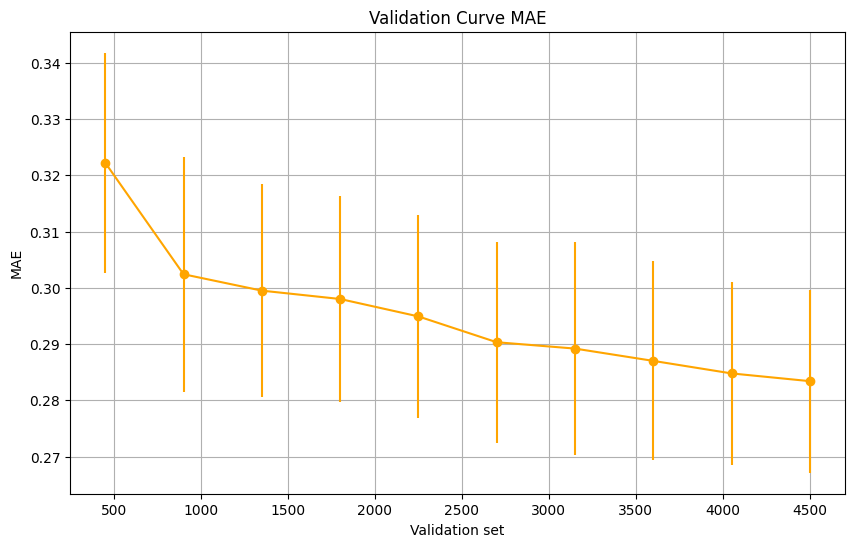

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=5
#min_samples_leaf=10
#min_samples_split=20
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=10

valcruzada_rfr(criterio='squared_error', md=5, msl=10, mss=20, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.37932608 0.28005815 0.24893501 0.23226568 0.21838317]
MAE  scores media de medias:  0.27179361939833724
MAE  scores std:  [0.00881706 0.01155224 0.0140458  0.0131964  0.01042657]
MAE  scores media de stds:  0.011607615099975866
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


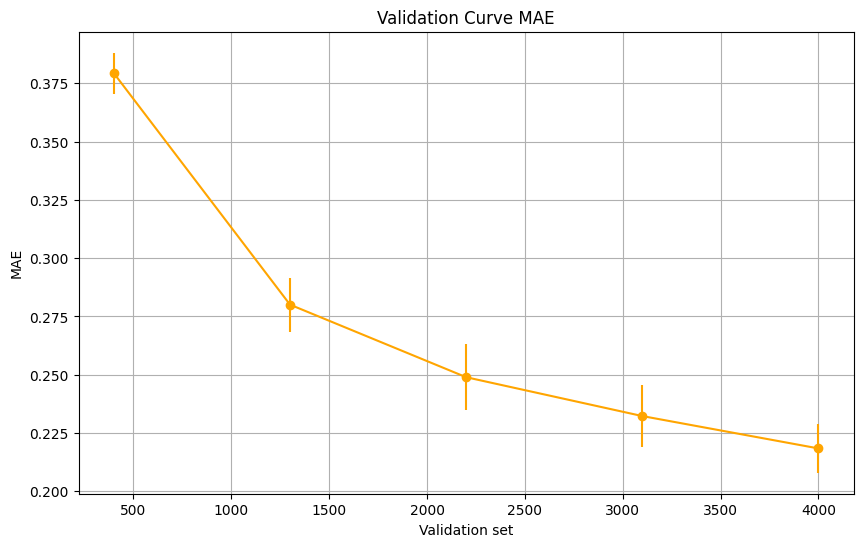

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=5

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.361288   0.30024405 0.27923668 0.26282385 0.25130507 0.23850882
 0.22866211 0.22368211 0.216321   0.21278182]
MAE  scores media de medias:  0.2574853503493806
MAE  scores std:  [0.02067662 0.02387985 0.02360984 0.02061682 0.01805548 0.01851933
 0.01953471 0.01864438 0.01797679 0.01776139]
MAE  scores media de stds:  0.019927520894526533
Hiperparametros:
criterion= squared_error , max_depth= 10 , min_samples_leaf= 20 , min_samples_split= 40 , max_features None


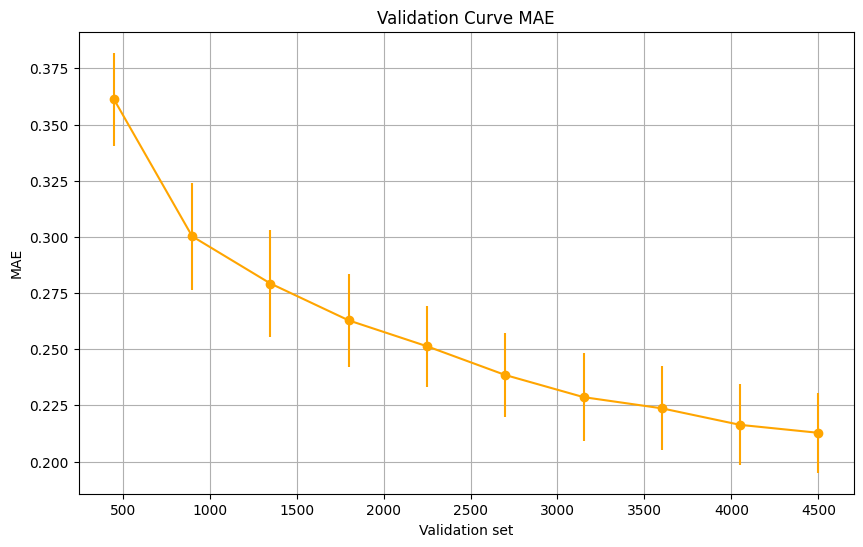

In [ ]:
#ncol=150 variables predictoras
#criterion=squared_error
#max_depth=10
#min_samples_leaf=20
#min_samples_split=40
#max_features=None (todas)
#recs=5000 (registros)
#scoring=mae
#fold=10

valcruzada_rfr(criterio='squared_error', md=10, msl=20, mss=40, mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

**Prueba del modelo XGBRegressor con 250,200,150,100,50 variables predictoras, resultado del análisis mutual information**

In [ ]:
!pip install xgboost

Variables predictoras 250: 
Mean Squared Error (MSE) para 250 predictoras:  0.011313713933908526
Mean Absolute Error (MSE) para 250 predictoras:  0.06748247342574952


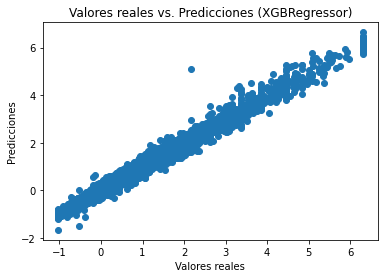

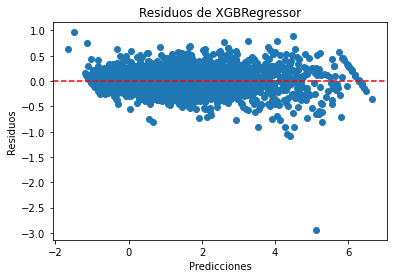

Variables predictoras 200: 
Mean Squared Error (MSE) para 200 predictoras:  0.011305121958210698
Mean Absolute Error (MSE) para 200 predictoras:  0.0669293439466591


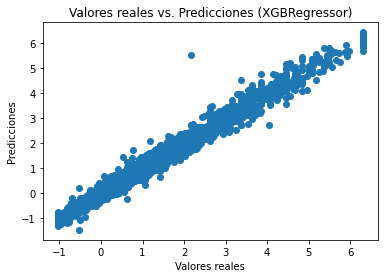

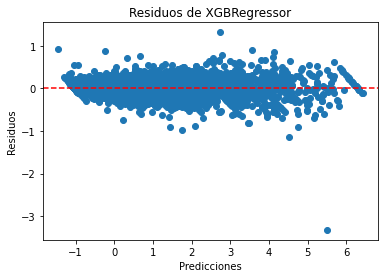

Variables predictoras 150: 
Mean Squared Error (MSE) para 150 predictoras:  0.010978427755917012
Mean Absolute Error (MSE) para 150 predictoras:  0.0665969885712539


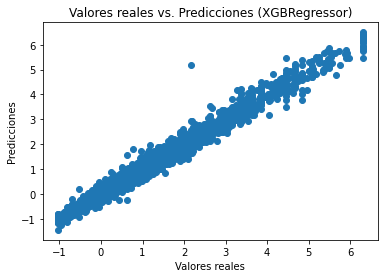

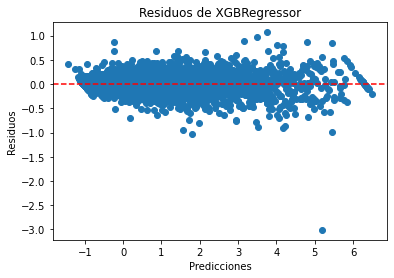

Variables predictoras 100: 
Mean Squared Error (MSE) para 100 predictoras:  0.009433084180575506
Mean Absolute Error (MSE) para 100 predictoras:  0.061798763921543445


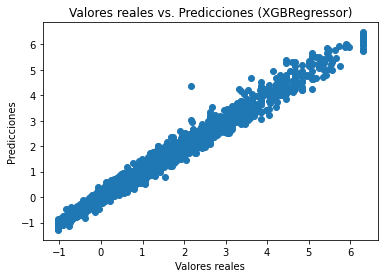

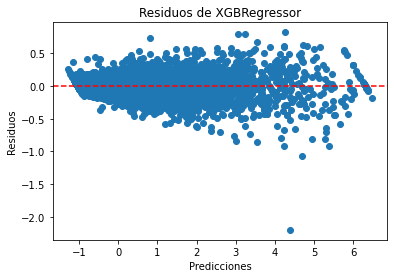

Variables predictoras 50: 
Mean Squared Error (MSE) para 50 predictoras:  0.0071704646970555804
Mean Absolute Error (MSE) para 50 predictoras:  0.05149570737246274


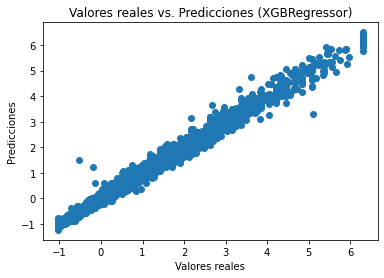

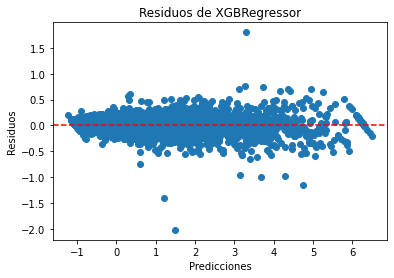

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#target
y = iter_00csv20.ind_analfabeta

for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    #dividir los datos en entrenamiento y validacion
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Establecer la semilla aleatoria para XGBoost
    np.random.seed(1)

    xgbr_model = XGBRegressor()
    xgbr_model.fit(X_train, y_train)

    # Paso 4: Realizar predicciones en el conjunto de prueba
    y_pred = xgbr_model.predict(X_test)

    #mae
    mae = mean_absolute_error(y_test, y_pred)
    #mse
    mse = mean_squared_error(y_test, y_pred)

    print(f"Variables predictoras {ncol}: ")
    #print(cols[:ncol])
    print(f"Mean Squared Error (MSE) para {ncol} predictoras: ", mse)
    print(f"Mean Absolute Error (MSE) para {ncol} predictoras: ", mae)

        # Graficar valores reales vs. predicciones
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Valores reales vs. Predicciones (XGBRegressor)")
    plt.show()

    # Calcular los residuos (diferencias entre los valores reales y las predicciones)
    residuos = y_test - y_pred

    # Graficar los residuos
    plt.scatter(y_pred, residuos)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuos de XGBRegressor")
    plt.show()

**Se usa el modelo XGBRegressor con validacion cruzada de 5 y 10-fold, sin hiperparametrización, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse) y error absoluto medio (mae); se usa una muestra aleatorio solo con 5000 registros para las optimizaciones**

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

#validacion cruzada, xgb regressor
def valcruzada_xgbr_sp(eval_metric, mf, rs, ncol, fold, sc, err_type, recs):
  #target
  train_sizes = np.linspace(0.1, 1.0, fold)  # 10 tamaños de entrenamiento diferentes

  #X = iter_00csv20[cols[:ncol]]
  subsample = iter_00csv20.sample(n=recs, random_state=42)
  X = subsample[cols[:ncol]]
  y = subsample['ind_analfabeta']
  # Asegurarse de que el índice de 'y' coincida con el de 'X'
  y = y.reset_index(drop=True)

  print("Errores con ", ncol, " columnas: ")

  my_pipeline_mse = Pipeline(steps=[('preprocessor', SimpleImputer()),
                            ('model', XGBRegressor(**{'eval_metric':eval_metric,'max_features':mf, 'random_state':rs}))
                            ])

  # Calcula las curvas de aprendizaje mse
  train_sizes, _, validation_scores = learning_curve(
      my_pipeline_mse, X, y, train_sizes=train_sizes, cv=fold, scoring=sc)

  # Calcula la media y la desviación estándar de los puntajes de validación
  validation_scores_mean = -np.mean(validation_scores, axis=1)
  print("fold: ", fold)
  print(err_type, " scores mean: ", validation_scores_mean)
  print(err_type, " scores media de medias: ", np.mean(validation_scores_mean))
  validation_scores_std = np.std(validation_scores, axis=1)
  print(err_type, " scores std: ", validation_scores_std)
  print(err_type, " scores media de stds: ", np.mean(validation_scores_std))
  print("Hiperparametros:")
  print("criterion=", eval_metric, ", max_features",mf)

  # Plotea las curvas de aprendizaje de mse
  plt.figure(figsize=(10, 6))
  plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
  plt.xlabel("Validation set")
  plt.ylabel(err_type)
  plt.title("Validation Curve "+ err_type)
  plt.grid()
  plt.show()
  print(" ")

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.15605802 0.08667649 0.05876642 0.04722505 0.04132511]
MSE  scores media de medias:  0.07801021863811892
MSE  scores std:  [0.02075202 0.01122645 0.00796621 0.00759607 0.00444544]
MSE  scores media de stds:  0.010397236743689909
Hiperparametros:
criterion= rmse , max_features None


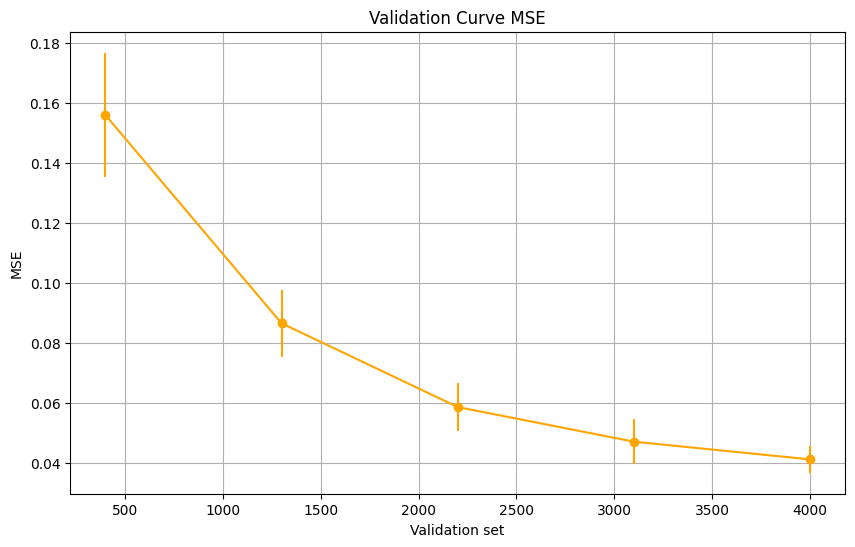

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 50 variables predictoras, fold=5
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.14211107 0.10511164 0.08879796 0.07142139 0.06167416 0.05779441
 0.04803264 0.04352852 0.03940917 0.03804385]
MSE  scores media de medias:  0.06959248120876438
MSE  scores std:  [0.02778966 0.02439717 0.0254327  0.01332154 0.0122345  0.01636036
 0.00872462 0.00963747 0.00972095 0.00798058]
MSE  scores media de stds:  0.015559955802727168
Hiperparametros:
criterion= rmse , max_features None


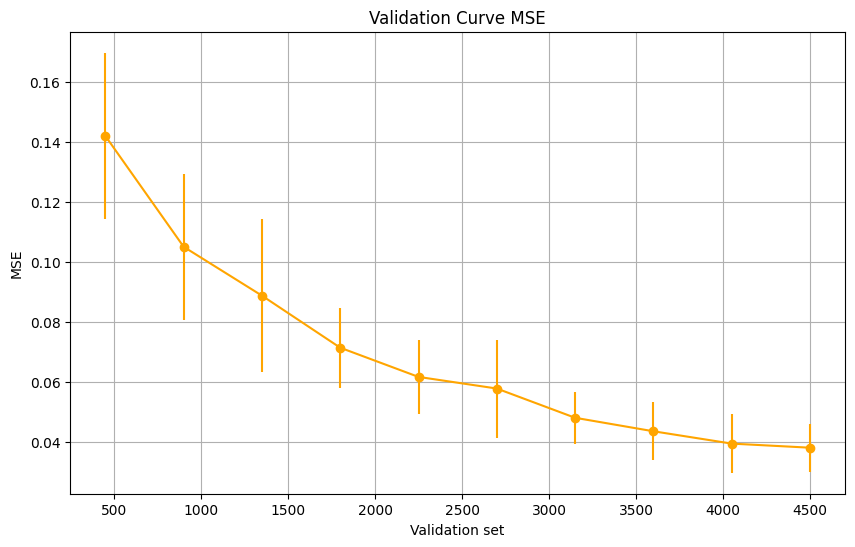

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 50 variables predictoras, fold=10
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.17153694 0.09285293 0.06872581 0.05862715 0.05267239]
MSE  scores media de medias:  0.08888304434326064
MSE  scores std:  [0.02561025 0.01298716 0.00673518 0.00872231 0.0079946 ]
MSE  scores media de stds:  0.012409901731205712
Hiperparametros:
criterion= rmse , max_features None


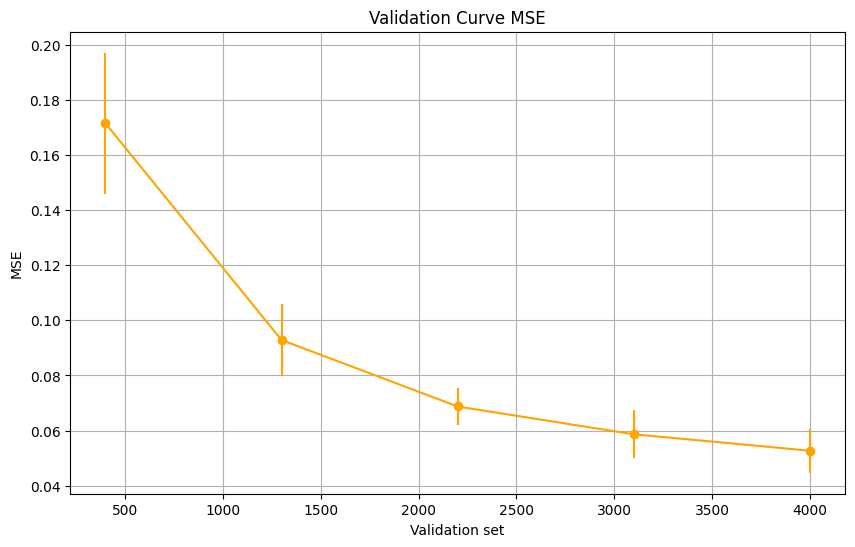

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 100 variables predictoras, fold=5
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.16122034 0.12059054 0.09985049 0.08093969 0.07693805 0.06863047
 0.05822456 0.05361451 0.05205866 0.04727657]
MSE  scores media de medias:  0.08193438785267612
MSE  scores std:  [0.03372756 0.02965042 0.02703747 0.01525176 0.01715547 0.01980392
 0.01339566 0.01301532 0.01338583 0.01286922]
MSE  scores media de stds:  0.019529264736180968
Hiperparametros:
criterion= rmse , max_features None


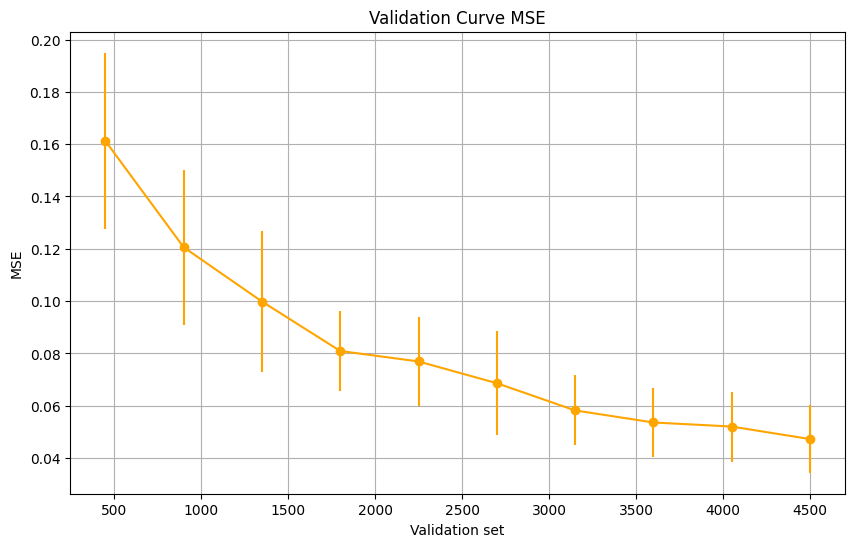

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 100 variables predictoras, fold=10
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.17255827 0.09650751 0.06640378 0.05873091 0.05549619]
MSE  scores media de medias:  0.08993932996585748
MSE  scores std:  [0.02988525 0.00521259 0.00450026 0.01191384 0.00761683]
MSE  scores media de stds:  0.01182575414148111
Hiperparametros:
criterion= rmse , max_features None


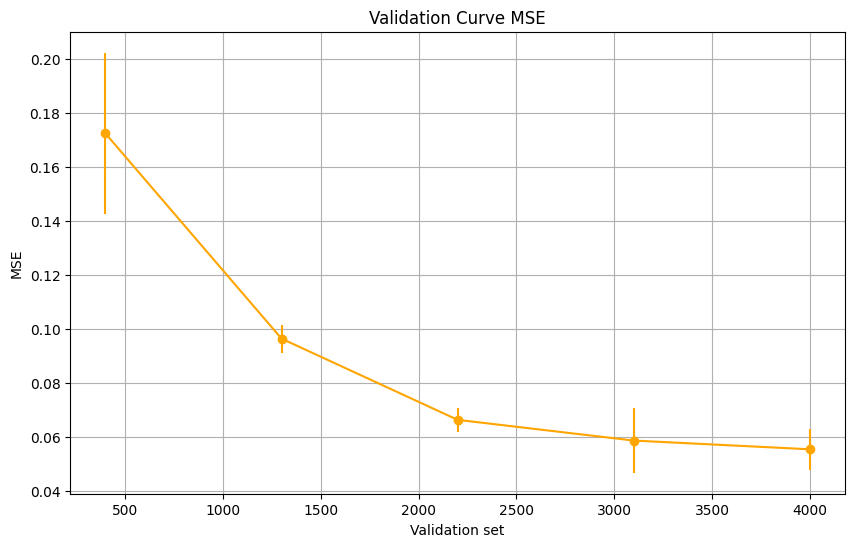

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 150 variables predictoras, fold=5
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.15356709 0.11889398 0.10037651 0.08466189 0.07029703 0.06550299
 0.06179432 0.05269092 0.05095031 0.04917242]
MSE  scores media de medias:  0.0807907452887093
MSE  scores std:  [0.03854565 0.03487318 0.02553337 0.01692459 0.01583571 0.01909269
 0.01573699 0.01368156 0.01240522 0.01396097]
MSE  scores media de stds:  0.020658992121867985
Hiperparametros:
criterion= rmse , max_features None


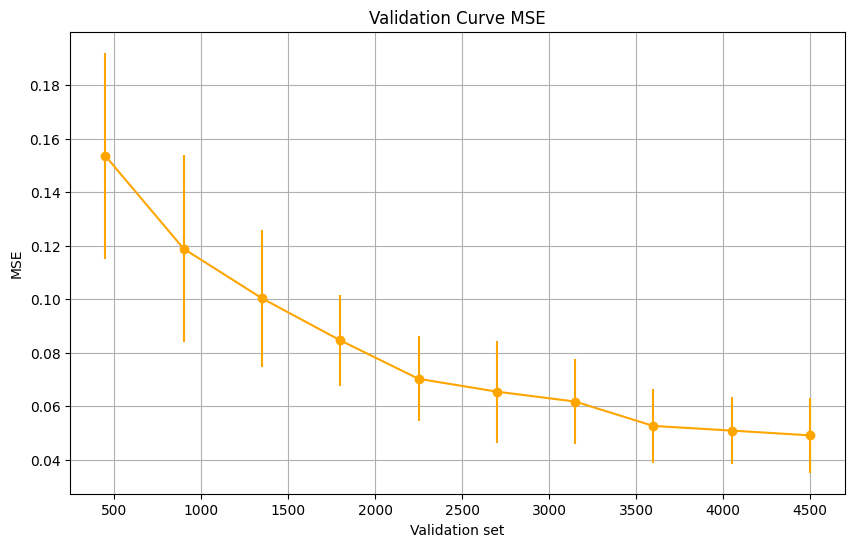

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 150 variables predictoras, fold=10
valcruzada_xgbr_sp(eval_metric='rmse', mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_squared_error', err_type='MSE', recs=5000)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.21943398 0.15554637 0.13202688 0.11777222 0.10985022]
MAE  scores media de medias:  0.14692593393893477
MAE  scores std:  [0.00967973 0.0079717  0.00502141 0.00504103 0.00507129]
MAE  scores media de stds:  0.006557033108392676
Hiperparametros:
criterion= mae , max_features None


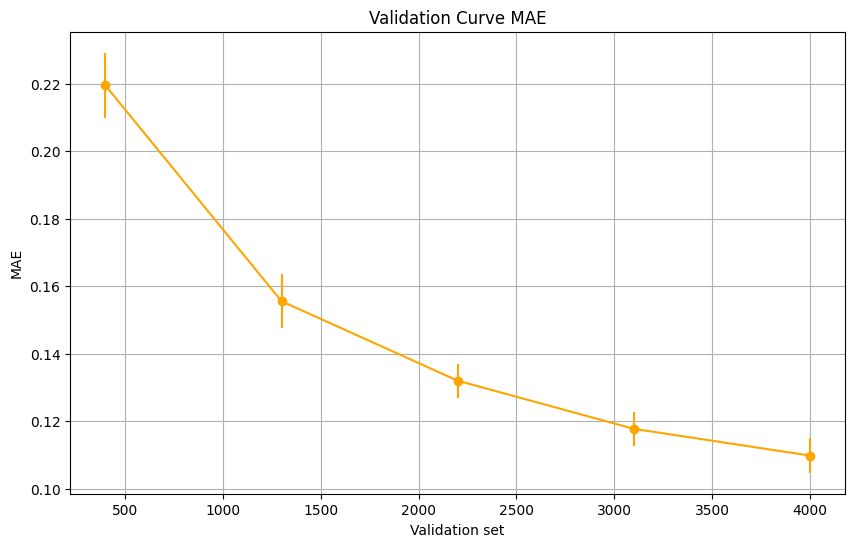

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 50 variables predictoras, scoring=mae, fold=5
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=50, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.21891107 0.17251505 0.15740464 0.1440979  0.13308445 0.12572264
 0.11881867 0.11622983 0.10903523 0.10633258]
MAE  scores media de medias:  0.14021520628083414
MAE  scores std:  [0.01518269 0.0116498  0.01411033 0.00963717 0.00977249 0.01018032
 0.00724437 0.00628156 0.00766703 0.00597754]
MAE  scores media de stds:  0.009770330288065643
Hiperparametros:
criterion= mae , max_features None


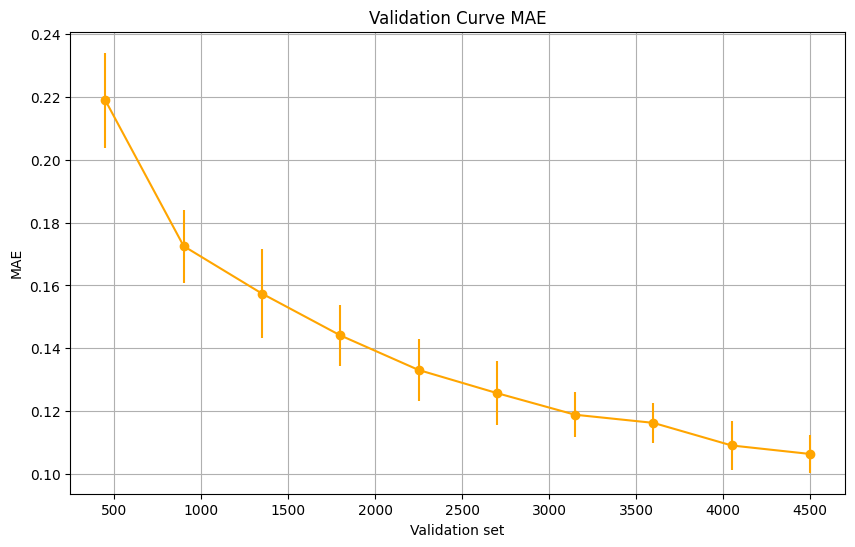

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 50 variables predictoras, scoring=mae, fold=10
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=50, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.23896284 0.17121506 0.14725685 0.13213682 0.12578017]
MAE  scores media de medias:  0.16307034901904252
MAE  scores std:  [0.01192611 0.00740449 0.00664929 0.00763786 0.00452602]
MAE  scores media de stds:  0.007628753268640822
Hiperparametros:
criterion= mae , max_features None


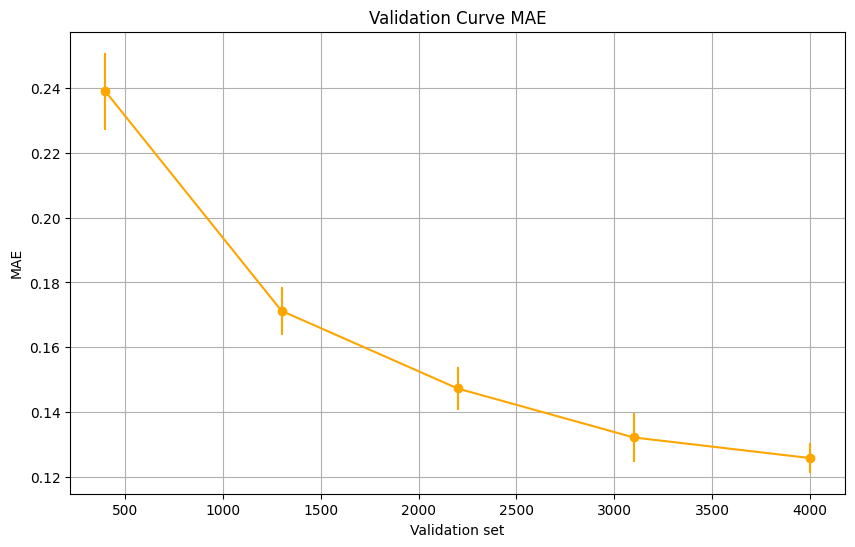

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 100 variables predictoras, scoring=mae, fold=5
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=100, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.23450094 0.19074722 0.17347508 0.15850093 0.14844049 0.13926061
 0.13233302 0.12880195 0.12530625 0.12017466]
MAE  scores media de medias:  0.155154115916815
MAE  scores std:  [0.01831259 0.01457151 0.01542175 0.01023886 0.01084008 0.00917365
 0.00769549 0.00764004 0.00872726 0.00787838]
MAE  scores media de stds:  0.011049959505536049
Hiperparametros:
criterion= mae , max_features None


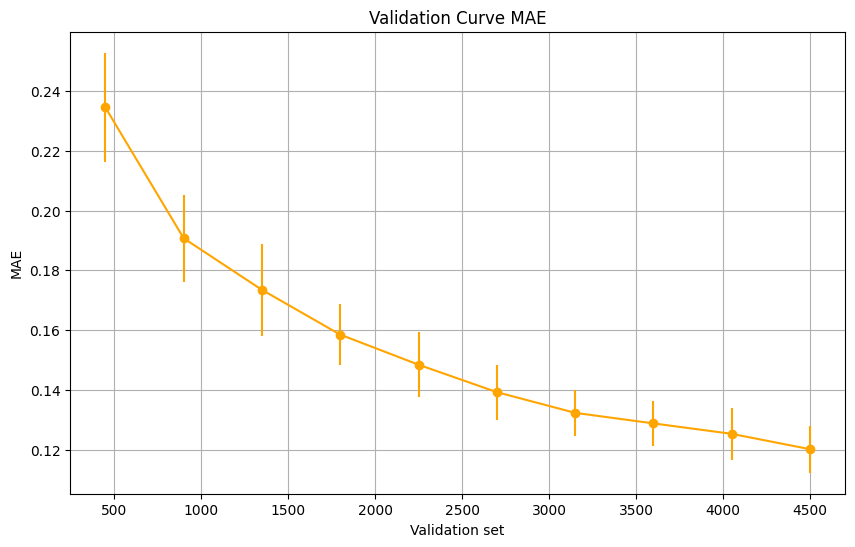

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 100 variables predictoras, scoring=mae, fold=10
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=100, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.24481283 0.17158729 0.14501385 0.13275096 0.12664632]
MAE  scores media de medias:  0.16416224783328537
MAE  scores std:  [0.01228612 0.00647613 0.00817363 0.00957227 0.00335503]
MAE  scores media de stds:  0.007972636504136535
Hiperparametros:
criterion= mae , max_features None


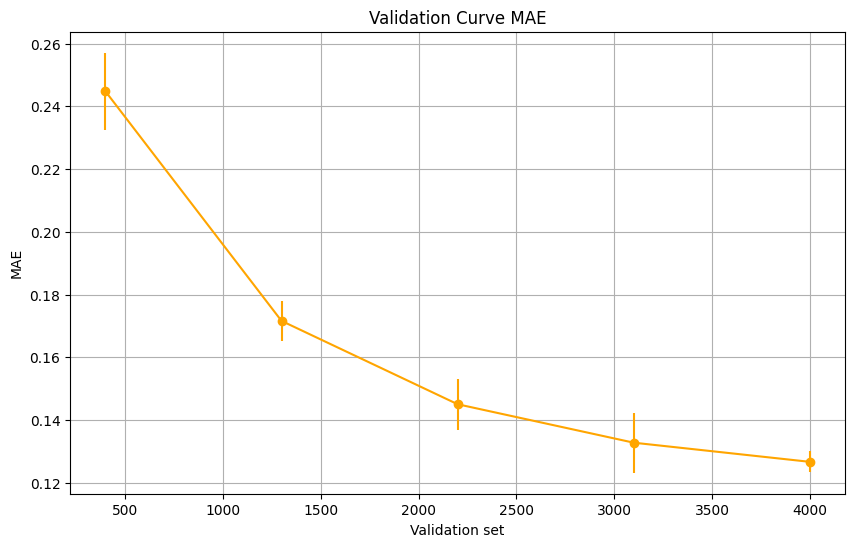

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 150 variables predictoras, scoring=mae, fold=5
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=150, fold=5, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.22836718 0.19019234 0.17440426 0.16304964 0.14553368 0.13999179
 0.1340722  0.12734967 0.12479311 0.12151865]
MAE  scores media de medias:  0.15492725165985108
MAE  scores std:  [0.01871986 0.01492888 0.01315624 0.01278343 0.00839792 0.0109543
 0.00872088 0.00743937 0.00936605 0.00740195]
MAE  scores media de stds:  0.011186886967494989
Hiperparametros:
criterion= mae , max_features None


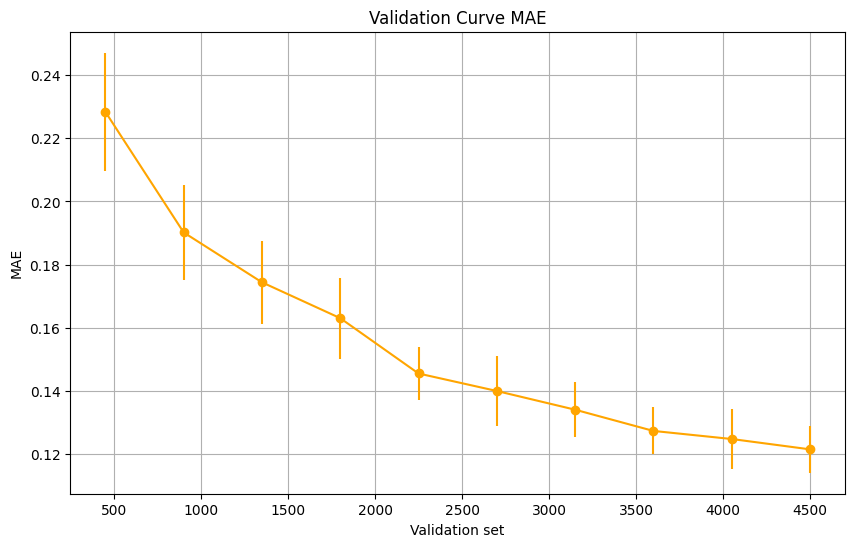

In [ ]:
# sin parametrosxgbr, validacion cruzada, 5000 registros, 150 variables predictoras, scoring=mae, fold=10
valcruzada_xgbr_sp(eval_metric='mae', mf=None, rs=0, ncol=150, fold=10, sc='neg_mean_absolute_error', err_type='MAE', recs=5000)

**Se usa el modelo XGBRegressor con validacion cruzada de 5 y 10-fold, con diferentes hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse) y error absoluto medio (mae); se usa una muestra aleatorio solo con 5000 registros para las optimizaciones**

In [ ]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Validación cruzada con XGBRegressor
def valcruzada_xgbr(eval_metric, mf, rs, ncol, fold, sc, err_type, recs,
                       min_child_weight, colsample_bytree, max_features, gamma, max_depth):
    # Define tamaños de entrenamiento
    train_sizes = np.linspace(0.1, 1.0, fold)

    # Selección de muestra de datos
    subsample = iter_00csv20.sample(n=recs, random_state=42)
    X = subsample[cols[:ncol]]
    y = subsample['ind_analfabeta']
    y = y.reset_index(drop=True)

    print("Errores con ", ncol, " columnas: ")

    # Configuración del pipeline con hiperparámetros
    my_pipeline_mse = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', XGBRegressor(
            eval_metric=eval_metric,
            max_features=mf,
            random_state=rs,
            min_child_weight=min_child_weight,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            max_depth=max_depth
        ))
    ])

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline_mse, X, y, train_sizes=train_sizes, cv=fold, scoring=sc)

    # Calcula la media y desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("fold: ", fold)
    print(err_type, " scores mean: ", validation_scores_mean)
    print(err_type, " scores media de medias: ", np.mean(validation_scores_mean))
    validation_scores_std = np.std(validation_scores, axis=1)
    print(err_type, " scores std: ", validation_scores_std)
    print(err_type, " scores media de stds: ", np.mean(validation_scores_std))
    print("Hiperparametros:")
    print("criterion=", eval_metric, ", max_features=", mf, ", min_child_weight=", min_child_weight,
          ", colsample_bytree=", colsample_bytree, ", gamma=", gamma, ", max_depth=", max_depth)

    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation set")
    plt.ylabel(err_type)
    plt.title("Validation Curve "+ err_type)
    plt.grid()
    plt.show()
    print(" ")

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.35756965 0.26212632 0.22803687 0.18915729 0.17623225]
MSE  scores media de medias:  0.24262447585503083
MSE  scores std:  [0.01212534 0.01222866 0.01750526 0.01641256 0.01280553]
MSE  scores media de stds:  0.014215470654069978
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


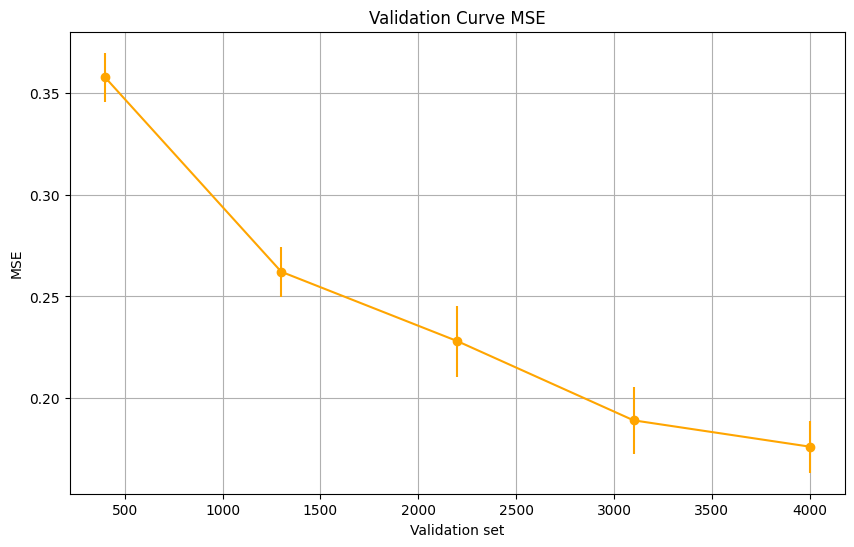

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.34712798 0.28271276 0.25476756 0.24153056 0.21989374 0.19925046
 0.18271046 0.18102105 0.17224498 0.17037533]
MSE  scores media de medias:  0.2251634871526818
MSE  scores std:  [0.0352707  0.03332599 0.03268276 0.02594764 0.03249725 0.02457248
 0.02489497 0.02441023 0.024132   0.02301585]
MSE  scores media de stds:  0.028074986592843947
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


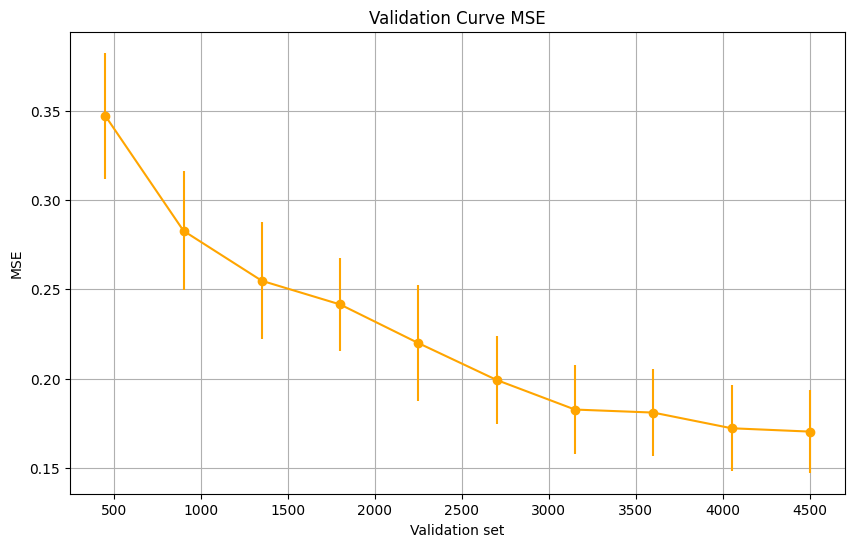

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  50  columnas: 
fold:  5
MSE  scores mean:  [0.47734827 0.31777296 0.27306884 0.24312275 0.22458089]
MSE  scores media de medias:  0.30717874346380436
MSE  scores std:  [0.02514481 0.01253482 0.01698778 0.01674347 0.0132784 ]
MSE  scores media de stds:  0.016937855617439566
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


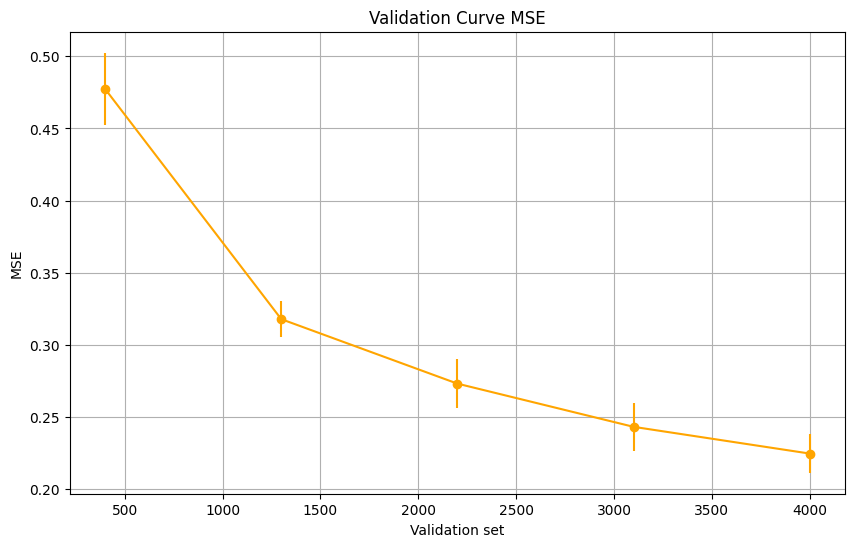

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  50  columnas: 
fold:  10
MSE  scores mean:  [0.49902637 0.3602548  0.32221468 0.287439   0.27118812 0.24048141
 0.23978191 0.2272072  0.21486829 0.20787969]
MSE  scores media de medias:  0.2870341474752953
MSE  scores std:  [0.04706424 0.03908522 0.03974998 0.03303143 0.03002498 0.03154129
 0.03258792 0.0260925  0.02438407 0.0253022 ]
MSE  scores media de stds:  0.032886384268129745
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


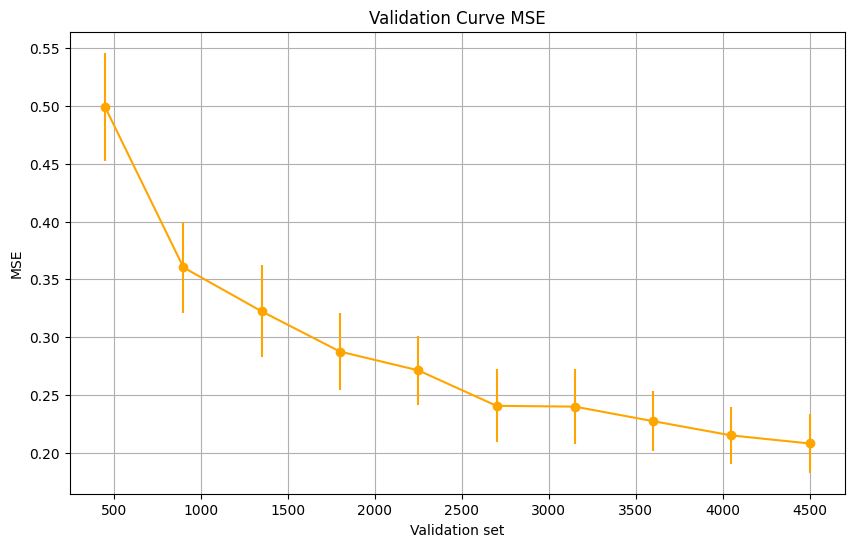

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.35738392 0.26603563 0.21669728 0.18748945 0.16818323]
MSE  scores media de medias:  0.23915790356822933
MSE  scores std:  [0.01201342 0.02111517 0.01915707 0.01791136 0.0117249 ]
MSE  scores media de stds:  0.016384384171937945
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


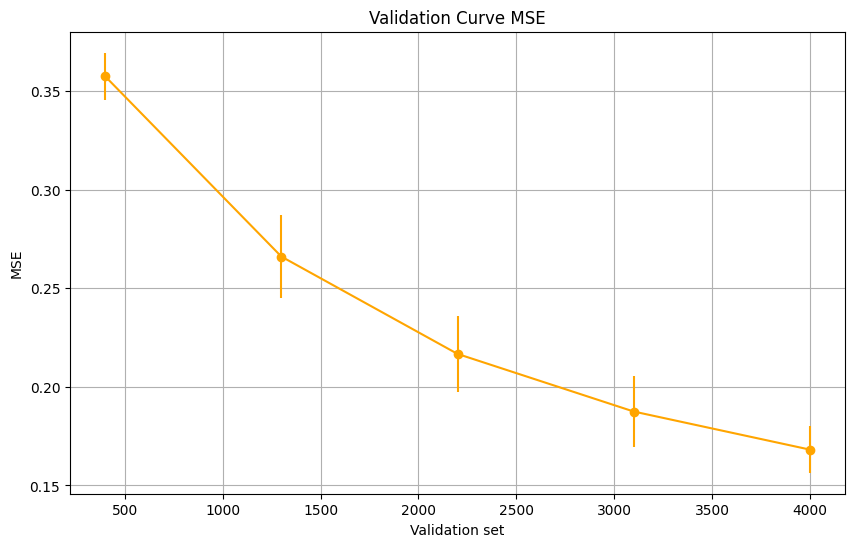

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.34223837 0.28281336 0.25232749 0.23203726 0.21541236 0.19004376
 0.17612981 0.17588842 0.16699905 0.16319301]
MSE  scores media de medias:  0.21970828877262472
MSE  scores std:  [0.03739812 0.0422336  0.03710033 0.0286702  0.02776082 0.02251905
 0.0225074  0.02602977 0.02337616 0.02333921]
MSE  scores media de stds:  0.029093465490469844
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


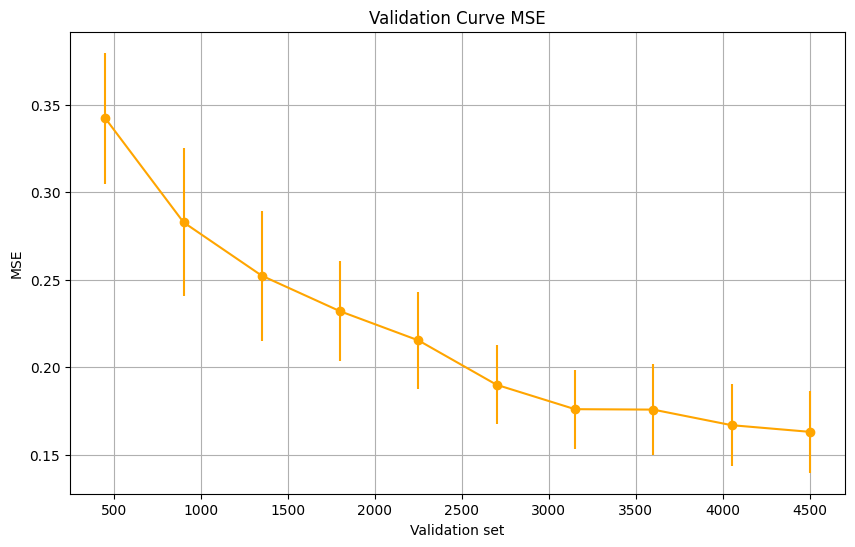

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  100  columnas: 
fold:  5
MSE  scores mean:  [0.47734827 0.31361861 0.26418976 0.23173293 0.20885839]
MSE  scores media de medias:  0.2991495913384877
MSE  scores std:  [0.02514481 0.01411687 0.0151797  0.0068843  0.01652217]
MSE  scores media de stds:  0.015569569073595652
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


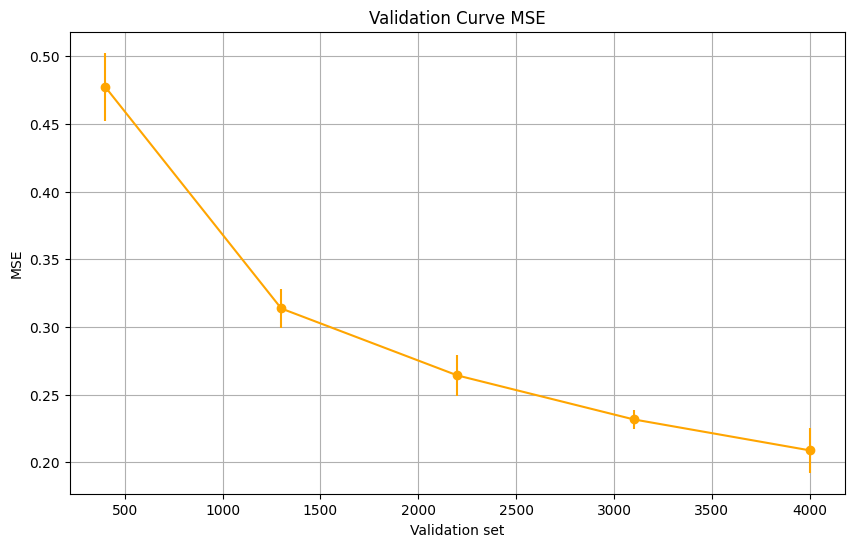

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  100  columnas: 
fold:  10
MSE  scores mean:  [0.49848445 0.35626655 0.31375663 0.28616062 0.26456664 0.23661129
 0.23264336 0.22190593 0.2105193  0.21206707]
MSE  scores media de medias:  0.28329818456173755
MSE  scores std:  [0.04724391 0.03958071 0.04144136 0.03383313 0.03240035 0.03896859
 0.0321566  0.02984403 0.02851392 0.02572211]
MSE  scores media de stds:  0.034970470725427395
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


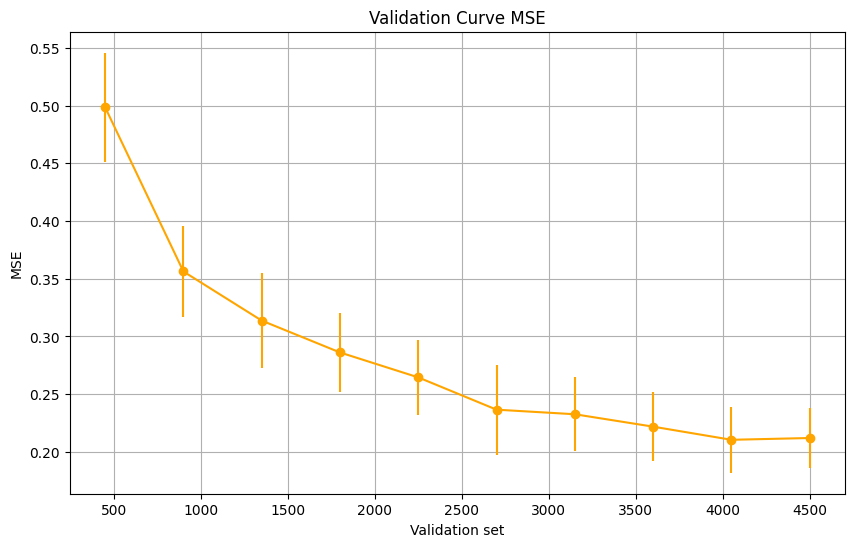

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.35682393 0.26241282 0.2251549  0.18264129 0.16750919]
MSE  scores media de medias:  0.2389084277583325
MSE  scores std:  [0.01174083 0.01859026 0.02061479 0.01433709 0.01713066]
MSE  scores media de stds:  0.016482725316520355
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


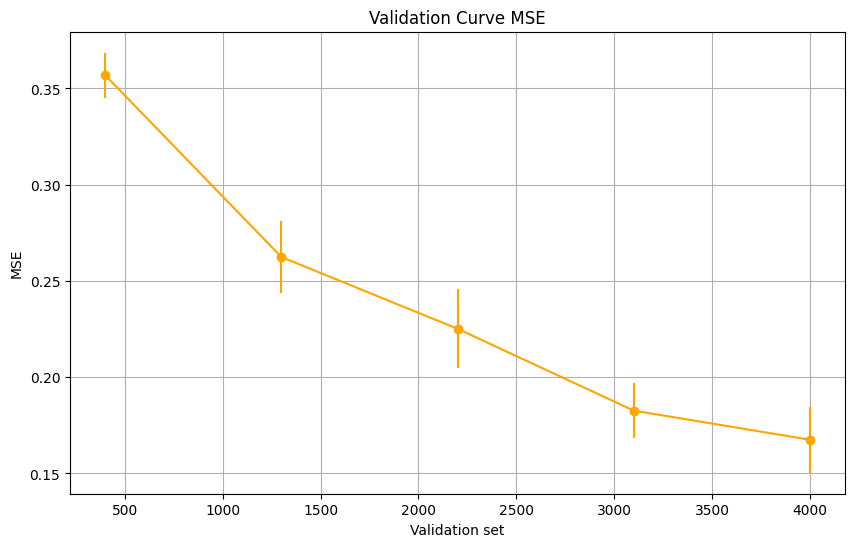

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.34223837 0.28281336 0.24662105 0.24802199 0.22063856 0.19490877
 0.17952916 0.17277259 0.16887877 0.15943504]
MSE  scores media de medias:  0.22158576552020764
MSE  scores std:  [0.03739812 0.0422336  0.03653948 0.0295421  0.02778949 0.02803555
 0.03109314 0.01954242 0.02330624 0.02240639]
MSE  scores media de stds:  0.02978865194587694
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


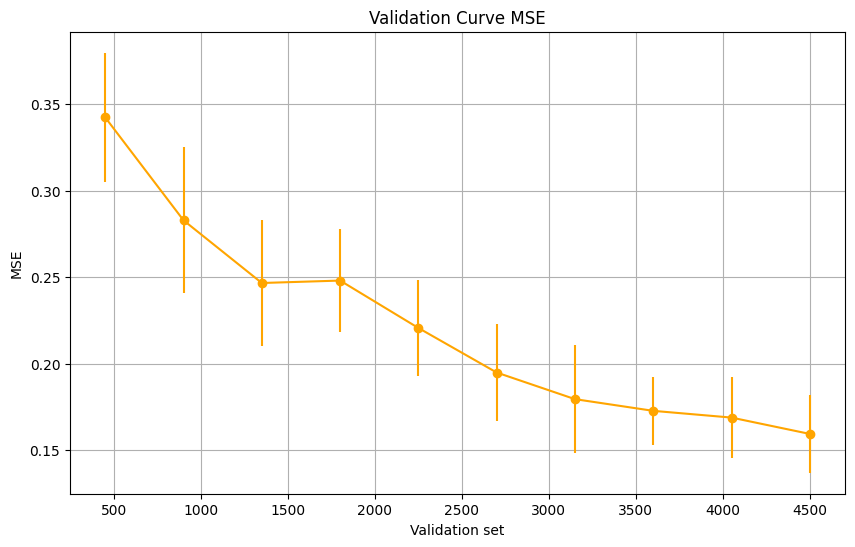

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  150  columnas: 
fold:  5
MSE  scores mean:  [0.47734827 0.31361861 0.26458004 0.23028367 0.21510667]
MSE  scores media de medias:  0.300187451856398
MSE  scores std:  [0.02514481 0.01411687 0.01534157 0.00866384 0.01116165]
MSE  scores media de stds:  0.014885748644798405
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


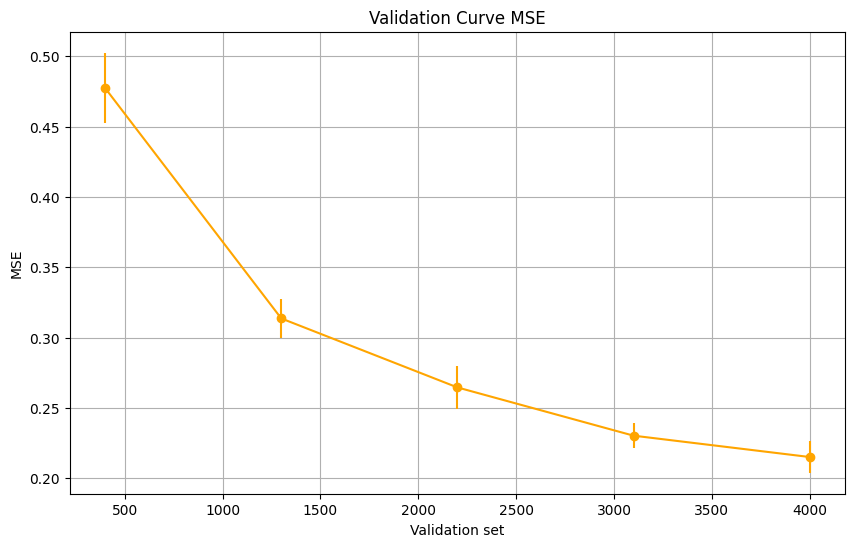

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  150  columnas: 
fold:  10
MSE  scores mean:  [0.49848445 0.35626655 0.31375663 0.28497345 0.25854424 0.23311859
 0.22970127 0.22126221 0.21200624 0.2086088 ]
MSE  scores media de medias:  0.28167224354673986
MSE  scores std:  [0.04724391 0.03958071 0.04144136 0.03360387 0.02978309 0.031583
 0.03058177 0.02615328 0.02834326 0.02440809]
MSE  scores media de stds:  0.0332722327064093
Hiperparametros:
criterion= rmse , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


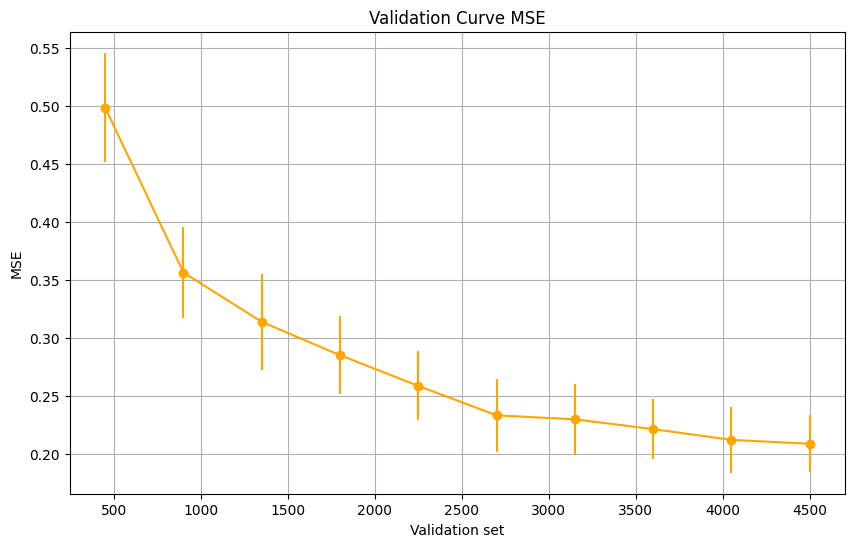

In [ ]:
valcruzada_xgbr(
    eval_metric='rmse',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_squared_error', # Métrica de evaluación
    err_type='MSE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.43098737 0.37077445 0.34070397 0.31311985 0.29841886]
MAE  scores media de medias:  0.3508008998171487
MAE  scores std:  [0.00889938 0.00738792 0.01097404 0.01584008 0.0106847 ]
MAE  scores media de stds:  0.010757224543453684
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


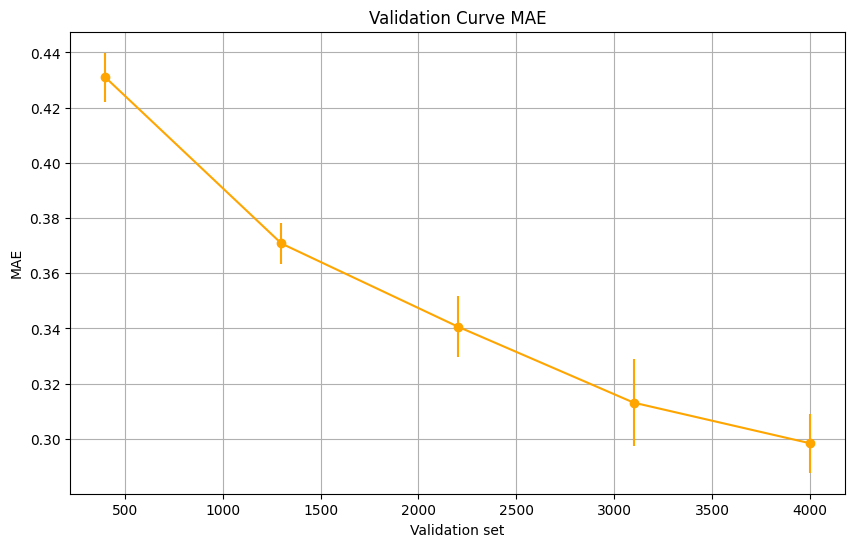

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.43105404 0.38532733 0.36440838 0.35497134 0.33971014 0.31982721
 0.3089588  0.30531017 0.29754842 0.29426812]
MAE  scores media de medias:  0.3401383946251125
MAE  scores std:  [0.01692461 0.01686538 0.01778302 0.01426971 0.02066269 0.01651419
 0.01472978 0.0142311  0.01498912 0.01325234]
MAE  scores media de stds:  0.01602219456702206
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


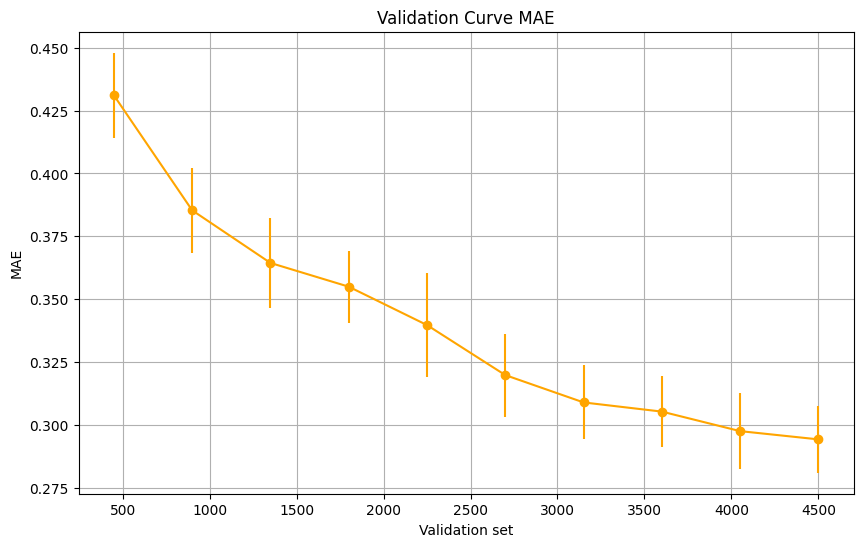

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  50  columnas: 
fold:  5
MAE  scores mean:  [0.49266666 0.40714151 0.37848177 0.35888984 0.34340855]
MAE  scores media de medias:  0.39611766760019007
MAE  scores std:  [0.00880046 0.01188945 0.010478   0.01199252 0.00961562]
MAE  scores media de stds:  0.010555209759204053
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


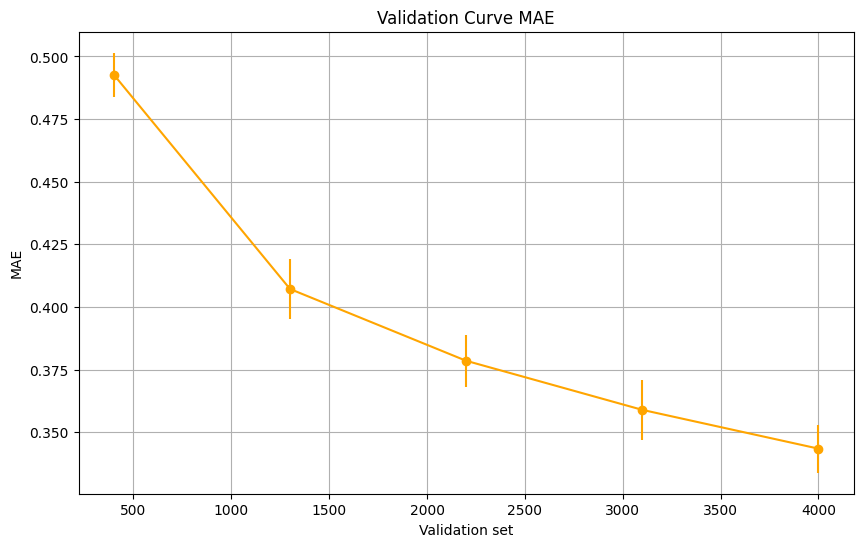

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  50  columnas: 
fold:  10
MAE  scores mean:  [0.5021824  0.42695861 0.40874739 0.38745224 0.38070222 0.35666479
 0.35790638 0.34865599 0.33833107 0.33018137]
MAE  scores media de medias:  0.38377824708642094
MAE  scores std:  [0.01383725 0.0157928  0.01785467 0.01435385 0.01507289 0.01492227
 0.01638562 0.01467884 0.01365268 0.0158996 ]
MAE  scores media de stds:  0.015245047116194857
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


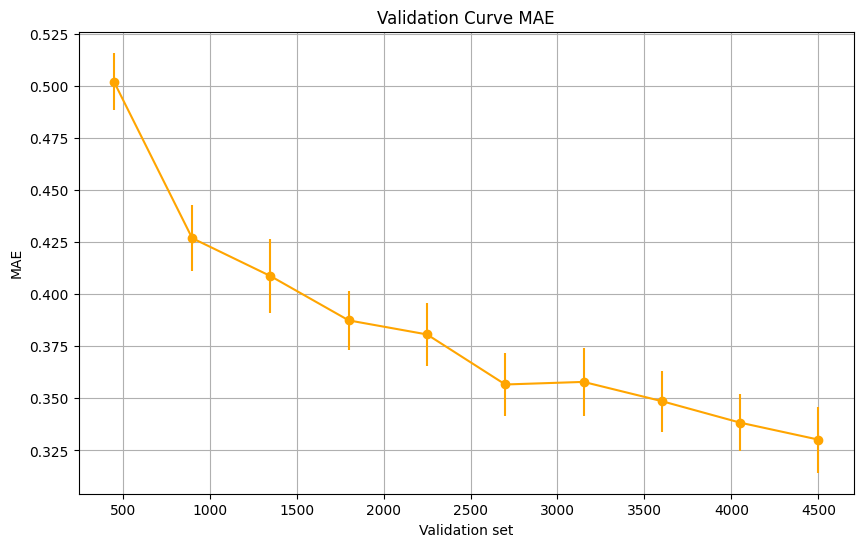

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=50,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.43065027 0.37242393 0.33556723 0.30959784 0.29200476]
MAE  scores media de medias:  0.3480488053422176
MAE  scores std:  [0.00860448 0.01067406 0.0173966  0.01705959 0.00992386]
MAE  scores media de stds:  0.01273171679560508
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


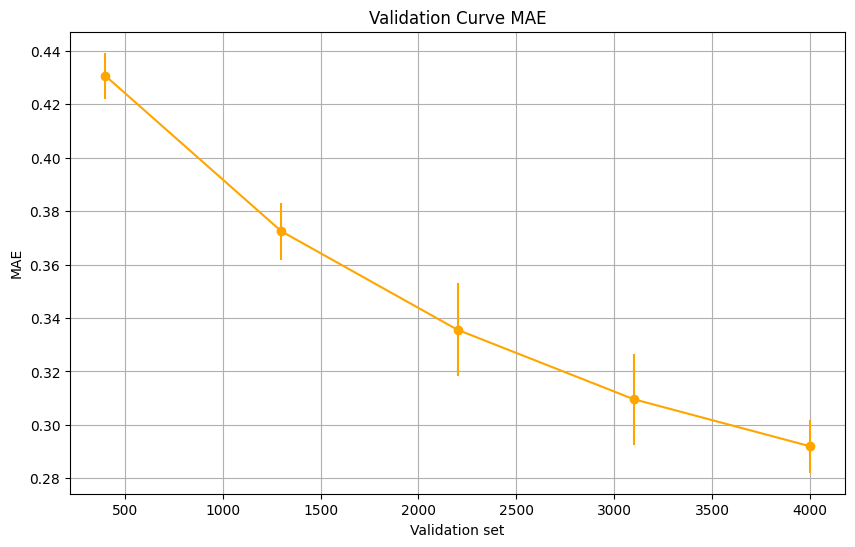

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.42555543 0.38277524 0.3608591  0.34611635 0.33194773 0.31431051
 0.29883157 0.29994256 0.2904818  0.28569875]
MAE  scores media de medias:  0.3336519039580554
MAE  scores std:  [0.01780546 0.02153449 0.01780872 0.01526416 0.01558494 0.0140324
 0.01544188 0.01638977 0.01410614 0.01532387]
MAE  scores media de stds:  0.016329181189549
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


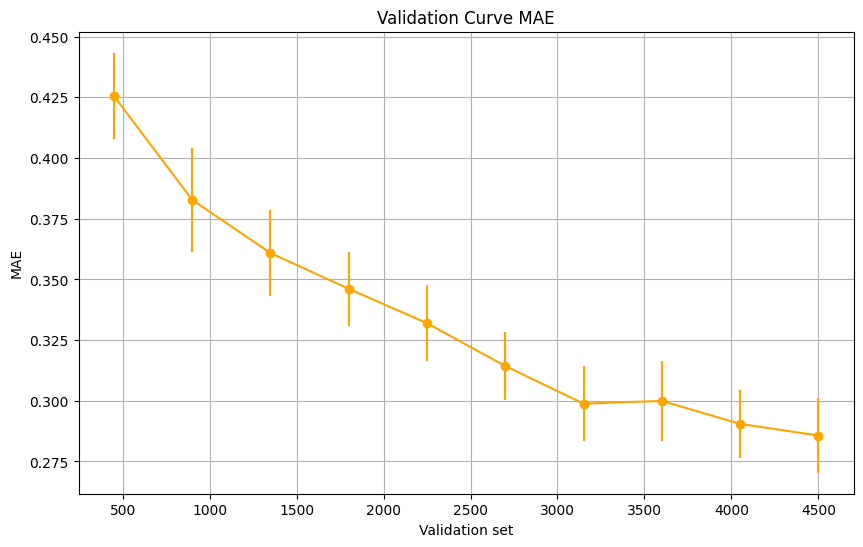

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  100  columnas: 
fold:  5
MAE  scores mean:  [0.49266666 0.40197051 0.37088347 0.35109865 0.32781312]
MAE  scores media de medias:  0.38888648219117145
MAE  scores std:  [0.00880046 0.01112668 0.00998991 0.00721871 0.01336474]
MAE  scores media de stds:  0.010100101270707543
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


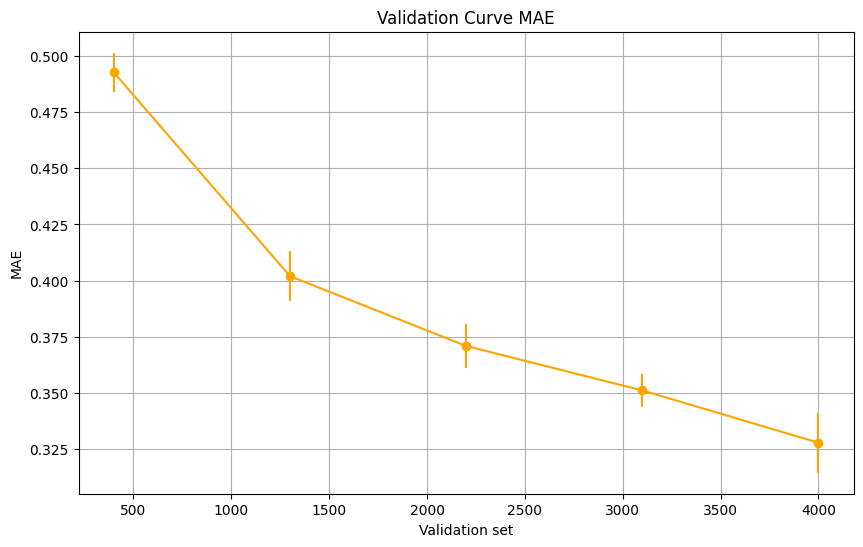

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  100  columnas: 
fold:  10
MAE  scores mean:  [0.50150821 0.42847642 0.39890605 0.38555466 0.37398918 0.35348733
 0.35110296 0.34049427 0.33321073 0.33464446]
MAE  scores media de medias:  0.3801374266451981
MAE  scores std:  [0.01419024 0.01614504 0.01817119 0.01424166 0.01765324 0.02004619
 0.01977179 0.01980493 0.01750702 0.01729673]
MAE  scores media de stds:  0.0174828023814487
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


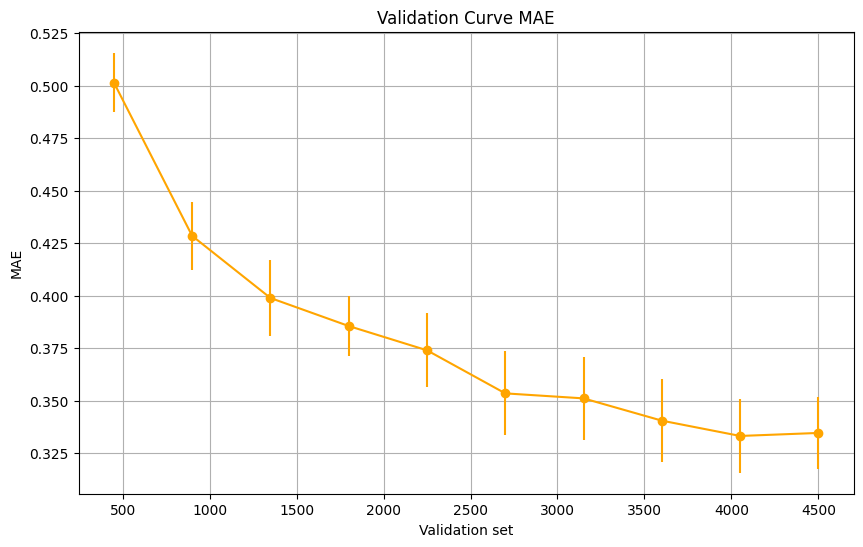

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=100,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.43015276 0.36882771 0.33705615 0.30657629 0.29036916]
MAE  scores media de medias:  0.3465964147279529
MAE  scores std:  [0.00825105 0.00905912 0.01143087 0.01172192 0.01328058]
MAE  scores media de stds:  0.01074870885182169
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


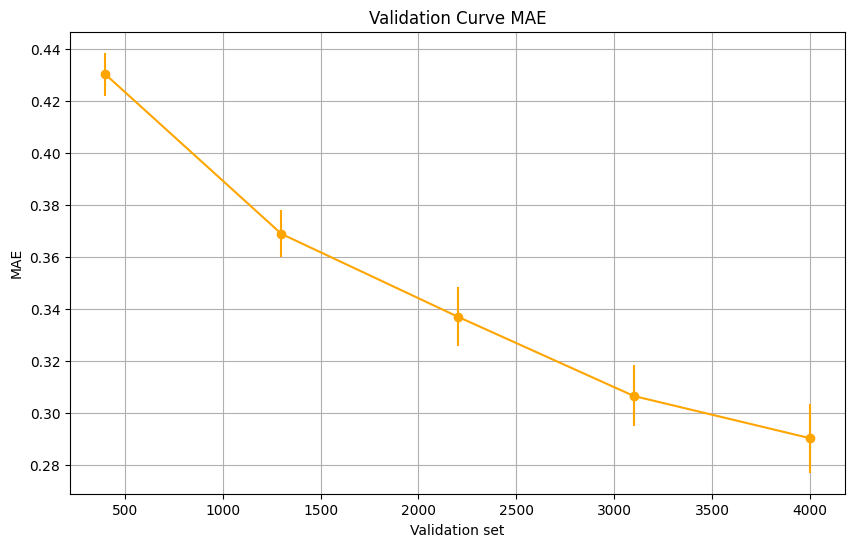

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.42555543 0.38277524 0.35635443 0.35839125 0.33928803 0.31950974
 0.30308743 0.29556885 0.29089956 0.28204806]
MAE  scores media de medias:  0.33534780065923453
MAE  scores std:  [0.01780546 0.02153449 0.01682825 0.01488859 0.01440829 0.01747227
 0.0221719  0.01431866 0.01673117 0.01579471]
MAE  scores media de stds:  0.017195378068349757
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 10 , colsample_bytree= 1.0 , gamma= 20 , max_depth= 5


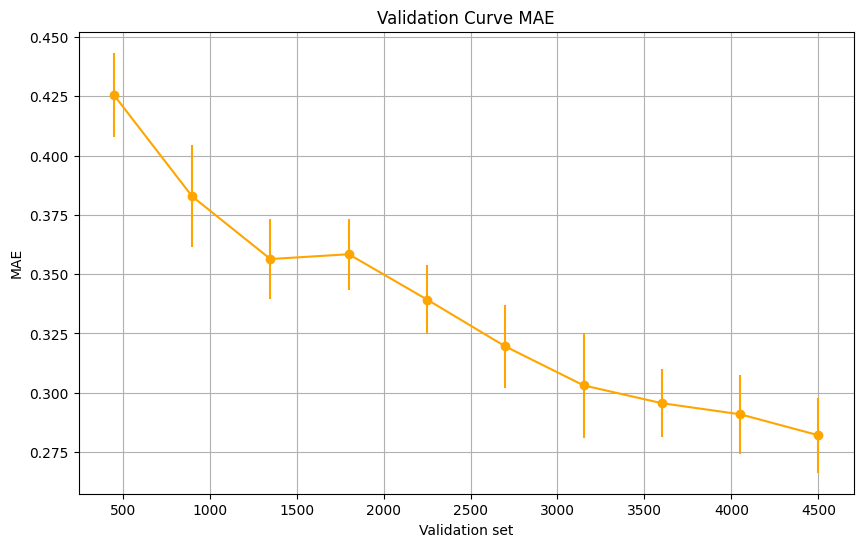

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=10,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=20,                   # Aproximación para min_samples_split
    max_depth = 5
)

Errores con  150  columnas: 
fold:  5
MAE  scores mean:  [0.49266666 0.40197051 0.37119898 0.34869392 0.3332795 ]
MAE  scores media de medias:  0.3895619163473799
MAE  scores std:  [0.00880046 0.01112668 0.01015899 0.00806317 0.00564319]
MAE  scores media de stds:  0.008758496819225706
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


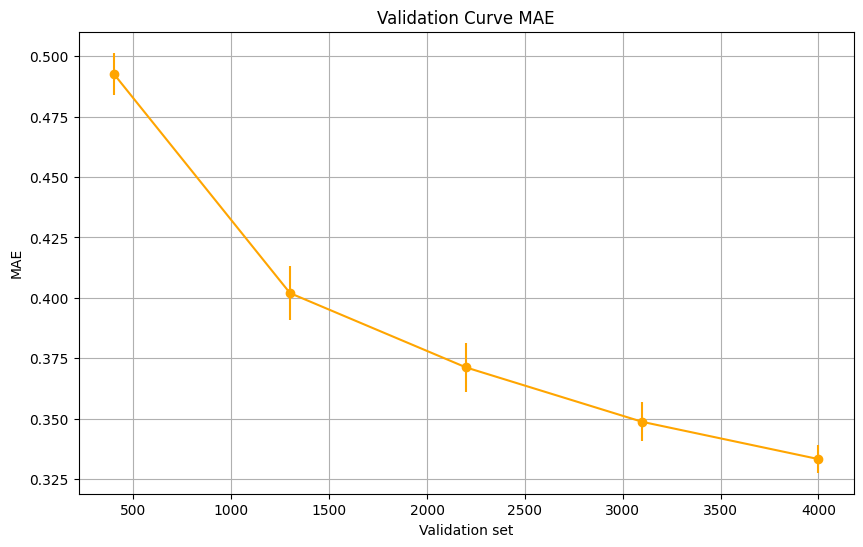

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=5,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

Errores con  150  columnas: 
fold:  10
MAE  scores mean:  [0.50150821 0.42847642 0.39890605 0.38440438 0.36917744 0.35010212
 0.34859135 0.34063518 0.3329935  0.33159489]
MAE  scores media de medias:  0.3786389548021956
MAE  scores std:  [0.01419024 0.01614504 0.01817119 0.01424372 0.01433084 0.01677362
 0.01759343 0.01814498 0.01666832 0.01800988]
MAE  scores media de stds:  0.0164271245639686
Hiperparametros:
criterion= mae , max_features= None , min_child_weight= 20 , colsample_bytree= 1.0 , gamma= 40 , max_depth= 10


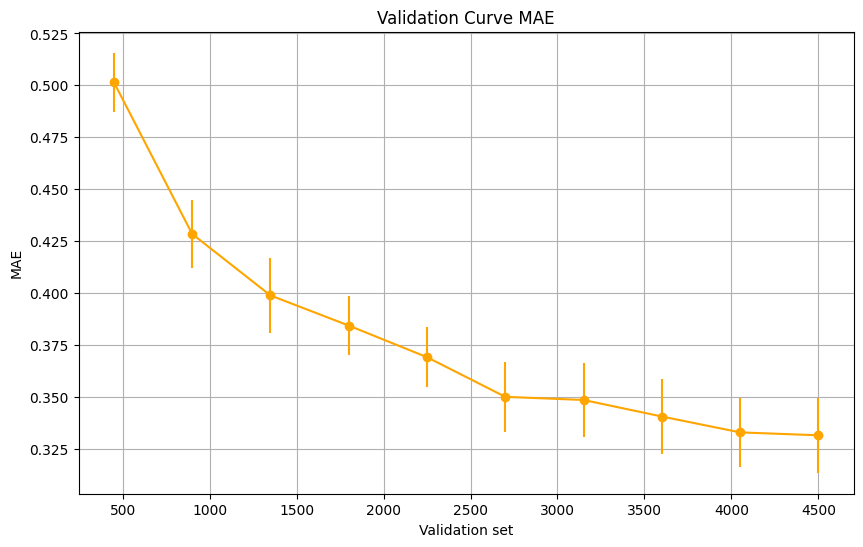

In [ ]:
valcruzada_xgbr(
    eval_metric='mae',        # Equivalente a squared_error
    mf=None,                   # No se limita el número de características
    rs=42,                     # Semilla de aleatoriedad
    ncol=150,                   # Usamos 50 variables predictoras
    fold=10,                    # Número de pliegues
    sc='neg_mean_absolute_error', # Métrica de evaluación
    err_type='MAE',            # Tipo de error
    recs=5000,                 # Número de muestras
    min_child_weight=20,       # Equivalente aproximado a min_samples_leaf
    colsample_bytree=1.0,      # Equivalente a max_features=None
    max_features=None,
    gamma=40,                   # Aproximación para min_samples_split
    max_depth = 10
)

**Prueba del modelo  LinearRegression con 250,200,150,100,50 variables predictoras, resultado del análisis mutual information**

Variables predictoras 250: 
Mean Squared Error (MSE) para 250 predictoras:  0.42908620779970935
Mean Absolute Error (MSE) para 250 predictoras:  0.44279387878001464


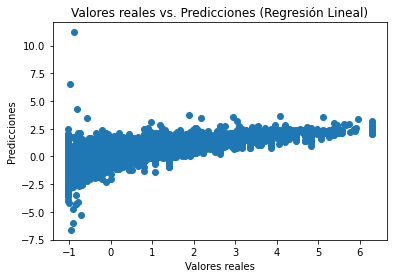

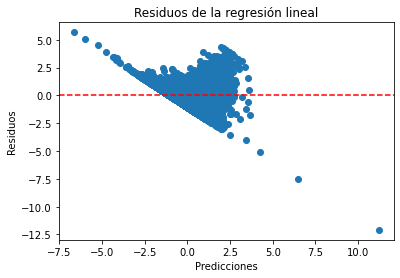

Variables predictoras 200: 
Mean Squared Error (MSE) para 200 predictoras:  0.4450443977246901
Mean Absolute Error (MSE) para 200 predictoras:  0.45609304205421336


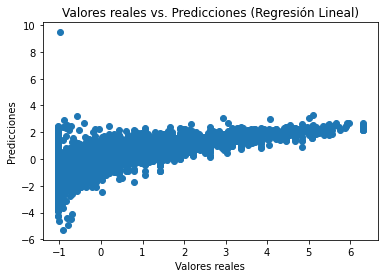

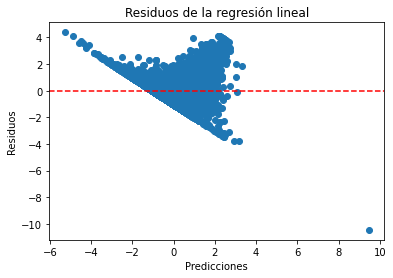

Variables predictoras 150: 
Mean Squared Error (MSE) para 150 predictoras:  0.45149728564606734
Mean Absolute Error (MSE) para 150 predictoras:  0.4616287481901249


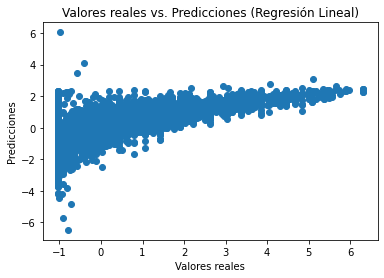

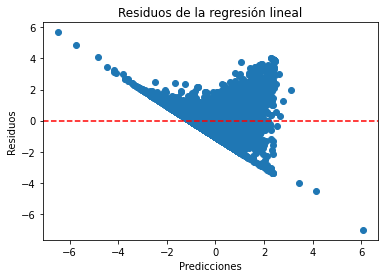

Variables predictoras 100: 
Mean Squared Error (MSE) para 100 predictoras:  0.45679852853036884
Mean Absolute Error (MSE) para 100 predictoras:  0.4662559012517685


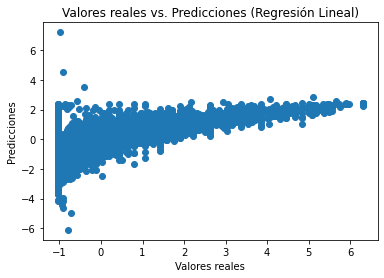

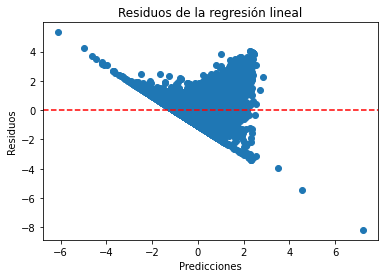

Variables predictoras 50: 
Mean Squared Error (MSE) para 50 predictoras:  0.4634371609681909
Mean Absolute Error (MSE) para 50 predictoras:  0.4772566823069548


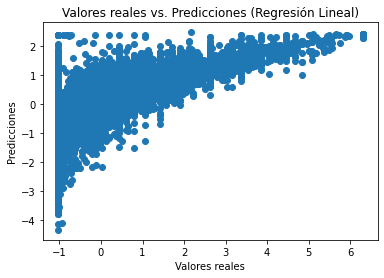

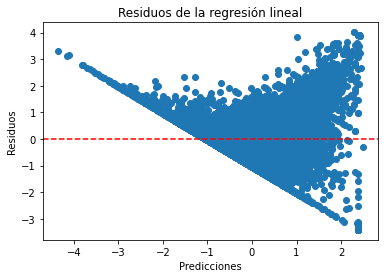

In [ ]:
#algoritmo de regresion linear
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


#target
y = iter_00csv20.ind_analfabeta

for ncol in [250,200,150,100,50]:
    X = iter_00csv20[cols[:ncol]]

    #dividir los datos en entrenamiento y validacion
    #random_state 42 garantiza la reproducibilidad de los datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenar un modelo de regresión lineal
    rl_model = LinearRegression()
    rl_model.fit(X_train, y_train)

    # Paso 4: Realizar predicciones en el conjunto de prueba
    y_pred = rl_model.predict(X_test)

    #mae
    mae = mean_absolute_error(y_test, y_pred)
    #mse
    mse = mean_squared_error(y_test, y_pred)

    print(f"Variables predictoras {ncol}: ")
    #print(cols[:ncol])
    print(f"Mean Squared Error (MSE) para {ncol} predictoras: ", mse)
    print(f"Mean Absolute Error (MSE) para {ncol} predictoras: ", mae)

    # Graficar valores reales vs. predicciones
    plt.scatter(y_test, y_pred)
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Valores reales vs. Predicciones (Regresión Lineal)")
    plt.show()

    # Calcular los residuos (diferencias entre los valores reales y las predicciones)
    residuos = y_test - y_pred

    # Graficar los residuos
    plt.scatter(y_pred, residuos)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos")
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Residuos de la regresión lineal")
    plt.show()

**Se usa el modelo LinearRegression con validacion cruzada de 5-fold, sin hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse)**

Errores con  50  columnas: 
MSE scores mean:  [0.83574728 0.50008797 0.47804045 0.47644168 0.47360642]
MSE scores std:  [0.39109743 0.0367405  0.01487725 0.01260024 0.01123256]


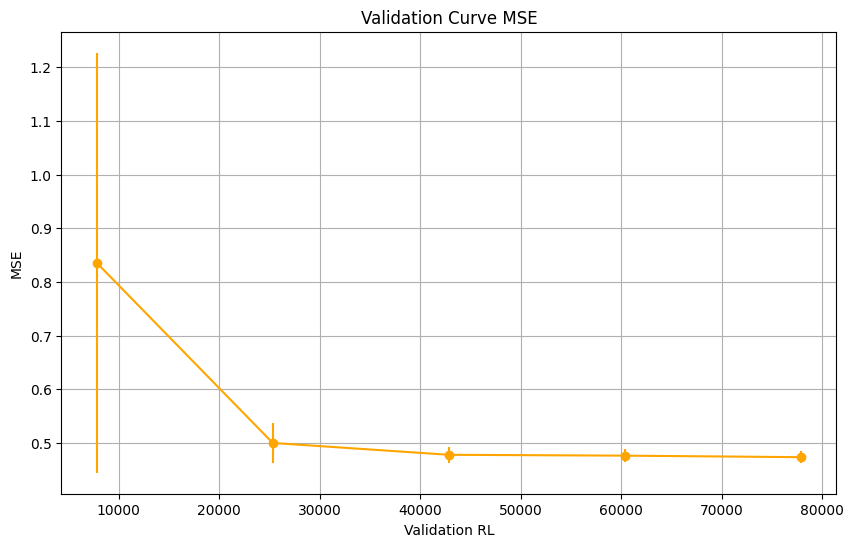

 
Errores con  100  columnas: 
MSE scores mean:  [1.28702321 0.58314624 0.49733119 0.48673458 0.47361916]
MSE scores std:  [1.01523186 0.12234846 0.04434065 0.03481721 0.02218889]


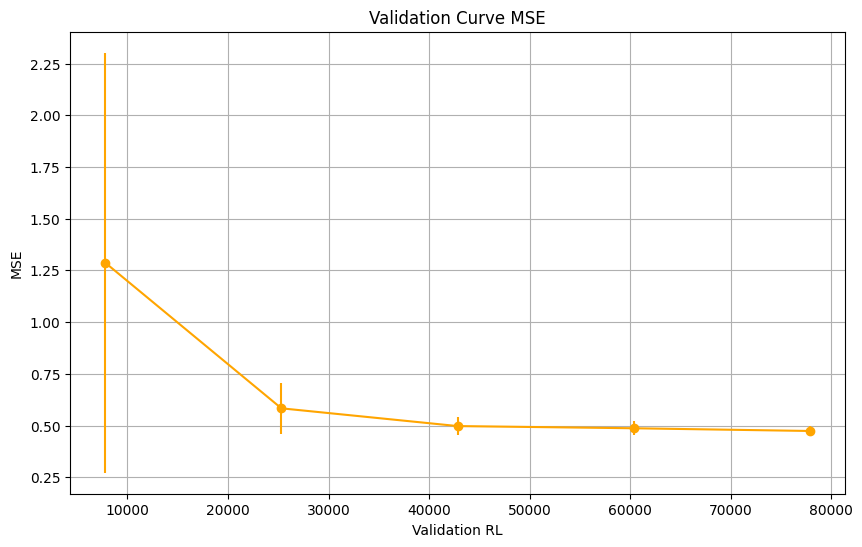

 
Errores con  150  columnas: 
MSE scores mean:  [1.11456272 0.64827535 0.51758726 0.48614826 0.47287205]
MSE scores std:  [0.62036916 0.19995135 0.04287402 0.03006863 0.02063438]


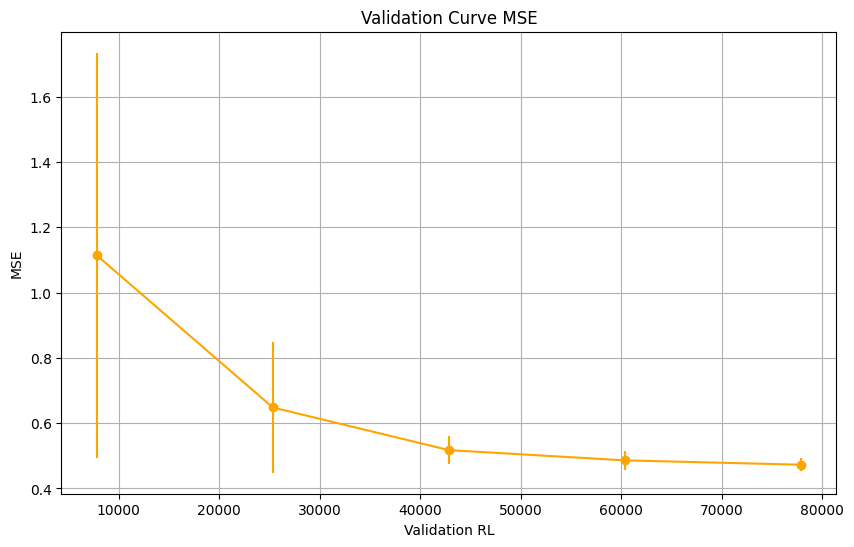

 
Errores con  200  columnas: 
MSE scores mean:  [0.97931711 0.79855805 0.5536181  0.50295643 0.48191286]
MSE scores std:  [0.42807124 0.36837348 0.07772317 0.04086207 0.03160863]


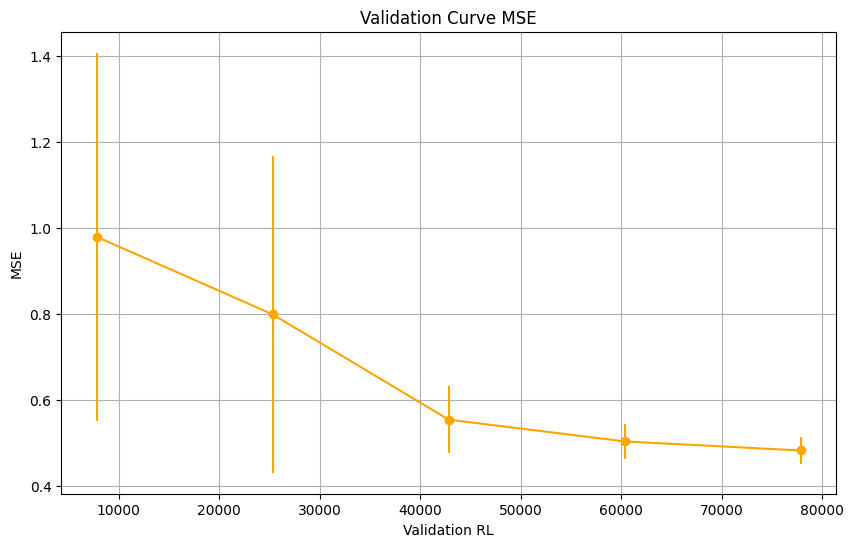

 
Errores con  250  columnas: 
MSE scores mean:  [1.14127439 0.78162103 0.53977885 0.49125976 0.45939203]
MSE scores std:  [0.63109397 0.37666185 0.10247798 0.07538586 0.02737622]


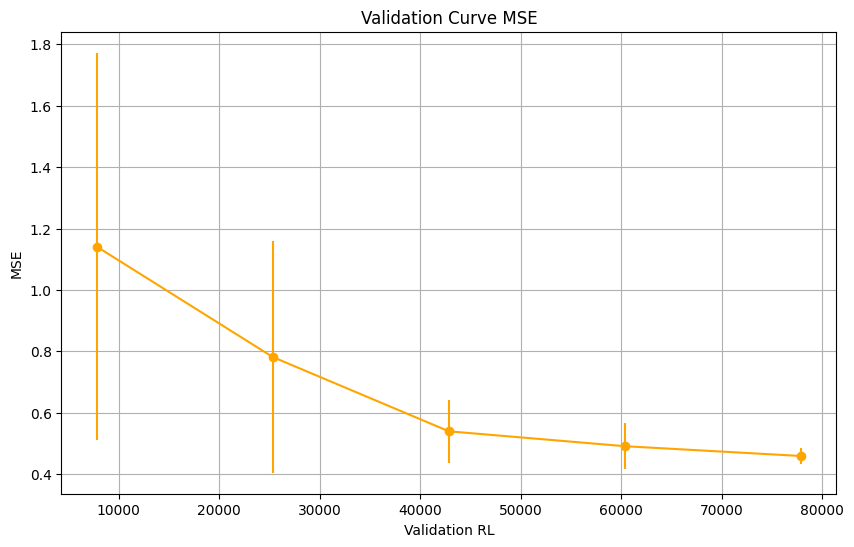

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 5)  # 5 tamaños de entrenamiento diferentes


for ncol in [50,100,150,200,250]:
    X = iter_00csv20[cols[:ncol]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='neg_mean_squared_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MSE scores mean: ", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MSE scores std: ", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation RL")
    plt.ylabel("MSE")
    plt.title("Validation Curve MSE")
    plt.grid()
    plt.show()
    print(" ")

**Se usa el modelo LinearRegression con validacion cruzada de 10-fold, sin hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error cuadratico medio (mse)**

Errores con  50  columnas: 
MSE scores mean:  [0.83574728 0.56020704 0.5096901  0.48215364 0.47784964 0.47577639
 0.47660525 0.47595142 0.47457205 0.47360371]
MSE scores std:  [0.39109743 0.09713974 0.04928119 0.01769507 0.01452646 0.01315427
 0.0144731  0.01267483 0.0117888  0.01122758]


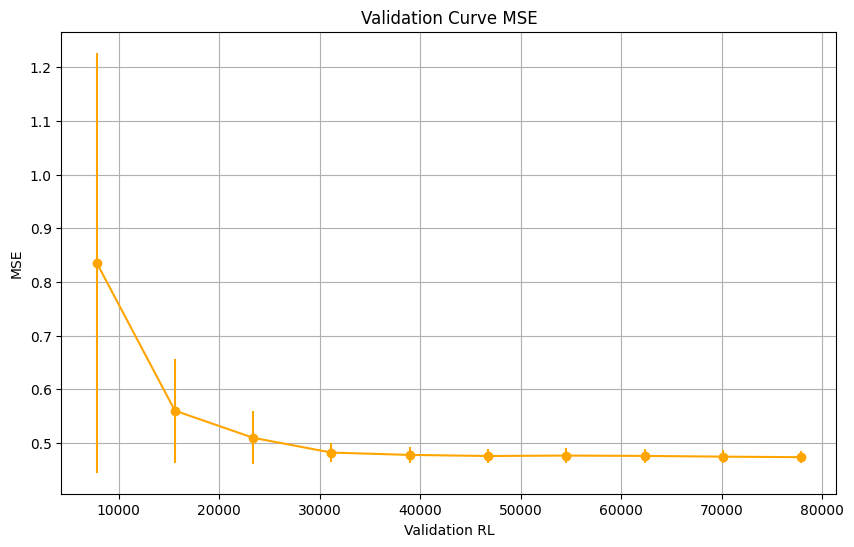

 
Errores con  100  columnas: 
MSE scores mean:  [1.28704868 0.74949796 0.58816079 0.51956536 0.49416632 0.49302625
 0.49177017 0.48436304 0.47452715 0.47362336]
MSE scores std:  [1.01352131 0.37118341 0.11511113 0.05893098 0.04386047 0.03681536
 0.03530405 0.03092019 0.02157609 0.02220424]


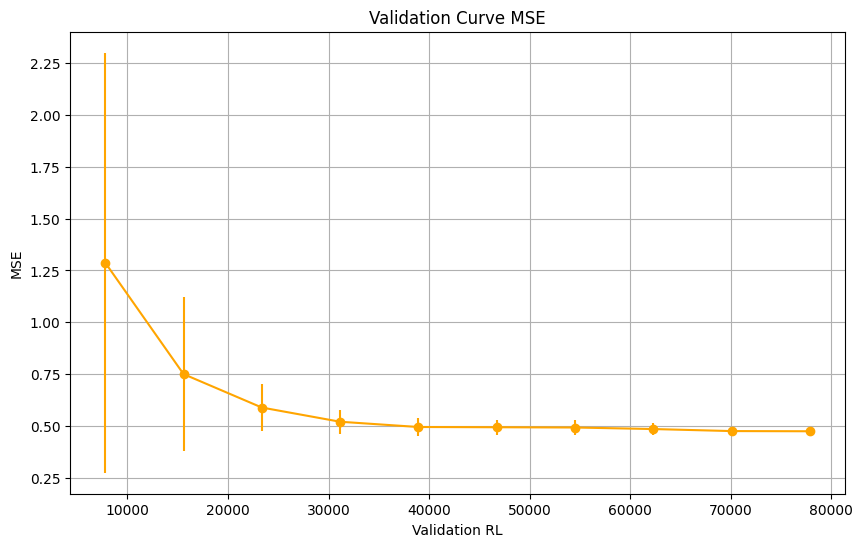

 
Errores con  150  columnas: 
MSE scores mean:  [1.11443888 0.82855929 0.65424045 0.53796588 0.52224761 0.49753437
 0.48873908 0.48260364 0.47671717 0.47289674]
MSE scores std:  [0.62048196 0.39168193 0.16503248 0.06433393 0.04847765 0.03296975
 0.02649342 0.02471915 0.02444213 0.0206105 ]


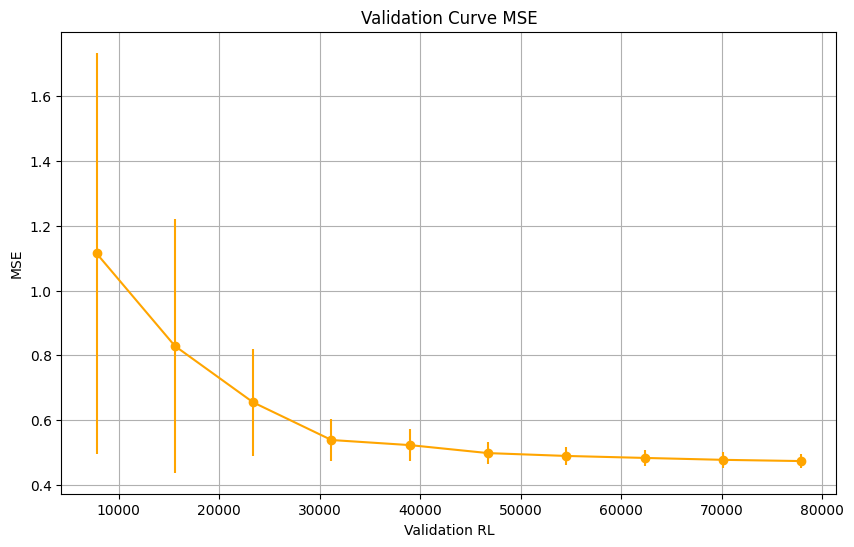

 
Errores con  200  columnas: 
MSE scores mean:  [0.97953439 0.96070182 0.79267717 0.59294634 0.56244173 0.52666058
 0.50637554 0.50341517 0.48590818 0.48185475]
MSE scores std:  [0.42792855 0.5177123  0.2999803  0.11479755 0.08752201 0.05176839
 0.03776019 0.04208836 0.03333901 0.03162724]


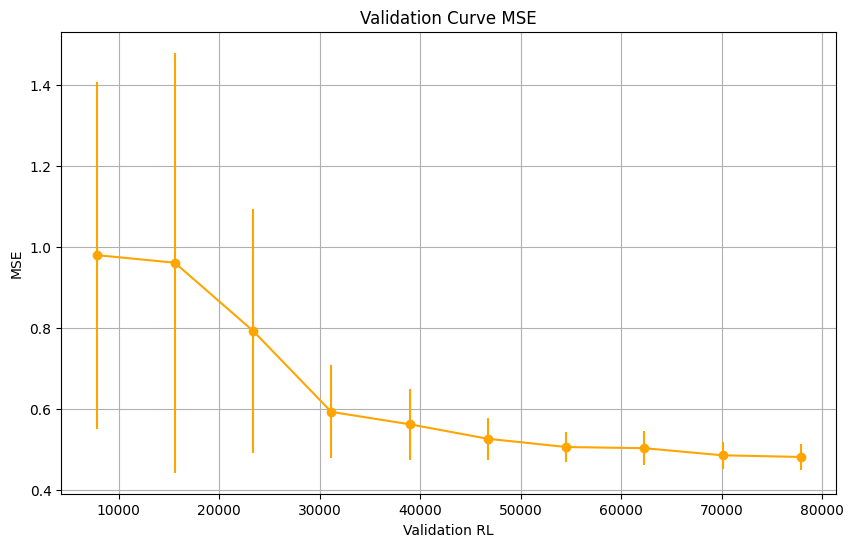

 
Errores con  250  columnas: 
MSE scores mean:  [1.14127439 1.02593409 0.73175889 0.59791256 0.54246907 0.50530737
 0.4899858  0.49024315 0.46821348 0.45939203]
MSE scores std:  [0.63109397 0.74425083 0.28209476 0.14477369 0.09900132 0.0682421
 0.055108   0.06571973 0.02987989 0.02737622]


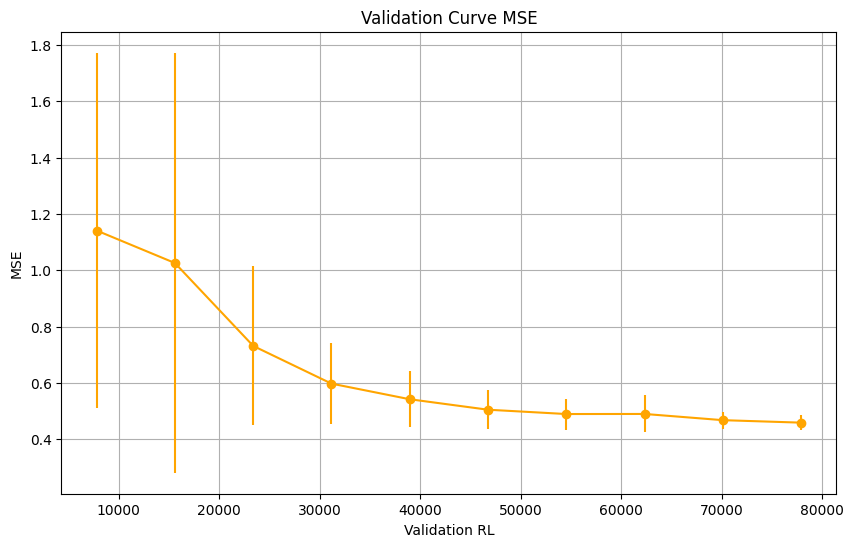

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 10)  # 10 tamaños de entrenamiento diferentes


for ncol in [50,100,150,200,250]:
    X = iter_00csv20[cols[:ncol]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='neg_mean_squared_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MSE scores mean: ", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MSE scores std: ", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation RL")
    plt.ylabel("MSE")
    plt.title("Validation Curve MSE")
    plt.grid()
    plt.show()
    print(" ")

**Se usa el modelo LinearRegression con validacion cruzada de 5-fold, sin hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error absoluto medio (mae)**

Errores con  50  columnas: 
MAE scores mean:  [0.4846372  0.47791406 0.47745499 0.47699783 0.47661393]
MAE scores std:  [0.00758159 0.005388   0.00477787 0.00467596 0.00456997]


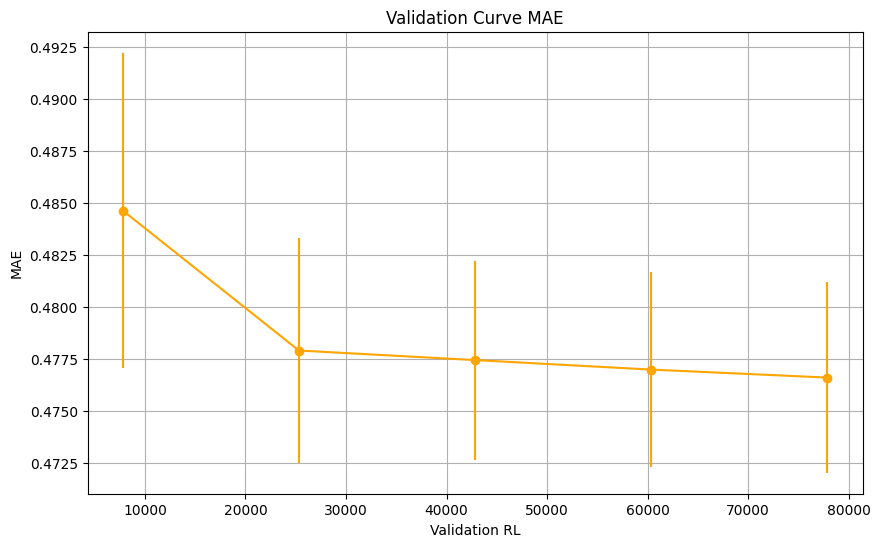

 
Errores con  100  columnas: 
MAE scores mean:  [0.48085828 0.46870234 0.46629723 0.46643817 0.4662901 ]
MAE scores std:  [0.01208858 0.00579471 0.00474126 0.00463906 0.00426813]


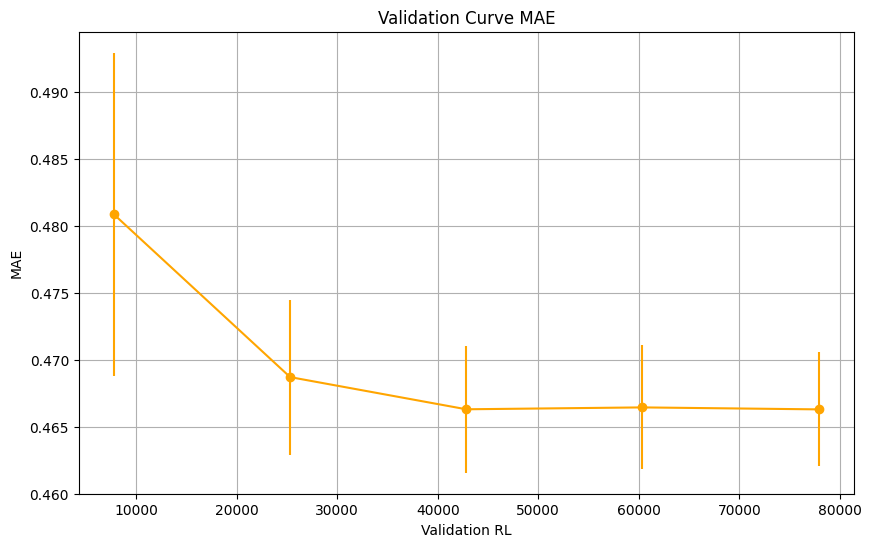

 
Errores con  150  columnas: 
MAE scores mean:  [0.47547933 0.46651041 0.46243433 0.46211177 0.46148917]
MAE scores std:  [0.01039321 0.00747872 0.00488407 0.00503872 0.00467884]


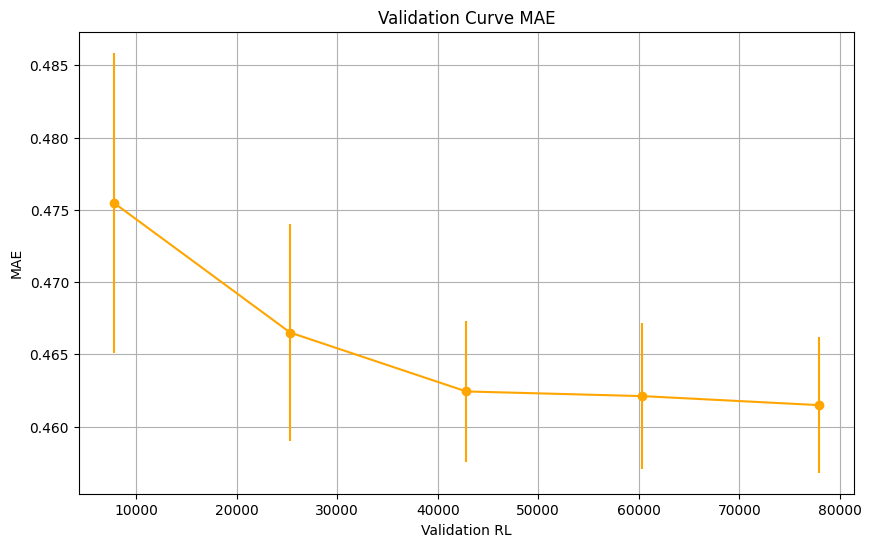

 
Errores con  200  columnas: 
MAE scores mean:  [0.4717399  0.46549063 0.46000238 0.45861208 0.45789935]
MAE scores std:  [0.00948811 0.01031501 0.00508713 0.00442412 0.00397356]


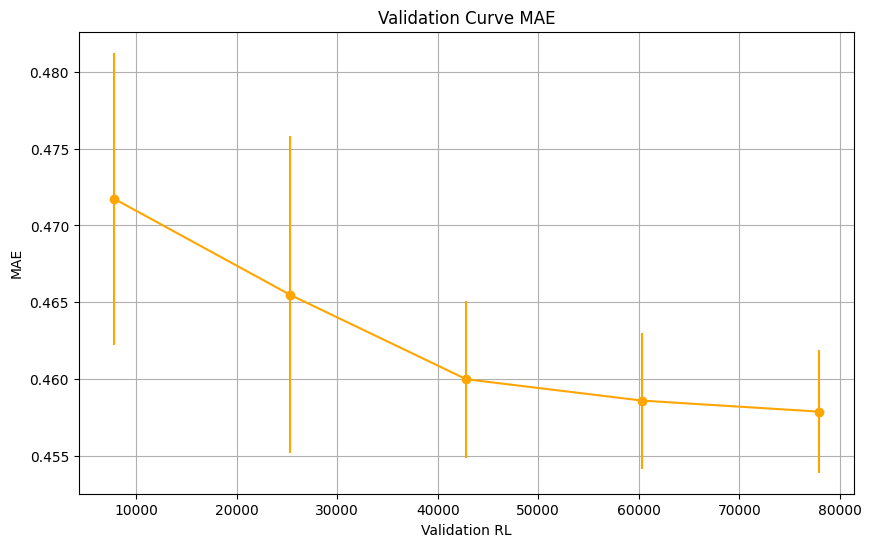

 
Errores con  250  columnas: 
MAE scores mean:  [0.46527979 0.4524779  0.44664419 0.44566397 0.44461158]
MAE scores std:  [0.01181618 0.00974784 0.00458738 0.00420483 0.00369204]


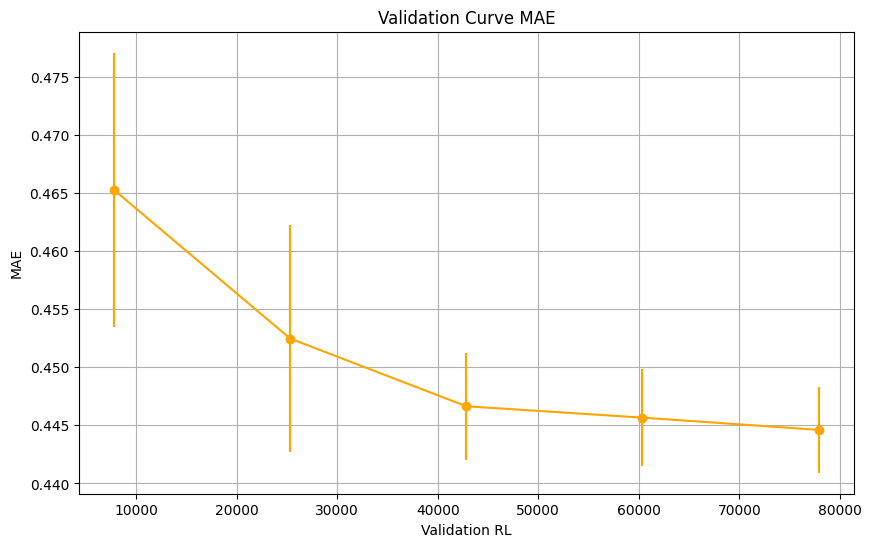

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 5)  # 5 tamaños de entrenamiento diferentes


for ncol in [50,100,150,200,250]:
    X = iter_00csv20[cols[:ncol]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='neg_mean_absolute_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MAE scores mean: ", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MAE scores std: ", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation RL")
    plt.ylabel("MAE")
    plt.title("Validation Curve MAE")
    plt.grid()
    plt.show()
    print(" ")

**Se usa el modelo LinearRegression con validacion cruzada de 10-fold, sin hiperparametrizaciónes, para ver como mejora el modelo con optimizaciones del error absoluto medio (mae)**

Errores con  50  columnas: 
MAE scores mean:  [0.4846372  0.47952132 0.47785525 0.47736513 0.47734931 0.47732698
 0.47716726 0.47694116 0.47657234 0.47661393]
MAE scores std:  [0.00758159 0.0054163  0.00540012 0.00470477 0.00469547 0.00472084
 0.00469209 0.00468201 0.00464381 0.00456997]


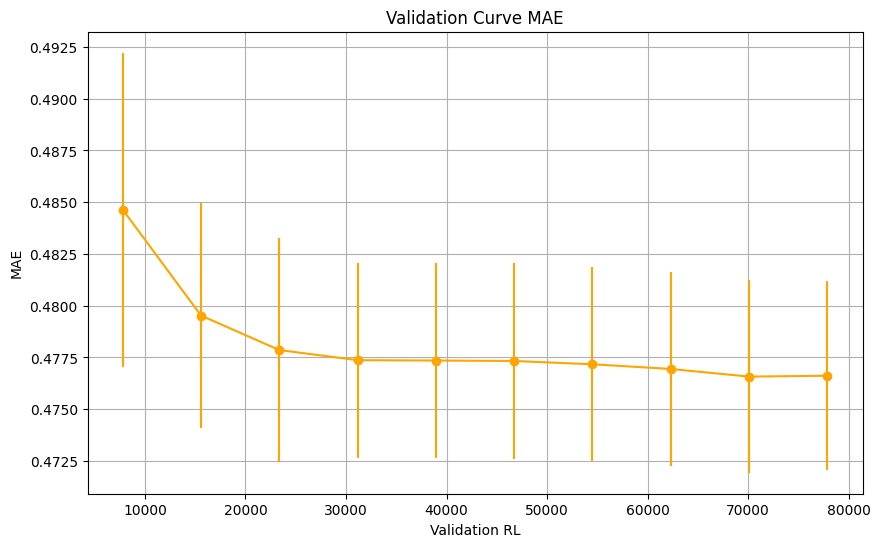

 
Errores con  100  columnas: 
MAE scores mean:  [0.48085828 0.47136152 0.46914314 0.46681899 0.46603402 0.46672924
 0.46693901 0.46616973 0.46583205 0.4662901 ]
MAE scores std:  [0.01208858 0.00574049 0.00560412 0.00485616 0.0046527  0.00466763
 0.00476516 0.00440879 0.00430795 0.00426813]


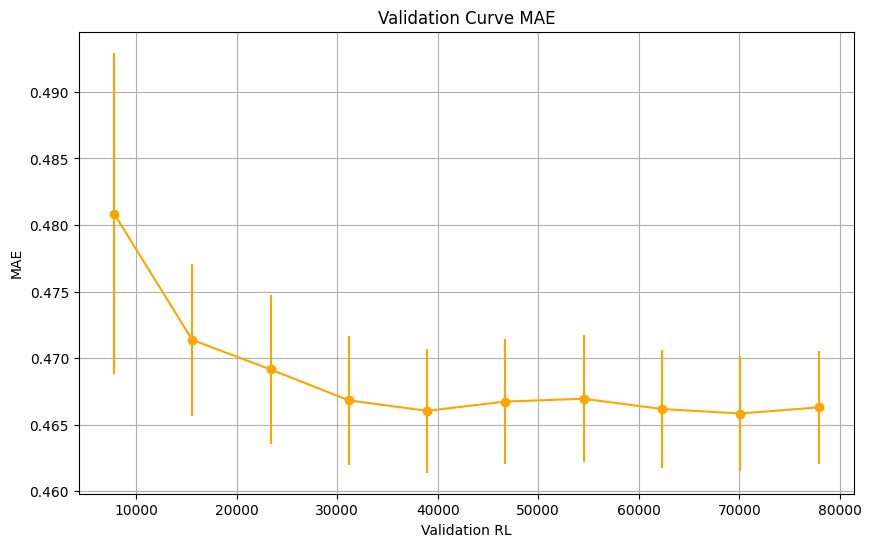

 
Errores con  150  columnas: 
MAE scores mean:  [0.47547933 0.46895024 0.46683272 0.46347788 0.46283054 0.46212301
 0.46198798 0.46182017 0.46126217 0.46148917]
MAE scores std:  [0.01039321 0.00708995 0.00673775 0.005073   0.00477412 0.00483744
 0.00474375 0.0048609  0.00487731 0.00467884]


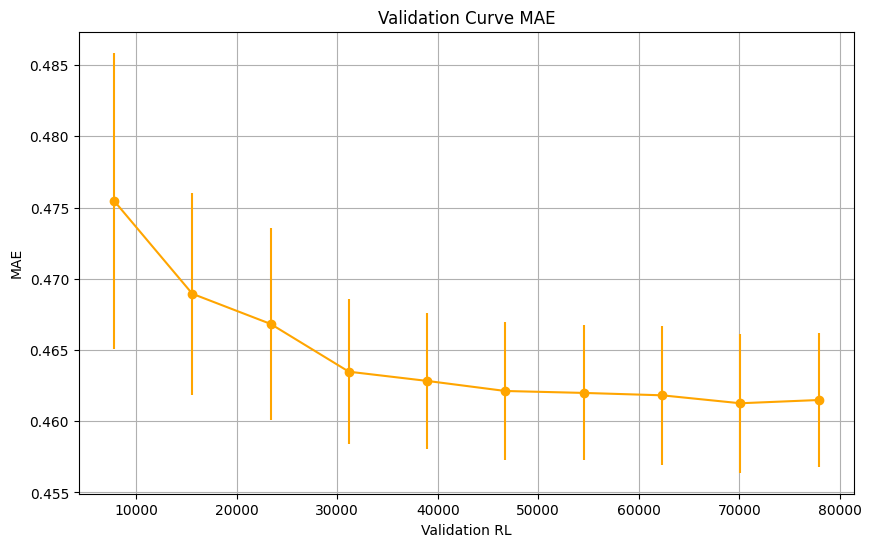

 
Errores con  200  columnas: 
MAE scores mean:  [0.4717399  0.46853212 0.46527552 0.46080878 0.46033914 0.45928608
 0.45886094 0.4585941  0.4576983  0.45789935]
MAE scores std:  [0.00948811 0.0084798  0.00899041 0.00548739 0.0053263  0.00449185
 0.00434278 0.0044087  0.00417461 0.00397356]


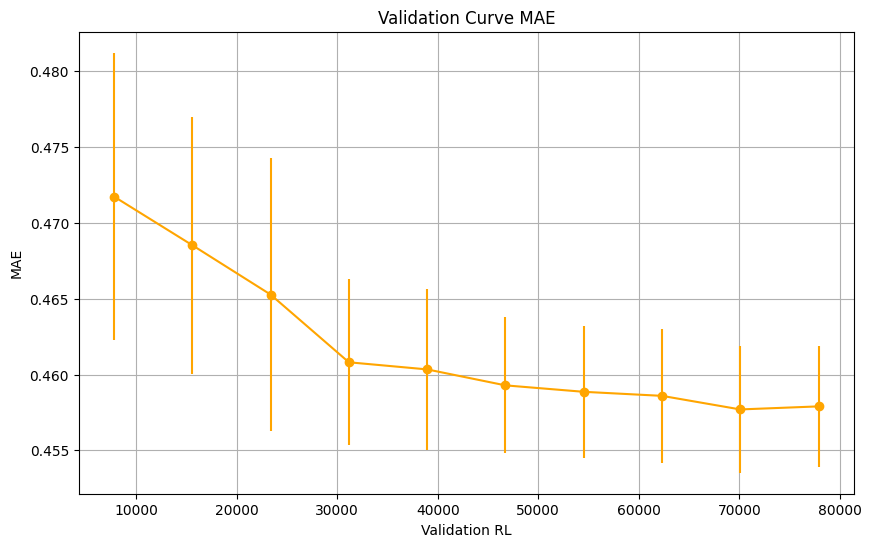

 
Errores con  250  columnas: 
MAE scores mean:  [0.46527979 0.45695446 0.4517884  0.44799637 0.44685679 0.44622753
 0.44583979 0.44562881 0.44489258 0.44461158]
MAE scores std:  [0.01181618 0.01005675 0.00759245 0.00475201 0.00437069 0.0041522
 0.00413002 0.00420737 0.00383985 0.00369204]


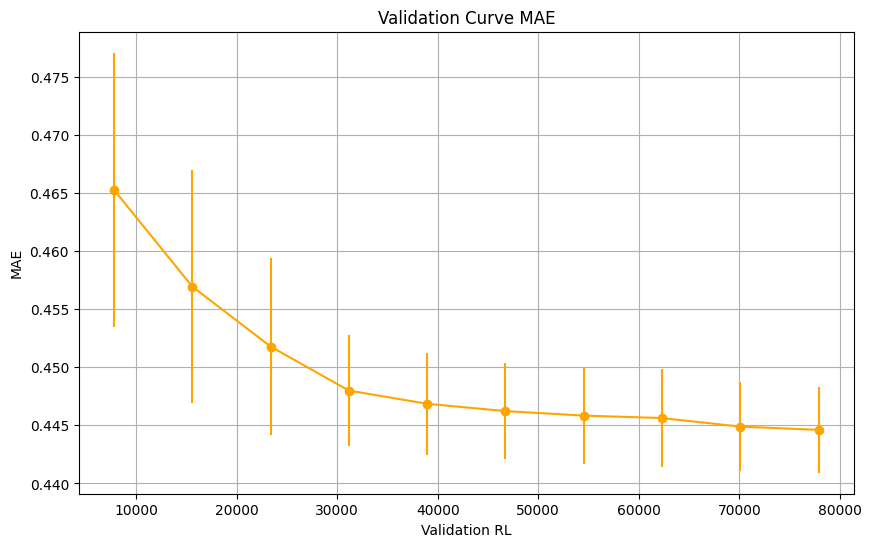

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt



my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', LinearRegression())
                             ])


#target
y = iter_00csv20.ind_analfabeta

train_sizes = np.linspace(0.1, 1.0, 10)  # 10 tamaños de entrenamiento diferentes


for ncol in [50,100,150,200,250]:
    X = iter_00csv20[cols[:ncol]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Errores con ", ncol, " columnas: ")

    # Calcula las curvas de aprendizaje mse
    train_sizes, _, validation_scores = learning_curve(
        my_pipeline, X_train, y_train, train_sizes=train_sizes, cv=10, scoring='neg_mean_absolute_error')

    # Calcula la media y la desviación estándar de los puntajes de validación
    validation_scores_mean = -np.mean(validation_scores, axis=1)
    print("MAE scores mean: ", validation_scores_mean)
    validation_scores_std = np.std(validation_scores, axis=1)
    print("MAE scores std: ", validation_scores_std)


    # Plotea las curvas de aprendizaje de mse
    plt.figure(figsize=(10, 6))
    plt.errorbar(train_sizes, validation_scores_mean, yerr=validation_scores_std, fmt='-o', color="orange")
    plt.xlabel("Validation RL")
    plt.ylabel("MAE")
    plt.title("Validation Curve MAE")
    plt.grid()
    plt.show()
    print(" ")

**Finalmente se selecciona el mejor modelo, usando funciones de la libreria pycaret**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 109.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 82.0 MB/s eta 0:00:00
   ━

In [ ]:
from pycaret.regression import setup, compare_models

# Configura tu entorno de PyCaret
regression_setup = setup(data=iter_00csv20, target='ind_analfabeta')

# Compara diferentes modelos automáticamente
best_model = compare_models()

# Muestra el mejor modelo seleccionado
print(best_model)

# Muestra la métrica de rendimiento utilizada para seleccionar el mejor modelo
#print(best_model[1])  # Aquí se muestra la métrica de rendimient

Processing:   0%|          | 0/81 [00:00<?, ?it/s]

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=3140, ...)
